# Final Project: Overview

# Objective

The objective of this project is for you to demonstrate your mastery of the Machine Learning process
**using Neural Networks**.



# Submission requirements

The guidelines will be similar to the Midterm
- you will write a procedure that takes raw data and produces predictions

You will submit a *single* model for evaluation.

**Demonstrate that all cells in your notebook work**

The final cell in your notebook should print the message "Done"
- `print("Done")`
- If we run your notebook and this last cell does not execute your submission will be inadequate

## Testing

*You must perform out of sample testing*.

If you want to perform cross-validation in training, that is fine, but you
must *also* test out of sample to show that you are not over-fitting.

It is up to you to create the out of sample data that you feel best evaluates your model.

We will create holdout data (that we will not show you) for grading.

The procedure you write to make predictions should be able to work on the unseen holdout data
(similar to how it should work for your test set but the holdout set has *no targets*)

    

# The data

Data will be provided to you 
- as multiple files in a directory which we refer to as a *data directory*

The reason for this is that the different files may convey different information.

You will be responsible for deciding
- which files to use
- which fields within the files to use

We will give you a data directory for training.

# Submission guidelines

Here are the basics, a code template that you must complete is in the following cells
- you will be required to store  your model in a file
- you will be required to write a procedure `MyModel` that takes two arguments
    - `test_dir`
        - this is a *relative path* to the holdout data directory
    - `model_path`
        - this is a *relative path* to the file containing your model
- the holdout data directory is similar in structure to the training data directory
    - but without target labels !  It is your job to predict these.
- your procedure must produce predictions given this holdout data directory

This means that your procedure must
- prepare the files in the holdout data directory similar to the way that they were prepared in the training data directory

We will provide you with a sample data directory that will resemble the holdout -- this is so that you
may test the procedure you write for submission.



## Detailed submission guidelines


In **addition to your notebook that trains/evaluates your model**, 
- please also submit an **archive file of the directory** whose name is stored in `model_path`, which 
contains your trained model.
    - use `saveModel` to put your final, trained model in this directory
- We will **not** train your model; we will only use the method `MyModel`
    - which **you** will implement
    - and which uses `loadModel` and the directory whose name is stored in `model_path`
    - this will create the model that we will evaluate


Here is a code template for you to complete
- it will save your model (assuming it is in variable `my_model`)
- it provides the specification for procedure `MyModel`, which *you must complete*


### load all package

### Note that 3 cellbelow should be run to get the prediction from the model trained

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import sklearn

import os
import math

%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import nn_helper module
import helper
%aimport helper

helper = helper.HELPER()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM , GRU , SimpleRNN , Dense , GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [30]:
import os
from tensorflow.keras.models import load_model

modelName = "final_model"
model_path = os.path.join(".", modelName)

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(test_dir  , model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # We need to match your array of predictions with the examples you are predicting
    # The array below (ids) should have a one-to-one correspondence and identify the example your are predicting
    # For Bankruptcy: the Id column
    # For Stock prediction: the date on which you are making a prediction
    

    
    
    
    
    
    ids = []
    

    
    # YOUR CODE GOES HERE

    ######################################
    ######################################
    # load Model
    ######################################
    ######################################
    
    import pickle
    # Load from file
    with open("scaler_y.pkl", 'rb') as file:
        scaler_y_model = pickle.load(file)
        
    with open("scaler_x.pkl", 'rb') as file:
        scaler_x_model = pickle.load(file)
    
    with open("pca_model.pkl", 'rb') as file:
        pca_model = pickle.load(file)
        
    
    relative_datapath = test_dir
    
    y_col = "Future_Return_AAPL"
        
    # load all data
        
    df_full = []
    stock_lists = ["AAPL","ADBE","CSCO","IBM","INTC","MSFT","NVDA","SPY","XLB","XLE","XLF","XLI","XLK","XLP","XLU","XLV","XLY","ACN","CRM","FB","GOOG","MA","V","XLRE"]
    for i in stock_lists:
        if i == "AAPL":
            df_full = pd.read_csv('{dp}{xx}.csv'.format(dp =  relative_datapath,xx = i)).dropna(thresh=2)[["Adj Close","Volume","Dt","Div","Close","High","Low"]]
            df_full["Adj_Close_AAPL"] = df_full['Adj Close']
            df_full["PrevClose"] = df_full['Close'].shift(1)
            df_full["Return_AAPL"] = (df_full['Close'] - df_full["PrevClose"])/df_full["PrevClose"]
            df_full["Future_Return_AAPL"] = df_full['Return_AAPL'].shift(-1)
            df_full["Volume_{x}".format(x = i)] = df_full["Volume"]
            df_full["Div_{x}".format(x = i)] = df_full["Div"]
            
            df_full["High_{x}".format(x = i)] = df_full["High"]
            df_full["Low_{x}".format(x = i)] = df_full["Low"]
            df_full["Close_{x}".format(x = i)] = df_full["Close"]
            df_full["Spread_{x}".format(x = i)]= df_full["High"] - df_full["Low"]
            
            
        else:
            df_stock = pd.read_csv('{dp}{xx}.csv'.format(dp =  relative_datapath,xx = i)).dropna(thresh=2)[["Adj Close","Volume","Div","Close","High","Low"]]
            df_stock["PrevClose"] = df_stock['Close'].shift(1)
            df_stock["Return"] = (df_stock['Close'] - df_stock["PrevClose"])/df_stock["PrevClose"]
            
            df_full["Adj_Close_{x}".format(x = i)] = df_stock["Adj Close"]
            df_full["Return_{x}".format(x = i)] = df_stock["Return"]
            df_full["Volume_{x}".format(x = i)] = df_stock["Volume"]
            
            df_full["Div_{x}".format(x = i)] = df_stock["Div"]
            df_full["Spread_{x}".format(x = i)]= df_stock["High"] - df_stock["Low"]
            df_full["High_{x}".format(x = i)] = df_stock["High"]
            df_full["Low_{x}".format(x = i)] = df_stock["Low"]
            df_full["Close_{x}".format(x = i)] = df_stock["Close"]
            

    date_array = df_full.set_index('Dt').index         
           
            
    df_full = df_full.drop(["Adj Close","Volume","PrevClose","Div","Close","High","Low"] , axis = 1)
    df_full = df_full.set_index('Dt')        
    
    df_full = df_full.iloc[1:len(df_full)-1,:]
    df_full_new = df_full.fillna(0).sort_index()
    df_full_union = df_full_new
    

    
    y_union = pd.DataFrame(df_full_union["Future_Return_AAPL"])
    X_union = pd.DataFrame(df_full_union.loc[:,[i for i in df_full_union.columns if i not in ["Future_Return_AAPL"]]])
        
        
        
    def SMA(data, period=30 , column= "Close_AAPL"):
        return data[column].rolling(window=period).mean()
    
    # ema
    def EMA(data,period = 20, column="Close_AAPL"):
        return data[column].ewm(span = period, adjust = False ).mean()
    
    
    
    # create macd 
    def MACD(data ,period_long = 26, period_short = 12, period_signal = 9 , column = "Close_AAPL"):
        # short term ema 
        Short_EMA = EMA(data, period_short,column = column)
        # long ema
        LongEMA = EMA(data, period_long,column=column)
        # calculate the macd
        data['MACD'] = Short_EMA - LongEMA
        # calculate signal line
        data['Signal_Line'] = EMA(data , period_signal,column = 'MACD')
        
        return data
    
    
    
    # create rsi 
    def RSI(data, period = 14 , column = "Close_AAPL"):
        delta = data[column].diff(1)
        delta = delta[1:]
        up = delta.copy()
        down = delta.copy()
        up[up <0 ] = 0
        down[down>0] = 0
        data['up'] = up
        data['down'] = down
        AVG_Gain = SMA(data , period,column="up")
        AVG_Loss = abs(SMA(data, period,column = "down"))
        RS = AVG_Gain / AVG_Loss
        RSI = 100.0-(100.0/1.0+ RS)
        
        data['RSI'] = RSI
        
        return data
    
    # Compute the Bollinger Bands 
    def BBANDS(data, n=14 , column = "Close_AAPL"):
        MA = data[column].rolling(window=n).mean()
        SD = data[column].rolling(window=n).std()
        data['UpperBB'] = MA + (2 * SD) 
        data['LowerBB'] = MA - (2 * SD)
        return data
    
    
    
    def CCI(data, ndays= 14, close_col = "Close_AAPL"   , high_col = 'High_AAPL', low_col =  'Low_AAPL'): 
        TP = (data[high_col] + data[low_col] + data[close_col]) / 3 
        CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std()),
                        name = 'CCI') 
        data = data.join(CCI) 
        return data
    
    
    def ROC(data,n=14 , Close_col = "Close_AAPL" ):
     N = data[Close_col].diff(n)
     D = data[Close_col].shift(n)
     ROC = pd.Series(N/D,name='Rate_of_Change')
     data = data.join(ROC)
     return data 
    
    def ForceIndex(data, ndays=14 , Close_col = "Close_AAPL" , Volume_col = "Volume_AAPL"): 
        FI = pd.Series(data[Close_col].diff(ndays) * data[Volume_col], name = 'ForceIndex') 
        data = data.join(FI) 
        return data
    
    
    
    
    df_for_technical = X_union.copy()
    
    for i in stock_lists:
        adj_close_name = "Adj_Close_{qa}".format(qa = i)
        close_name = "Close_{qa}".format(qa = i)
        high_name = "High_{qa}".format(qa = i)
        low_name = "Adj_Close_{qa}".format(qa = i)
        volume_name = "Volume_{qa}".format(qa = i)
        
        df_for_technical["MACD_{qa}".format(qa = i)] = MACD(df_for_technical, column= close_name)["MACD"]
        df_for_technical["Signal_line_{qa}".format(qa = i)] = MACD(df_for_technical, column= close_name)["Signal_Line"]
        
        df_for_technical["EMA_5_{qa}".format(qa = i)] = EMA(df_for_technical, column= close_name, period=5)
        df_for_technical["EMA_14_{qa}".format(qa = i)] = EMA(df_for_technical, column= close_name , period=14)
        df_for_technical["EMA_21_{qa}".format(qa = i)] = EMA(df_for_technical, column= close_name , period=21)
        df_for_technical["EMA_50_{qa}".format(qa = i)] = EMA(df_for_technical, column= close_name , period=50)
        df_for_technical["EMA_100_{qa}".format(qa = i)] = EMA(df_for_technical, column= close_name , period=100)
    
        
        df_for_technical["UpperBB_5_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 5)["UpperBB"]
        df_for_technical["LowerBB_5_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 5)["LowerBB"]
        df_for_technical["CCI_5_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 5)["CCI"]
        df_for_technical["ForceIndex_5_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  close_name, Volume_col =volume_name , ndays = 5)["ForceIndex"]
        df_for_technical["RSI_5_{qa}".format(qa = i)] = RSI(df_for_technical, column =  close_name,  period = 5)["RSI"]
        
        df_for_technical["UpperBB_14_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 14)["UpperBB"]
        df_for_technical["LowerBB_14_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 14)["LowerBB"]
        df_for_technical["CCI_14_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 14)["CCI"]
        df_for_technical["ForceIndex_14_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  close_name, Volume_col =volume_name , ndays = 14)["ForceIndex"]
        df_for_technical["RSI_14_{qa}".format(qa = i)] = RSI(df_for_technical, column =  close_name,  period = 14)["RSI"]
    
        df_for_technical["UpperBB_21_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 21)["UpperBB"]
        df_for_technical["LowerBB_21_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 21)["LowerBB"]
        df_for_technical["CCI_21_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 21)["CCI"]
        df_for_technical["ForceIndex_21_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  close_name, Volume_col =volume_name , ndays = 21)["ForceIndex"]
        df_for_technical["RSI_21_{qa}".format(qa = i)] = RSI(df_for_technical, column =  close_name,  period = 21)["RSI"]
    
        df_for_technical["UpperBB_50_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 50)["UpperBB"]
        df_for_technical["LowerBB_50_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 50)["LowerBB"]
        df_for_technical["CCI_50_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 50)["CCI"]
        df_for_technical["ForceIndex_50_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  close_name, Volume_col =volume_name , ndays = 50)["ForceIndex"]
        df_for_technical["RSI_50_{qa}".format(qa = i)] = RSI(df_for_technical, column =  close_name,  period = 50)["RSI"]
    
        df_for_technical["UpperBB_100_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 100)["UpperBB"]
        df_for_technical["LowerBB_100_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  close_name, n = 100)["LowerBB"]
        df_for_technical["CCI_100_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 100)["CCI"]
        df_for_technical["ForceIndex_100_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  close_name, Volume_col =volume_name , ndays = 100)["ForceIndex"]
        df_for_technical["RSI_100_{qa}".format(qa = i)] = RSI(df_for_technical, column =  close_name,  period = 100)["RSI"]
    
    
    df_for_technical2 =  df_for_technical.fillna(0).replace([np.inf, -np.inf], 0)
    X_filled_tech = df_for_technical2.copy()
    
    volume_col = [s for s in X_filled_tech.columns if "Volume_" in s ]
    Div_col = [s for s in X_filled_tech.columns if "Div_" in s ]
    Return_col = [s for s in X_filled_tech.columns if "Return_" in s]
    Spread_col = [s for s in X_filled_tech.columns if "Spread_" in s and s ]
    
    
    
    
    
    
    for i in volume_col:
        X_filled_tech.loc[:,i] =  np.log(X_filled_tech.loc[:,i]+ 0.01)
        
    for i in Spread_col:
        X_filled_tech.loc[:,i] =  np.log(X_filled_tech.loc[:,i]+ 0.01)
    
    
    
    AAPL_col = ['Adj_Close_AAPL','Return_AAPL','Volume_AAPL','Div_AAPL','High_AAPL','Low_AAPL','Close_AAPL']
    
    High_col = [s for s in X_filled_tech.columns if "High_" in s not in AAPL_col]
    Adj_close_col = [s for s in X_filled_tech.columns if "Adj_Close_" in s not in AAPL_col]
    Low_col = [s for s in X_filled_tech.columns if "Low_" in s and s not in AAPL_col]
    Close_col = [s for s in X_filled_tech.columns if "Close_" in s and s not in AAPL_col]
    
    no_used_col = High_col+ Adj_close_col+ Low_col+ Close_col
    used_col = [i for i in X_filled_tech.columns if i not in no_used_col]
    
    
    X_filled_tech2 = X_filled_tech[used_col]
    
    
    
    scaler_y = scaler_y_model
    
    
    X_col = "Return_AAPL"
    y_scaled = pd.DataFrame( scaler_y.transform(np.array(y_union).reshape(-1,1)) , columns = [y_col] , index = y_union.index)
    x_scaled_ret = pd.DataFrame( scaler_y.transform(np.array(X_filled_tech2[X_col]).reshape(-1,1)) , columns = [X_col] , index = X_filled_tech2.index)
    
    col_no_ret = [i for i in X_filled_tech2.columns if i not in [X_col]]
    
    X_noscaled_noret = X_filled_tech2.loc[:,col_no_ret]
    
    
    scaler_x = scaler_x_model
    
    
    x_noret_scaled = pd.DataFrame( scaler_x.transform(np.array(X_noscaled_noret)) , columns = X_noscaled_noret.columns , index = X_noscaled_noret.index)
    
    X_allcol_scaled = x_scaled_ret.join(x_noret_scaled, on=None, how='inner', sort=False ).fillna(0)
    
    
    pca_X = pca_model.transform(X_allcol_scaled)
    
    
    
    x_npscaled = pca_X
    
    n_past = 100
    X_total = []
    
    for i in range(n_past, len(x_npscaled) +1):
        X_total.append(x_npscaled[i-n_past:i , 0:x_npscaled.shape[1]])
        
    X_total = np.array(X_total)
    
    
    
    model_lstm= loadModel(model_path)
    
    
    predictions = model_lstm.predict(X_total)
    
    ids = date_array[n_past+1:]    
    
    
    
    return predictions, ids

##  THE following query give us the prediction and save it to pred

## !!!!! Please Change the test_dir (right now it is using the Data/train/  )

    * which is numpy array 
    * To find the latest 200 day of data predict use [-200:] indexing

In [32]:
modelName = "dimension_reduce_lstm_model"
model_path = os.path.join(".", modelName)


################
### change right here argument new_path to be same style as "Data/train/" but it is holdout
#################

new_path = "/data/holdout/"
## substitute this if the above path not working to see how data are loaded
path_that_work_for_old_data = "Data/train/"


pred , idx = MyModel(test_dir = new_path , model_path= model_path)


In [33]:
print("prediction_shape" ,pred.shape)
print("date_array_shape" , idx.shape)

prediction_shape (4176, 1)
date_array_shape (4176,)


* Last 200 date and prediction

In [34]:
pred[-200:]

array([[ 1.60289079e-01],
       [ 1.77082971e-01],
       [ 2.00999662e-01],
       [ 1.52335450e-01],
       [ 2.35122681e-01],
       [ 3.03772837e-01],
       [ 3.54791045e-01],
       [ 2.92509258e-01],
       [ 2.48291194e-01],
       [ 2.34648526e-01],
       [ 2.36123562e-01],
       [ 2.96052903e-01],
       [ 2.82399893e-01],
       [ 1.88863218e-01],
       [ 1.64178550e-01],
       [ 1.98308989e-01],
       [ 2.57419050e-01],
       [ 2.58422077e-01],
       [ 1.87131420e-01],
       [ 1.36404410e-01],
       [ 8.67725462e-02],
       [ 1.16175763e-01],
       [ 1.57299727e-01],
       [ 2.23966509e-01],
       [ 1.91185862e-01],
       [ 1.87889427e-01],
       [ 1.66852742e-01],
       [ 7.08177611e-02],
       [-3.38516943e-02],
       [-8.15679058e-02],
       [-2.95613427e-02],
       [-4.05402556e-02],
       [ 1.89027768e-02],
       [-4.42912616e-03],
       [-2.01119352e-02],
       [-5.63777983e-02],
       [-2.24490408e-02],
       [ 2.81214323e-02],
       [ 1.1

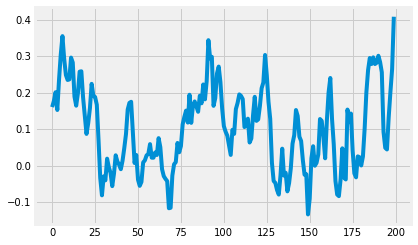

In [35]:
plt.plot(pred[-200:])

In [36]:
idx[-200:]

Index(['2016-03-18', '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
       '2016-03-28', '2016-03-29', '2016-03-30', '2016-03-31', '2016-04-01',
       ...
       '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
       '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30'],
      dtype='object', name='Dt', length=200)

* After getting the prediction from the holdout data , we can compared it with the real holdout

## Evaluate your model on the holdout data directory

**You must run the following cell** from the directory that contains your model file

Here is how we will evaluate your submission
- we will create a directory whose only content is
    - sub-directory `Data`
- we will copy your model file to this directory with the name stored in `model_path`
- we will run the cell in your notebook that should be a copy of the one below
    - it calls procedure `MyModel` with the arguments given below
    - your implementation of `MyModel`
        - must successfully load your model file, *given where **we** have place it as described above*
        - must successfully return one prediction for each example in the holdout directory *given where **we** have placed the holdout directory*

In [1]:
import os
holdout_dir = os.path.join(".", "Data", "holdout")
predicts = MyModel(holdout_dir, model_path)

NameError: name 'os' is not defined

In [ ]:
print("Done")

# start

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import nn_helper module
import helper
%aimport helper

helper = helper.HELPER()

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM , GRU , SimpleRNN , Dense , GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD , Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Start Recipe of Machine learning 

# We are going to be constructing the recipe in 4 part

## Part 1 : First Glance exploratory analysis
    * We will create the 1st glance analysis
    * Loading stock and analysing
    * Create simple model and perform error analysis
## Part 2 : LSTM Model with Lagged Variable
    * We will create more lagged return
    * More complex model that suit to sequence problem : lstm
    * Analyse the result
## Part 3 : Complex model with complex feature
    *Engineering more feature 
    *Other stock faeture
    *stock information
    *technical indicator feature
    *perform complex model
         - with no dimension reduction
         - with dimension reduction 
    *analyse the result
## Part 4 Save the best model and conclusion

* Import necessary package

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import sklearn

import os
import math

%matplotlib inline



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import nn_helper module
import helper
%aimport helper

helper = helper.HELPER()


import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM , GRU , SimpleRNN , Dense , GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD , Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Part 1 : First Glance exploratory analysis

### Load all of the stock data avaible
* The stocks list we will load will be all of them
    * However some of the stock has different time period than the AAPL
    * These stock and their respective total length of time series are
             - ACN 3888  CRM 3155  FB 1163  GOOG 3115    MA 2670  V 2214 XLRE 311  
             - we imputed them as 0 , since there will be no variation when the stock is not originate into the market
         
    
* The format will be the following: 
            - Future_Return_AAPL (as label) = 1 sstep ahead shift of return value
        
    * And for each stock name: 
            - Return_eachstockname (as features)
            - Volume_eachstockname (as features)
            - Div_eachstockname (as features)
            - Spread_eachstockname (as feature) = High - Low for each stock
        
    * The following columns will be loaded Close, Adj Clsoe , High ,Low:
            - These columns will not be used as the feature 
            - However, when constructing the teachnical analysis : these columnns are essential
            - Adj_Close_eachstockname
            - Close_eachstockname
            - High_eachstockname
            - Low_eachstockname
            
    * Save as df_full

In [6]:
# the stock that dont has full length are ACN 3888  CRM 3155  FB 1163  GOOG 3115    MA 2670  V 2214 XLRE 311  
df_full = []
stock_lists = ["AAPL","ADBE","CSCO","IBM","INTC","MSFT","NVDA","SPY","XLB","XLE","XLF","XLI","XLK","XLP","XLU","XLV","XLY","ACN","CRM","FB","GOOG","MA","V","XLRE"]
for i in stock_lists:
    if i == "AAPL":
        df_full = pd.read_csv('Data/train/{xx}.csv'.format(xx = i)).dropna(thresh=2)[["Adj Close","Volume","Dt","Div","Close","High","Low"]]
        df_full["Adj_Close_AAPL"] = df_full['Adj Close']
        df_full["PrevClose"] = df_full['Close'].shift(1)
        df_full["Return_AAPL"] = (df_full['Close'] - df_full["PrevClose"])/df_full["PrevClose"]
        df_full["Future_Return_AAPL"] = df_full['Return_AAPL'].shift(-1)
        df_full["Volume_{x}".format(x = i)] = df_full["Volume"]
        df_full["Div_{x}".format(x = i)] = df_full["Div"]
        
        df_full["High_{x}".format(x = i)] = df_full["High"]
        df_full["Low_{x}".format(x = i)] = df_full["Low"]
        df_full["Close_{x}".format(x = i)] = df_full["Close"]
        df_full["Spread_{x}".format(x = i)]= df_full["High"] - df_full["Low"]
        
        
    else:
        df_stock = pd.read_csv('Data/train/{xx}.csv'.format(xx = i)).dropna(thresh=2)[["Adj Close","Volume","Div","Close","High","Low"]]
        df_stock["PrevClose"] = df_stock['Close'].shift(1)
        df_stock["Return"] = (df_stock['Close'] - df_stock["PrevClose"])/df_stock["PrevClose"]
        
        df_full["Adj_Close_{x}".format(x = i)] = df_stock["Adj Close"]
        df_full["Return_{x}".format(x = i)] = df_stock["Return"]
        df_full["Volume_{x}".format(x = i)] = df_stock["Volume"]
        
        df_full["Div_{x}".format(x = i)] = df_stock["Div"]
        df_full["Spread_{x}".format(x = i)]= df_stock["High"] - df_stock["Low"]
        df_full["High_{x}".format(x = i)] = df_stock["High"]
        df_full["Low_{x}".format(x = i)] = df_stock["Low"]
        df_full["Close_{x}".format(x = i)] = df_stock["Close"]
            
            
        
        
df_full = df_full.drop(["Adj Close","Volume","PrevClose","Div","Close","High","Low"] , axis = 1)
df_full = df_full.set_index('Dt')        

df_full = df_full.iloc[1:len(df_full)-1,:]
df_full = df_full.fillna(0)








* Shape and structure of dataframe

In [7]:
df_full.shape

(4275, 193)

In [8]:
df_full.head()

,Adj_Close_AAPL,Return_AAPL,Future_Return_AAPL,Volume_AAPL,Div_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Spread_AAPL,Adj_Close_ADBE,...,Low_V,Close_V,Adj_Close_XLRE,Return_XLRE,Volume_XLRE,Div_XLRE,Spread_XLRE,High_XLRE,Low_XLRE,Close_XLRE
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.1852,-0.084315,0.014634,128094400.0,0.0,110.625,101.188,102.50,9.437,14.9094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,3.2318,0.014634,-0.086538,194580400.0,0.0,110.563,103.000,104.00,7.563,15.2042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,2.9521,-0.086538,0.047368,191993200.0,0.0,107.000,95.000,95.00,12.000,15.3283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,3.0920,0.047368,-0.017588,115183600.0,0.0,101.000,95.500,99.50,5.500,16.0730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-10,3.0376,-0.017588,-0.051151,126266000.0,0.0,102.250,94.750,97.75,7.500,16.6936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory analysis 
* After loading the data some exploration need to be made
            - Check NA value 
            - Check distribution and outlier
    

* Check NA value
    - Sum all row and column = 0 : NO NA and NAN

In [9]:
pd.set_option('display.max_rows', 200)
df_full.isnull().sum().sum()

0

* Check the distribution of label Y

<AxesSubplot:>

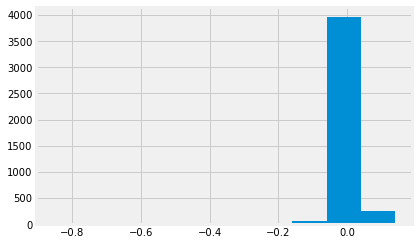

In [10]:
y_col = "Future_Return_AAPL"

y = df_full[y_col]
X = df_full[[i for i in df_full.columns if i not in [y_col]]]


y.hist()

In [11]:
y.sort_values()

Dt
2014-06-06   -0.854857
2000-09-28   -0.518692
2005-02-25   -0.495898
2000-06-20   -0.450617
2008-09-26   -0.179195
                ...   
2008-11-21    0.125575
2001-04-18    0.128565
2004-10-13    0.131572
2000-02-29    0.136864
2008-10-10    0.139050
Name: Future_Return_AAPL, Length: 4275, dtype: float64

* As we can see there are 4 value that corresponding to 
            * 2014-06-06   -0.854857
            * 2000-09-28   -0.518692
            * 2005-02-25   -0.495898
            * 2000-06-20   -0.450617
        - which is at date 2000-09-28 2014-06-06 2005-02-25 2000-06-20
        - This is future return : the actual return should beat date 2000-09-29 2014-06-07 2005-02-26 2000-06-21
        - Need to delete this value otherwise it will present the huge outlier into the model
        - Imputed them after deleted

In [12]:
y[y.index == "2000-09-28"] = None
y[y.index == "2014-06-06"] = None
y[y.index == "2005-02-25"] = None
y[y.index == "2000-06-20"] = None

In [13]:

y[y.index == "2000-09-28"]

Dt
2000-09-28   NaN
Name: Future_Return_AAPL, dtype: float64

* Impute that value by rolling mean 10 period (2 week average return value)
    - Save into "y_filled"
    - X columns will be imputed later

In [14]:
y_filled = y.fillna(y.rolling(10, min_periods = 1).mean())

In [15]:
y_filled[y_filled.index == "2000-09-28"]

Dt
2000-09-28   -0.001638
Name: Future_Return_AAPL, dtype: float64

In [16]:
y_filled[y_filled.index == "2014-06-06"]

Dt
2014-06-06    0.005608
Name: Future_Return_AAPL, dtype: float64

In [17]:
y_filled[y_filled.index == "2005-02-25"]

Dt
2005-02-25    0.010519
Name: Future_Return_AAPL, dtype: float64

In [18]:
y_filled[y_filled.index == "2000-06-20"]

Dt
2000-06-20    0.005945
Name: Future_Return_AAPL, dtype: float64

* After imputing 
        - The value changed from extreme to rolling mean
        - Let check the distribution of imputed Y

<AxesSubplot:>

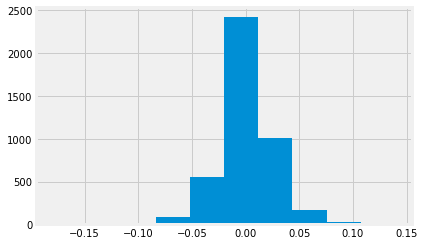

In [19]:
y_filled.hist()

* We got Better shape distribution

#### check every distribution of all X features
    1.  Return of each stock
    2.  Volume of each stock
    3.  Div of each stock
    4.  Spread of each stock

#### 1st we check the Return for each stock

In [20]:
my_string = 'Return_'
return_stocks_list = [my_string + str(x)  for x in stock_lists]

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_AAPL')

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 6.100e+01, 3.957e+03, 2.510e+02]),
 array([-0.85485695, -0.75546629, -0.65607564, -0.55668499, -0.45729433,
        -0.35790368, -0.25851303, -0.15912237, -0.05973172,  0.03965893,
         0.13904959]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_ADBE')

(array([2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 9.000e+00, 9.800e+01,
        3.386e+03, 7.350e+02, 4.200e+01, 2.000e+00]),
 array([-0.50069533, -0.42665181, -0.3526083 , -0.27856479, -0.20452128,
        -0.13047776, -0.05643425,  0.01760926,  0.09165278,  0.16569629,
         0.2397398 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_CSCO')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 2.000e+02,
        3.796e+03, 2.500e+02, 1.500e+01, 3.000e+00]),
 array([-0.4610355 , -0.39054357, -0.32005164, -0.24955971, -0.17906778,
        -0.10857585, -0.03808392,  0.03240801,  0.10289993,  0.17339186,
         0.24388379]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_IBM')

(array([1.00e+00, 1.00e+00, 3.00e+00, 5.60e+01, 3.28e+02, 3.01e+03,
        7.91e+02, 6.70e+01, 1.20e+01, 6.00e+00]),
 array([-0.15541593, -0.12785113, -0.10028633, -0.07272152, -0.04515672,
        -0.01759192,  0.00997288,  0.03753768,  0.06510248,  0.09266729,
         0.12023209]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_INTC')

(array([3.000e+00, 0.000e+00, 1.200e+01, 6.800e+01, 1.100e+03, 2.821e+03,
        2.370e+02, 2.900e+01, 4.000e+00, 1.000e+00]),
 array([-0.22031748, -0.17816285, -0.13600821, -0.09385357, -0.05169894,
        -0.0095443 ,  0.03261033,  0.07476497,  0.11691961,  0.15907424,
         0.20122888]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_MSFT')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.400e+01,
        1.129e+03, 3.097e+03, 3.000e+01, 2.000e+00]),
 array([-0.48322981, -0.41534161, -0.34745342, -0.27956522, -0.21167702,
        -0.14378882, -0.07590062, -0.00801242,  0.05987578,  0.12776398,
         0.19565217]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_NVDA')

(array([3.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 1.010e+02, 3.418e+03,
        7.090e+02, 3.000e+01, 5.000e+00, 2.000e+00]),
 array([-0.57062276, -0.4711451 , -0.37166744, -0.27218978, -0.17271212,
        -0.07323446,  0.0262432 ,  0.12572086,  0.22519852,  0.32467619,
         0.42415385]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_SPY')

(array([4.000e+00, 1.100e+01, 9.000e+01, 1.657e+03, 2.396e+03, 1.030e+02,
        1.200e+01, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.09844767, -0.07408313, -0.04971859, -0.02535405, -0.00098951,
         0.02337503,  0.04773958,  0.07210412,  0.09646866,  0.1208332 ,
         0.14519774]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLB')

(array([1.000e+00, 6.000e+00, 2.600e+01, 3.670e+02, 2.772e+03, 1.026e+03,
        6.800e+01, 7.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.12412096, -0.09765123, -0.0711815 , -0.04471177, -0.01824204,
         0.00822768,  0.03469741,  0.06116714,  0.08763687,  0.1141066 ,
         0.14057632]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLE')

(array([4.000e+00, 3.000e+00, 2.500e+01, 3.300e+02, 2.876e+03, 9.790e+02,
        5.100e+01, 2.000e+00, 3.000e+00, 2.000e+00]),
 array([-0.14443786, -0.11351942, -0.08260098, -0.05168254, -0.0207641 ,
         0.01015434,  0.04107278,  0.07199122,  0.10290966,  0.1338281 ,
         0.16474654]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLF')

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 6.000e+01,
        3.845e+03, 3.470e+02, 1.300e+01, 4.000e+00]),
 array([-0.46029794, -0.39179661, -0.32329528, -0.25479395, -0.18629262,
        -0.11779129, -0.04928995,  0.01921138,  0.08771271,  0.15621404,
         0.22471537]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLI')

(array([3.000e+00, 1.000e+01, 5.500e+01, 4.090e+02, 2.666e+03, 1.021e+03,
        8.800e+01, 1.800e+01, 3.000e+00, 2.000e+00]),
 array([-0.0940499 , -0.07393973, -0.05382956, -0.03371938, -0.01360921,
         0.00650096,  0.02661113,  0.04672131,  0.06683148,  0.08694165,
         0.10705183]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLK')

(array([1.100e+01, 8.200e+01, 5.990e+02, 2.948e+03, 5.450e+02, 7.200e+01,
        1.000e+01, 5.000e+00, 1.000e+00, 2.000e+00]),
 array([-0.08653846, -0.06178292, -0.03702738, -0.01227184,  0.0124837 ,
         0.03723924,  0.06199478,  0.08675033,  0.11150587,  0.13626141,
         0.16101695]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLP')

(array([   5.,   11.,   67.,  488., 2460., 1100.,  126.,    9.,    6.,
           3.]),
 array([-0.06024096, -0.04733118, -0.03442139, -0.02151161, -0.00860182,
         0.00430796,  0.01721775,  0.03012753,  0.04303732,  0.0559471 ,
         0.06885689]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLU')

(array([5.000e+00, 1.000e+01, 1.100e+02, 1.325e+03, 2.630e+03, 1.740e+02,
        1.300e+01, 2.000e+00, 4.000e+00, 2.000e+00]),
 array([-0.08528529, -0.06468378, -0.04408227, -0.02348076, -0.00287925,
         0.01772226,  0.03832377,  0.05892528,  0.07952679,  0.1001283 ,
         0.12072981]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLV')

(array([3.00e+00, 1.00e+00, 3.50e+01, 5.16e+02, 3.23e+03, 4.61e+02,
        2.40e+01, 2.00e+00, 1.00e+00, 2.00e+00]),
 array([-0.09782609, -0.0759888 , -0.05415151, -0.03231422, -0.01047693,
         0.01136036,  0.03319765,  0.05503494,  0.07687223,  0.09870952,
         0.12054681]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLY')

(array([1.00e+00, 3.00e+00, 1.30e+01, 7.80e+01, 7.21e+02, 2.86e+03,
        5.18e+02, 6.50e+01, 1.20e+01, 4.00e+00]),
 array([-0.11624892, -0.09484881, -0.07344869, -0.05204858, -0.03064846,
        -0.00924835,  0.01215177,  0.03355188,  0.05495199,  0.07635211,
         0.09775222]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_ACN')

(array([5.000e+00, 9.000e+00, 5.300e+01, 4.730e+02, 3.106e+03, 5.380e+02,
        6.900e+01, 1.800e+01, 2.000e+00, 2.000e+00]),
 array([-0.13454318, -0.10472208, -0.07490098, -0.04507988, -0.01525878,
         0.01456232,  0.04438342,  0.07420452,  0.10402562,  0.13384672,
         0.16366782]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_CRM')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.100e+01, 2.808e+03, 1.429e+03, 2.500e+01]),
 array([-0.75482522, -0.66021187, -0.56559852, -0.47098518, -0.37637183,
        -0.28175849, -0.18714514, -0.09253179,  0.00208155,  0.0966949 ,
         0.19130824]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_FB')

(array([7.000e+00, 5.100e+01, 3.813e+03, 3.740e+02, 2.500e+01, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.11696778, -0.0756633 , -0.03435883,  0.00694564,  0.04825011,
         0.08955459,  0.13085906,  0.17216353,  0.21346801,  0.25477248,
         0.29607695]),
 <BarContainer object of 10 artists>)

<ipython-input-21-23c22dc7a4d4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_GOOG')

(array([5.000e+00, 2.700e+01, 2.220e+02, 3.253e+03, 7.010e+02, 5.100e+01,
        7.000e+00, 4.000e+00, 4.000e+00, 1.000e+00]),
 array([-0.11609146, -0.08449076, -0.05289006, -0.02128937,  0.01031133,
         0.04191203,  0.07351272,  0.10511342,  0.13671412,  0.16831481,
         0.19991551]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_MA')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.850e+02, 3.777e+03, 1.200e+01]),
 array([-0.89822598, -0.78755706, -0.67688813, -0.56621921, -0.45555029,
        -0.34488136, -0.23421244, -0.12354352, -0.01287459,  0.09779433,
         0.20846325]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_V')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 9.800e+01, 4.153e+03, 2.100e+01]),
 array([-0.75040161, -0.66036411, -0.5703266 , -0.4802891 , -0.3902516 ,
        -0.30021409, -0.21017659, -0.12013908, -0.03010158,  0.05993593,
         0.14997343]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Return_XLRE')

(array([1.000e+00, 2.000e+00, 0.000e+00, 1.300e+01, 3.200e+01, 7.700e+01,
        4.087e+03, 4.100e+01, 1.900e+01, 3.000e+00]),
 array([-0.05299333, -0.04434775, -0.03570216, -0.02705657, -0.01841099,
        -0.0097654 , -0.00111981,  0.00752577,  0.01617136,  0.02481695,
         0.03346253]),
 <BarContainer object of 10 artists>)

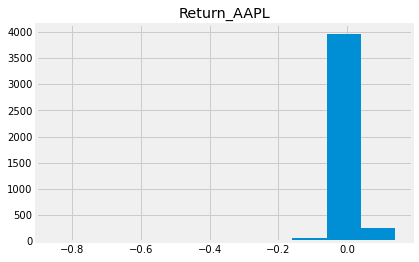

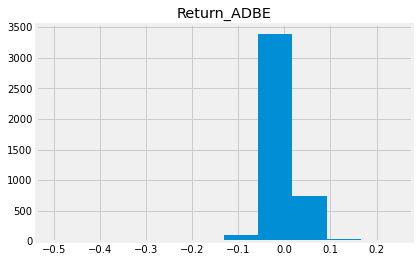

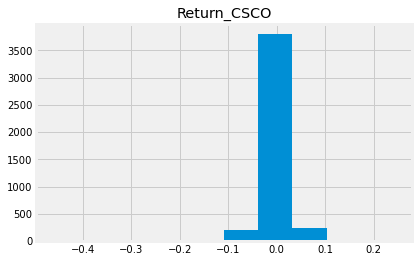

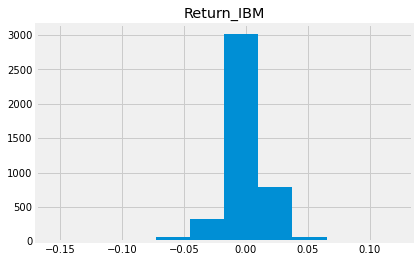

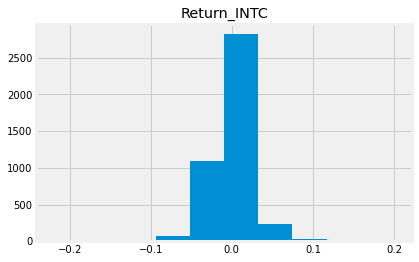

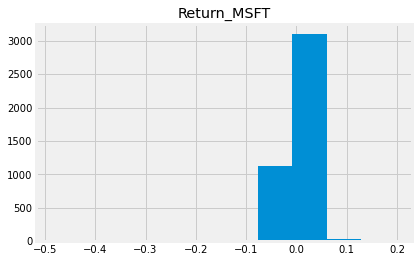

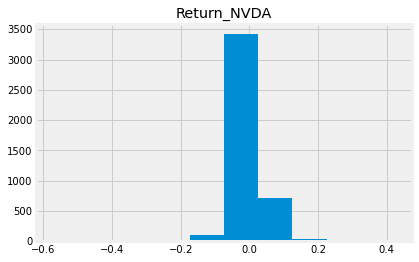

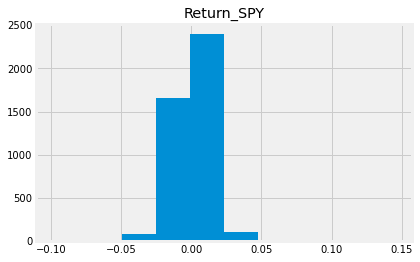

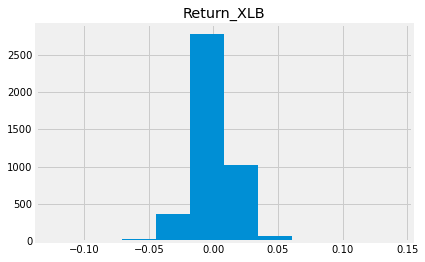

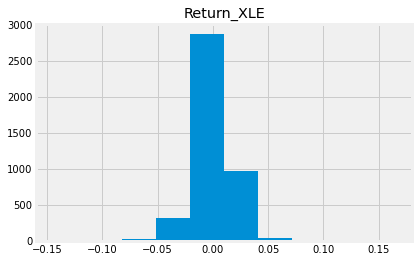

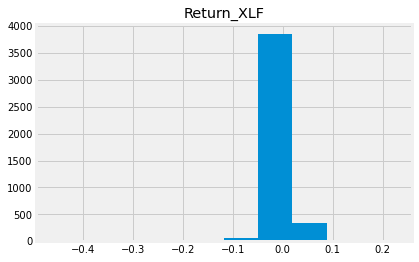

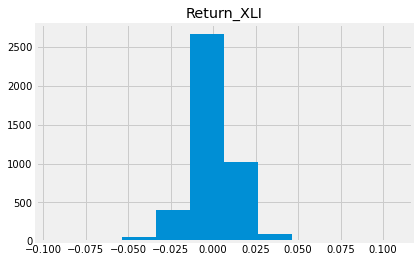

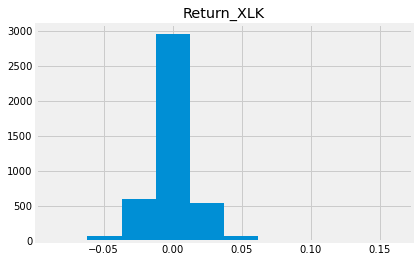

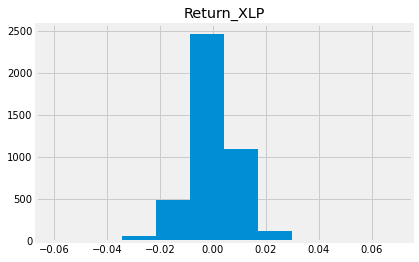

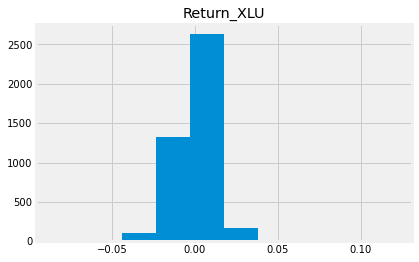

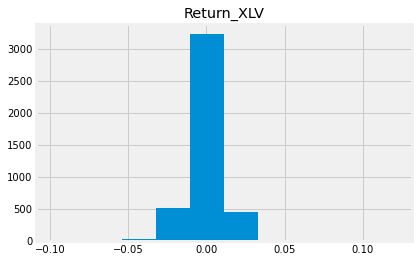

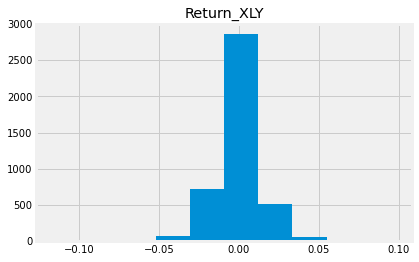

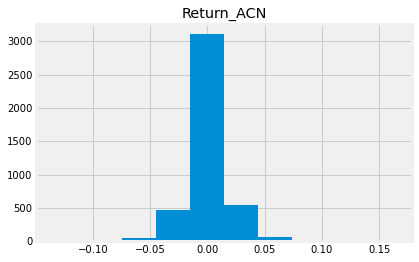

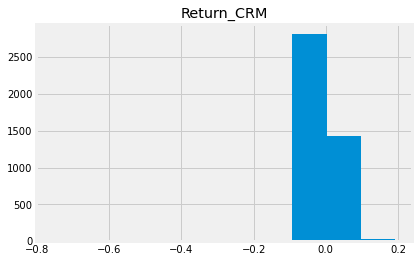

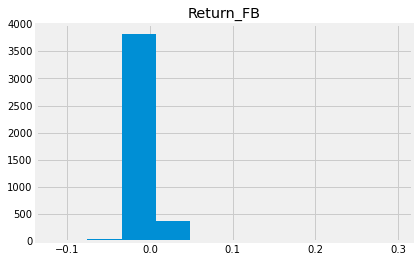

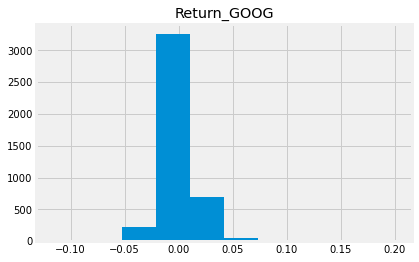

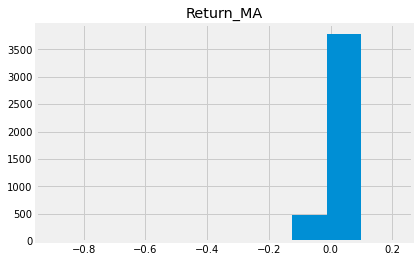

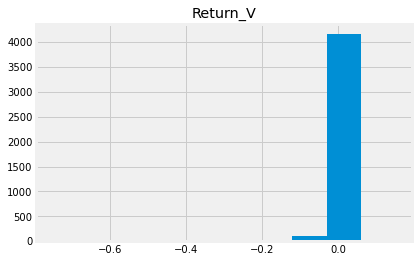

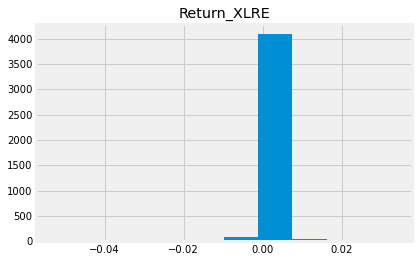

In [21]:
for i in return_stocks_list:

    plt.figure()
    plt.title(i)
    plt.hist(X[i])

* Every Return asided from AAPL are in the good shape 
    * centered around the mean
    * With reasonable dispersion

#### 2nd we check the Volume for each stock

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_AAPL')

(array([3.465e+03, 6.920e+02, 9.700e+01, 1.700e+01, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([9.83500000e+06, 1.94392520e+08, 3.78950040e+08, 5.63507560e+08,
        7.48065080e+08, 9.32622600e+08, 1.11718012e+09, 1.30173764e+09,
        1.48629516e+09, 1.67085268e+09, 1.85541020e+09]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_ADBE')

(array([3.934e+03, 3.000e+02, 2.800e+01, 7.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.982000e+05, 1.141362e+07, 2.222904e+07, 3.304446e+07,
        4.385988e+07, 5.467530e+07, 6.549072e+07, 7.630614e+07,
        8.712156e+07, 9.793698e+07, 1.087524e+08]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_CSCO')

(array([2.871e+03, 1.258e+03, 1.140e+02, 2.200e+01, 7.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([9.2290000e+05, 5.6834630e+07, 1.1274636e+08, 1.6865809e+08,
        2.2456982e+08, 2.8048155e+08, 3.3639328e+08, 3.9230501e+08,
        4.4821674e+08, 5.0412847e+08, 5.6004020e+08]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_IBM')

(array([1.722e+03, 1.879e+03, 4.940e+02, 1.210e+02, 3.800e+01, 1.300e+01,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1027500.,  5045480.,  9063460., 13081440., 17099420., 21117400.,
        25135380., 29153360., 33171340., 37189320., 41207300.]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_INTC')

(array([ 853., 2174., 1000.,  180.,   42.,   14.,    8.,    0.,    0.,
           4.]),
 array([1.1554000e+06, 3.1974620e+07, 6.2793840e+07, 9.3613060e+07,
        1.2443228e+08, 1.5525150e+08, 1.8607072e+08, 2.1688994e+08,
        2.4770916e+08, 2.7852838e+08, 3.0934760e+08]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_MSFT')

(array([2.919e+03, 1.207e+03, 1.190e+02, 2.000e+01, 7.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([8.4096000e+06, 6.6673860e+07, 1.2493812e+08, 1.8320238e+08,
        2.4146664e+08, 2.9973090e+08, 3.5799516e+08, 4.1625942e+08,
        4.7452368e+08, 5.3278794e+08, 5.9105220e+08]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_NVDA')

(array([3.507e+03, 6.680e+02, 7.500e+01, 1.500e+01, 6.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.1411000e+06, 2.4104130e+07, 4.7067160e+07, 7.0030190e+07,
        9.2993220e+07, 1.1595625e+08, 1.3891928e+08, 1.6188231e+08,
        1.8484534e+08, 2.0780837e+08, 2.3077140e+08]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_SPY')

(array([2.108e+03, 1.234e+03, 5.650e+02, 2.050e+02, 8.900e+01, 4.300e+01,
        1.400e+01, 8.000e+00, 7.000e+00, 2.000e+00]),
 array([1.4366000e+06, 8.8395570e+07, 1.7535454e+08, 2.6231351e+08,
        3.4927248e+08, 4.3623145e+08, 5.2319042e+08, 6.1014939e+08,
        6.9710836e+08, 7.8406733e+08, 8.7102630e+08]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLB')

(array([2016., 1017.,  666.,  333.,  138.,   59.,   20.,   17.,    6.,
           3.]),
 array([3.90000e+03, 3.90430e+06, 7.80470e+06, 1.17051e+07, 1.56055e+07,
        1.95059e+07, 2.34063e+07, 2.73067e+07, 3.12071e+07, 3.51075e+07,
        3.90079e+07]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLE')

(array([1640., 1320.,  777.,  301.,  140.,   69.,   17.,    5.,    4.,
           2.]),
 array([1.460000e+04, 9.351460e+06, 1.868832e+07, 2.802518e+07,
        3.736204e+07, 4.669890e+07, 5.603576e+07, 6.537262e+07,
        7.470948e+07, 8.404634e+07, 9.338320e+07]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLF')

(array([3.481e+03, 5.650e+02, 1.600e+02, 4.000e+01, 2.200e+01, 4.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.2300000e+04, 1.0509729e+08, 2.1015228e+08, 3.1520727e+08,
        4.2026226e+08, 5.2531725e+08, 6.3037224e+08, 7.3542723e+08,
        8.4048222e+08, 9.4553721e+08, 1.0505922e+09]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLI')

(array([2.297e+03, 1.197e+03, 5.350e+02, 1.500e+02, 5.500e+01, 2.100e+01,
        1.000e+01, 6.000e+00, 1.000e+00, 3.000e+00]),
 array([4.000000e+02, 6.718440e+06, 1.343648e+07, 2.015452e+07,
        2.687256e+07, 3.359060e+07, 4.030864e+07, 4.702668e+07,
        5.374472e+07, 6.046276e+07, 6.718080e+07]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLK')

(array([2.540e+03, 1.237e+03, 3.500e+02, 9.300e+01, 3.400e+01, 1.200e+01,
        4.000e+00, 3.000e+00, 0.000e+00, 2.000e+00]),
 array([3.940000e+04, 5.852560e+06, 1.166572e+07, 1.747888e+07,
        2.329204e+07, 2.910520e+07, 3.491836e+07, 4.073152e+07,
        4.654468e+07, 5.235784e+07, 5.817100e+07]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLP')

(array([3.255e+03, 8.020e+02, 1.530e+02, 4.700e+01, 1.100e+01, 5.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([6.500000e+03, 6.878230e+06, 1.374996e+07, 2.062169e+07,
        2.749342e+07, 3.436515e+07, 4.123688e+07, 4.810861e+07,
        5.498034e+07, 6.185207e+07, 6.872380e+07]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLU')

(array([2.288e+03, 1.223e+03, 4.950e+02, 1.700e+02, 5.700e+01, 2.700e+01,
        1.200e+01, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([3.200000e+03, 5.315220e+06, 1.062724e+07, 1.593926e+07,
        2.125128e+07, 2.656330e+07, 3.187532e+07, 3.718734e+07,
        4.249936e+07, 4.781138e+07, 5.312340e+07]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLV')

(array([3.122e+03, 9.050e+02, 1.750e+02, 4.600e+01, 1.500e+01, 7.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([9.000000e+02, 6.647830e+06, 1.329476e+07, 1.994169e+07,
        2.658862e+07, 3.323555e+07, 3.988248e+07, 4.652941e+07,
        5.317634e+07, 5.982327e+07, 6.647020e+07]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLY')

(array([2096., 1228.,  611.,  225.,   65.,   24.,   10.,    9.,    4.,
           3.]),
 array([4.000000e+02, 3.248130e+06, 6.495860e+06, 9.743590e+06,
        1.299132e+07, 1.623905e+07, 1.948678e+07, 2.273451e+07,
        2.598224e+07, 2.922997e+07, 3.247770e+07]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_ACN')

(array([4.212e+03, 4.700e+01, 8.000e+00, 5.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([       0.,  8965590., 17931180., 26896770., 35862360., 44827950.,
        53793540., 62759130., 71724720., 80690310., 89655900.]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_CRM')

(array([3.431e+03, 7.070e+02, 9.500e+01, 2.000e+01, 1.400e+01, 2.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([       0.,  8733240., 17466480., 26199720., 34932960., 43666200.,
        52399440., 61132680., 69865920., 78599160., 87332400.]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_FB')

(array([4.034e+03, 2.090e+02, 2.300e+01, 4.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.0000000e+00, 5.7357640e+07, 1.1471528e+08, 1.7207292e+08,
        2.2943056e+08, 2.8678820e+08, 3.4414584e+08, 4.0150348e+08,
        4.5886112e+08, 5.1621876e+08, 5.7357640e+08]),
 <BarContainer object of 10 artists>)

<ipython-input-534-daaf3ebf522e>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_GOOG')

(array([3.194e+03, 7.110e+02, 2.270e+02, 7.400e+01, 3.500e+01, 2.000e+01,
        4.000e+00, 3.000e+00, 4.000e+00, 3.000e+00]),
 array([       0.,  8254150., 16508300., 24762450., 33016600., 41270750.,
        49524900., 57779050., 66033200., 74287350., 82541500.]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_MA')

(array([4.033e+03, 2.070e+02, 2.500e+01, 4.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.000000e+00, 3.953430e+07, 7.906860e+07, 1.186029e+08,
        1.581372e+08, 1.976715e+08, 2.372058e+08, 2.767401e+08,
        3.162744e+08, 3.558087e+08, 3.953430e+08]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_V')

(array([4.214e+03, 4.800e+01, 1.100e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.000000e+00, 7.084860e+07, 1.416972e+08, 2.125458e+08,
        2.833944e+08, 3.542430e+08, 4.250916e+08, 4.959402e+08,
        5.667888e+08, 6.376374e+08, 7.084860e+08]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLRE')

(array([4.232e+03, 3.400e+01, 8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([       0.,  1915080.,  3830160.,  5745240.,  7660320.,  9575400.,
        11490480., 13405560., 15320640., 17235720., 19150800.]),
 <BarContainer object of 10 artists>)

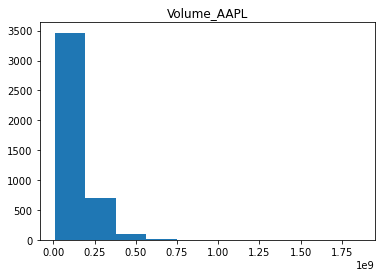

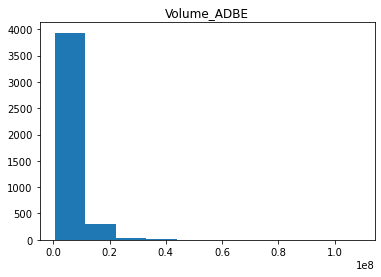

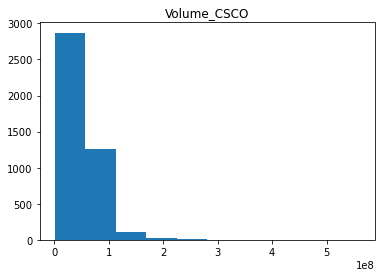

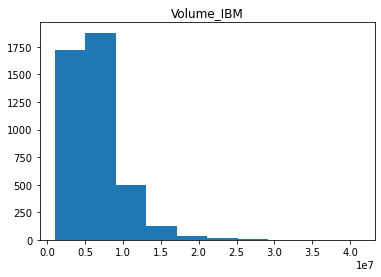

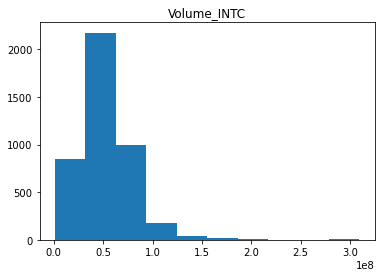

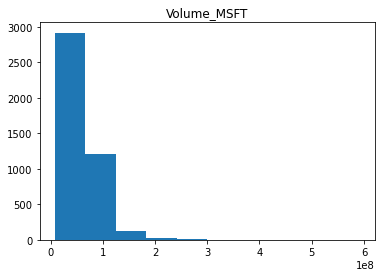

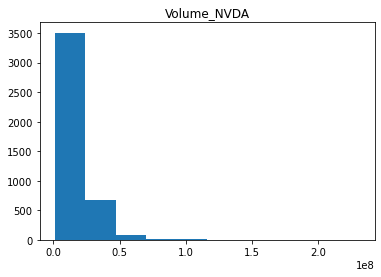

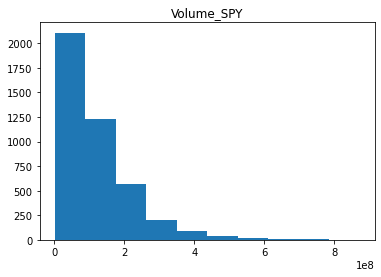

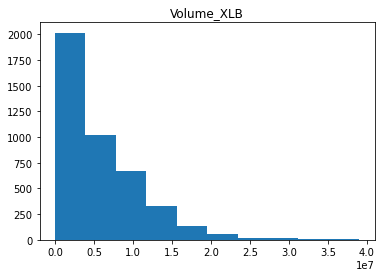

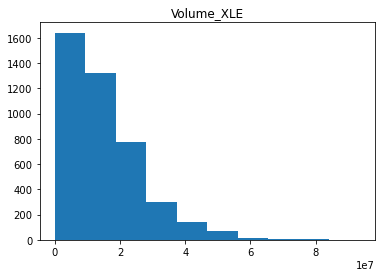

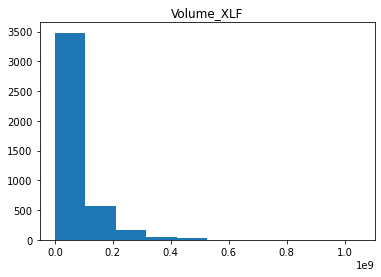

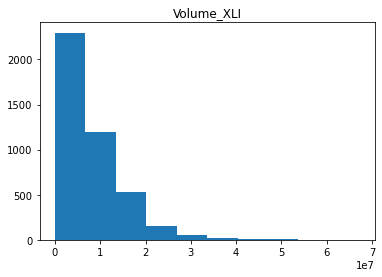

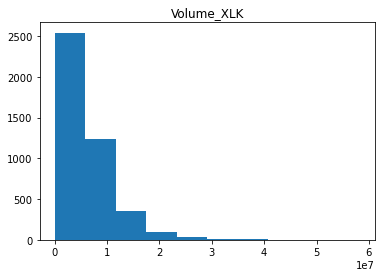

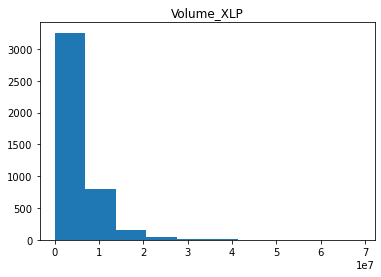

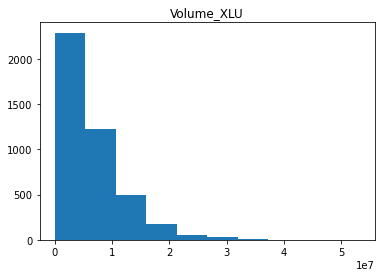

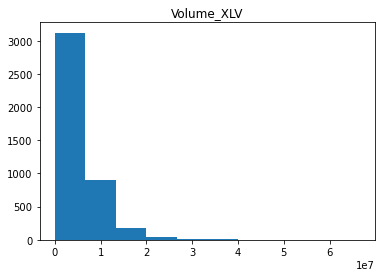

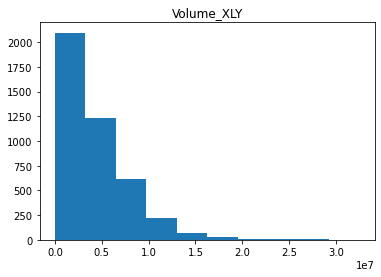

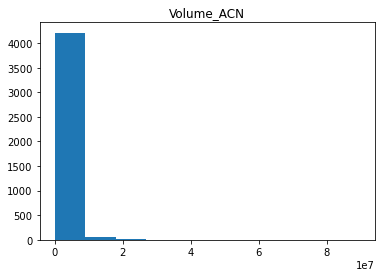

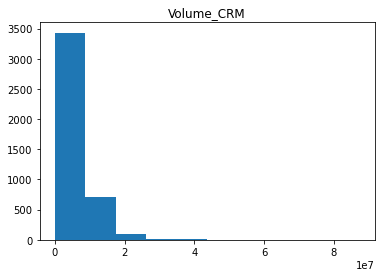

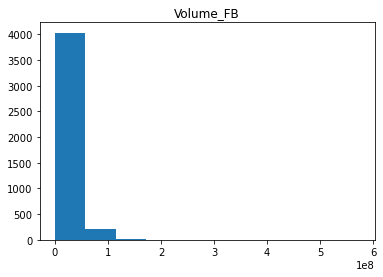

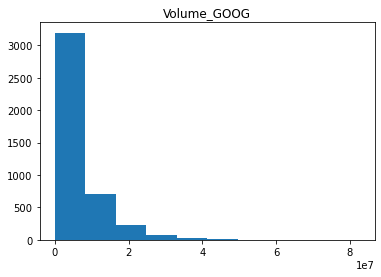

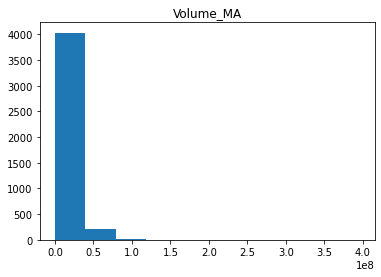

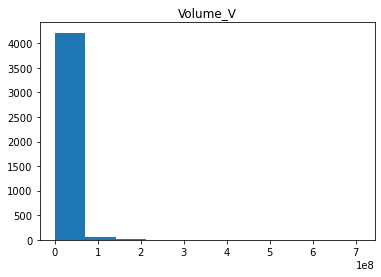

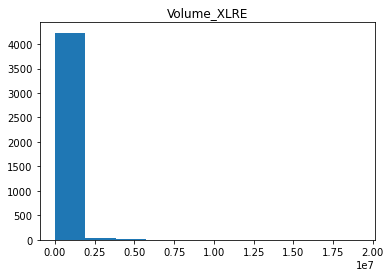

In [534]:
# normal volume
my_string = 'Volume_'
volume_stocks_list = [my_string + str(x)  for x in stock_lists]


for i in volume_stocks_list:

    plt.figure()
    plt.title(i)
    plt.hist(X[i])

* Most value heavy right skewed
* we check the log Volume for each stock

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_AAPL')

(array([9.000e+00, 9.600e+01, 4.600e+02, 9.960e+02, 1.229e+03, 9.410e+02,
        4.330e+02, 1.000e+02, 1.000e+01, 1.000e+00]),
 array([16.10145801, 16.62544937, 17.14944074, 17.6734321 , 18.19742346,
        18.72141483, 19.24540619, 19.76939755, 20.29338891, 20.81738028,
        21.34137164]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_ADBE')

(array([  10.,  140.,  511., 1169., 1553.,  694.,  160.,   29.,    7.,
           2.]),
 array([13.30168043, 13.82197081, 14.3422612 , 14.86255159, 15.38284197,
        15.90313236, 16.42342275, 16.94371314, 17.46400352, 17.98429391,
        18.5045843 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_CSCO')

(array([1.000e+00, 1.000e+00, 1.000e+00, 1.700e+01, 3.470e+02, 1.415e+03,
        2.042e+03, 4.080e+02, 4.100e+01, 2.000e+00]),
 array([13.73527617, 14.37610046, 15.01692476, 15.65774905, 16.29857335,
        16.93939765, 17.58022194, 18.22104624, 18.86187053, 19.50269483,
        20.14351912]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_IBM')

(array([   5.,   45.,  316.,  961., 1327., 1010.,  461.,  121.,   26.,
           3.]),
 array([13.84263923, 14.2117879 , 14.58093658, 14.95008525, 15.31923393,
        15.6883826 , 16.05753128, 16.42667996, 16.79582863, 17.16497731,
        17.53412598]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_INTC')

(array([1.000e+00, 0.000e+00, 1.000e+00, 9.000e+00, 1.490e+02, 7.390e+02,
        1.789e+03, 1.410e+03, 1.640e+02, 1.300e+01]),
 array([13.95995716, 14.51895906, 15.07796095, 15.63696285, 16.19596475,
        16.75496664, 17.31396854, 17.87297043, 18.43197233, 18.99097423,
        19.54997612]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_MSFT')

(array([1.000e+01, 6.700e+01, 4.120e+02, 9.290e+02, 1.674e+03, 9.220e+02,
        2.150e+02, 3.700e+01, 8.000e+00, 1.000e+00]),
 array([15.94488447, 16.37013751, 16.79539055, 17.2206436 , 17.64589664,
        18.07114968, 18.49640273, 18.92165577, 19.34690881, 19.77216185,
        20.1974149 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_NVDA')

(array([4.000e+00, 3.200e+01, 2.670e+02, 8.380e+02, 1.412e+03, 1.199e+03,
        4.220e+02, 8.300e+01, 1.700e+01, 1.000e+00]),
 array([13.94750327, 14.47844676, 15.00939025, 15.54033374, 16.07127723,
        16.60222072, 17.13316421, 17.6641077 , 18.19505119, 18.72599468,
        19.25693817]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_SPY')

(array([   2.,   57.,  229.,  219.,  322.,  845., 1074., 1068.,  392.,
          67.]),
 array([14.17778977, 14.81852907, 15.45926836, 16.10000766, 16.74074695,
        17.38148625, 18.02222555, 18.66296484, 19.30370414, 19.94444343,
        20.58518273]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLB')

(array([  13.,  111.,  275.,  233.,  227.,  270.,  456., 1091., 1349.,
         250.]),
 array([ 8.26873209,  9.18978635, 10.11084062, 11.03189489, 11.95294915,
        12.87400342, 13.79505768, 14.71611195, 15.63716622, 16.55822048,
        17.47927475]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLE')

(array([  22.,  141.,  271.,  344.,  269.,  150.,  189., 1232., 1451.,
         206.]),
 array([ 9.58877688, 10.46512139, 11.3414659 , 12.21781042, 13.09415493,
        13.97049945, 14.84684396, 15.72318847, 16.59953299, 17.4758775 ,
        18.35222202]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLF')

(array([  34.,  143.,  284.,  385.,  537.,  448.,  733., 1222.,  446.,
          43.]),
 array([10.65254239, 11.66455013, 12.67655788, 13.68856562, 14.70057337,
        15.71258112, 16.72458886, 17.73659661, 18.74860435, 19.7606121 ,
        20.77261984]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLI')

(array([  12.,   48.,  152.,  286.,  294.,  413.,  495.,  491., 1838.,
         246.]),
 array([ 5.99146705,  7.19461015,  8.39775325,  9.60089635, 10.80403945,
        12.00718255, 13.21032565, 14.41346875, 15.61661185, 16.81975495,
        18.02289805]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLK')

(array([   3.,   46.,  250.,  549.,  630.,  462.,  795., 1198.,  316.,
          26.]),
 array([10.58152112, 11.31125876, 12.0409964 , 12.77073404, 13.50047168,
        14.23020931, 14.95994695, 15.68968459, 16.41942223, 17.14915987,
        17.87889751]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLP')

(array([  23.,  226.,  357.,  343.,  368.,  462.,  632., 1438.,  408.,
          18.]),
 array([ 8.77955761,  9.70616246, 10.63276731, 11.55937217, 12.48597702,
        13.41258187, 14.33918672, 15.26579157, 16.19239643, 17.11900128,
        18.04560613]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLU')

(array([  36.,  180.,  245.,  144.,  263.,  381.,  419., 1258., 1228.,
         121.]),
 array([ 8.0709064 ,  9.04262857, 10.01435073, 10.9860729 , 11.95779507,
        12.92951723, 13.9012394 , 14.87296157, 15.84468373, 16.8164059 ,
        17.78812807]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLV')

(array([  11.,  129.,  269.,  321.,  332.,  396.,  507., 1272.,  979.,
          59.]),
 array([ 6.80239587,  7.92338272,  9.04436956, 10.1653564 , 11.28634324,
        12.40733008, 13.52831692, 14.64930376, 15.7702906 , 16.89127744,
        18.01226428]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLY')

(array([   4.,   15.,   71.,  222.,  380.,  471.,  442.,  542., 1869.,
         259.]),
 array([ 5.99146705,  7.12192677,  8.25238649,  9.38284621, 10.51330593,
        11.64376565, 12.77422537, 13.90468509, 15.03514482, 16.16560454,
        17.29606426]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_ACN')

(array([ 388.,    0.,    0.,    0.,    0.,    0.,    0.,   24., 3736.,
         127.]),
 array([-6.90775528, -4.38583079, -1.86390631,  0.65801817,  3.17994266,
         5.70186714,  8.22379163, 10.74571611, 13.2676406 , 15.78956508,
        18.31148957]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_CRM')

(array([1121.,    0.,    0.,    0.,    0.,    0.,    0.,    7., 1920.,
        1227.]),
 array([-6.90775528, -4.38845654, -1.86915781,  0.65014093,  3.16943967,
         5.6887384 ,  8.20803714, 10.72733588, 13.24663461, 15.76593335,
        18.28523209]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_FB')

(array([3113.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  697.,
         465.]),
 array([-6.90775528, -4.20023958, -1.49272388,  1.21479182,  3.92230751,
         6.62982321,  9.33733891, 12.04485461, 14.75237031, 17.459886  ,
        20.1674017 ]),
 <BarContainer object of 10 artists>)

<ipython-input-25-94d97b9753e1>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_GOOG')

(array([1161.,    0.,    0.,    0.,    0.,    0.,    4.,    2., 1779.,
        1329.]),
 array([-6.90775528, -4.39409858, -1.88044187,  0.63321483,  3.14687153,
         5.66052824,  8.17418494, 10.68784164, 13.20149835, 15.71515505,
        18.22881176]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_MA')

(array([1606.,    0.,    0.,    0.,    0.,    0.,    0.,   11., 2183.,
         475.]),
 array([-6.90775528, -4.23745332, -1.56715136,  1.10315059,  3.77345255,
         6.44375451,  9.11405647, 11.78435843, 14.45466038, 17.12496234,
        19.7952643 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_V')

(array([2.062e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.063e+03, 1.490e+02]),
 array([-6.90775528, -4.17911567, -1.45047605,  1.27816356,  4.00680318,
         6.73544279,  9.4640824 , 12.19272202, 14.92136163, 17.65000124,
        20.37864086]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Volume_XLRE')

(array([3970.,    0.,    0.,    0.,    4.,   52.,  128.,   36.,   41.,
          44.]),
 array([-6.90775528, -4.54019425, -2.17263321,  0.19492782,  2.56248885,
         4.93004988,  7.29761092,  9.66517195, 12.03273298, 14.40029402,
        16.76785505]),
 <BarContainer object of 10 artists>)

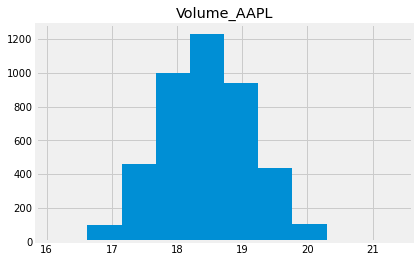

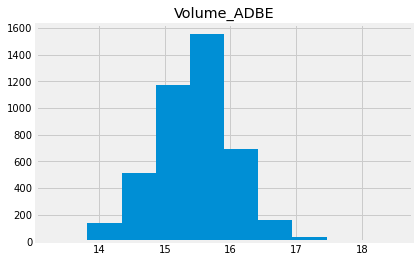

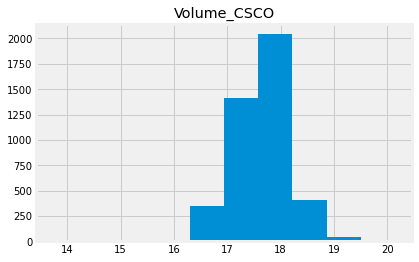

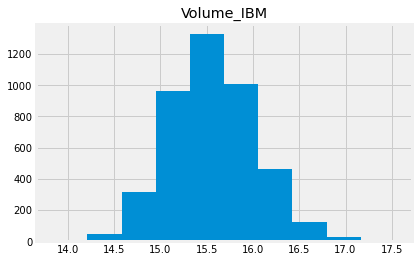

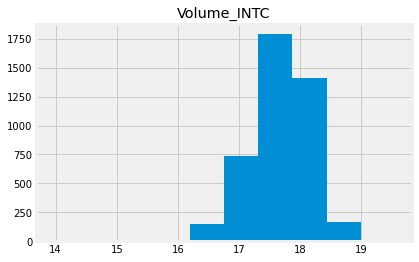

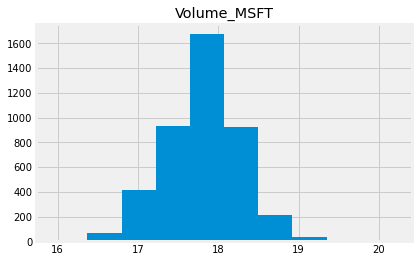

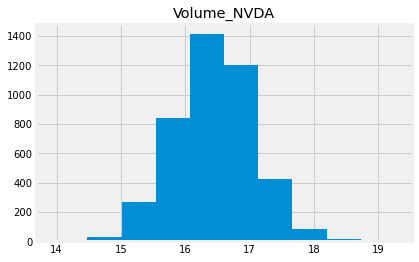

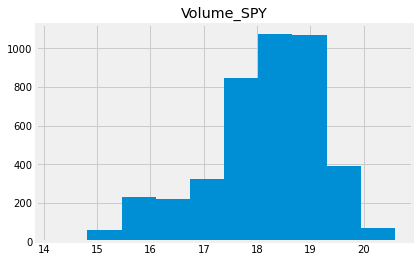

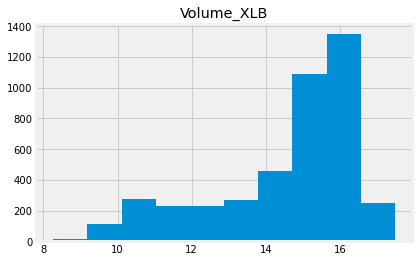

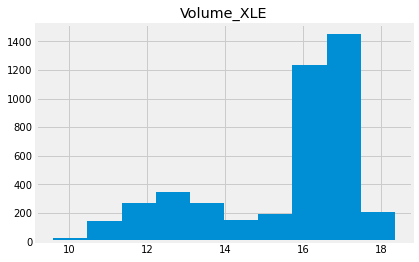

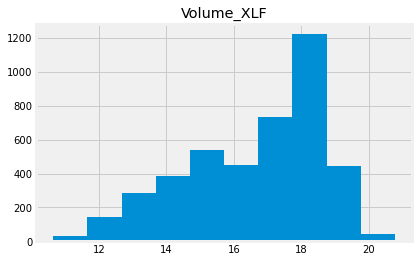

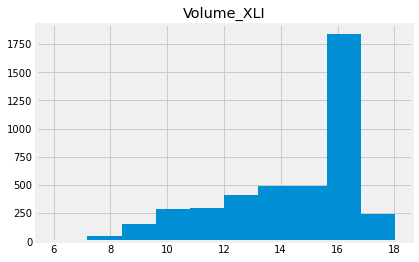

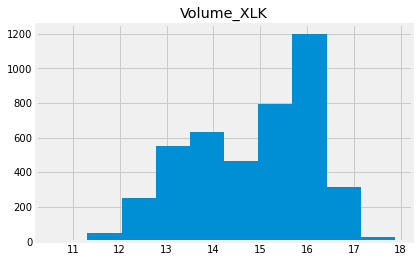

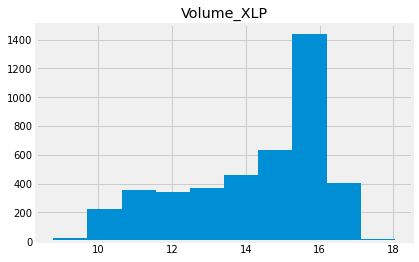

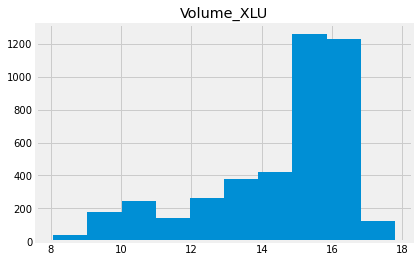

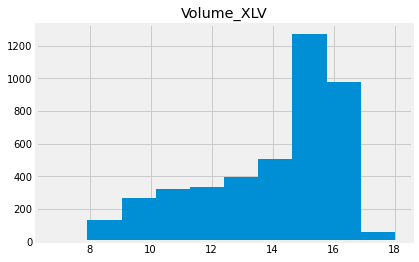

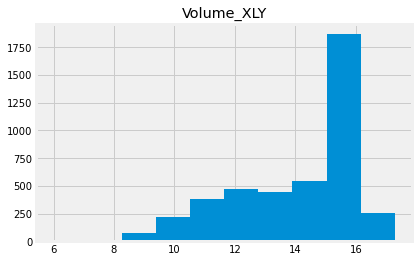

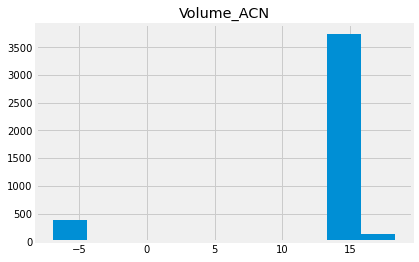

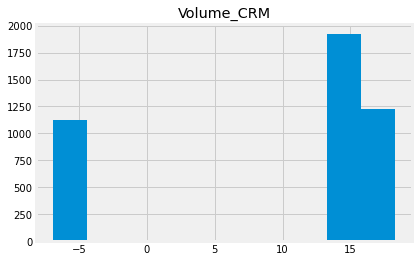

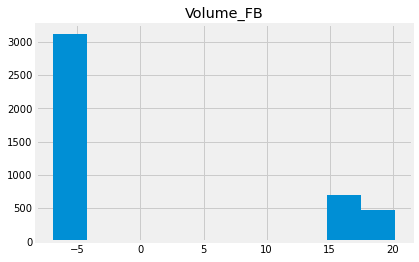

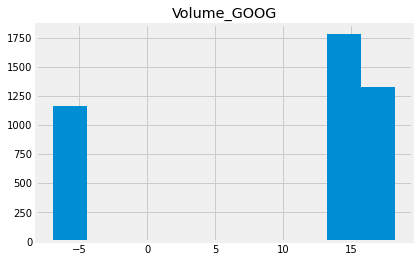

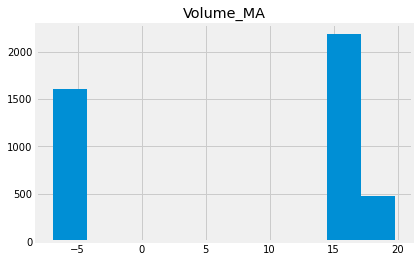

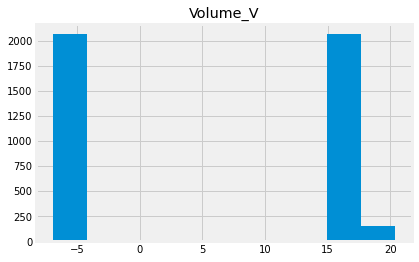

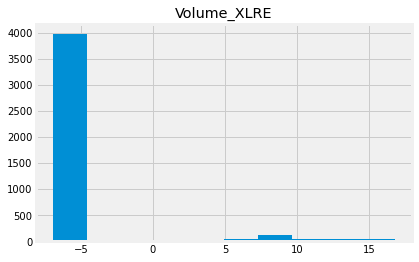

In [25]:
# log volume
my_string = 'Volume_'
volume_stocks_list = [my_string + str(x)  for x in stock_lists]


for i in volume_stocks_list:
    plt.figure()
    plt.title(i)
    plt.hist(np.log(X[i]+0.001))

* The log value of volume distribution look good 
    - asided from the late stock which they has many -5 according to late stock initialization
    

#### 3rd we check the Div for each stock

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_AAPL')

(array([4.257e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 4.000e+00, 7.000e+00]),
 array([0.   , 0.057, 0.114, 0.171, 0.228, 0.285, 0.342, 0.399, 0.456,
        0.513, 0.57 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_ADBE')

(array([4254.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          21.]),
 array([0.     , 0.00065, 0.0013 , 0.00195, 0.0026 , 0.00325, 0.0039 ,
        0.00455, 0.0052 , 0.00585, 0.0065 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_CSCO')

(array([4.252e+03, 0.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 4.000e+00, 3.000e+00]),
 array([0.   , 0.026, 0.052, 0.078, 0.104, 0.13 , 0.156, 0.182, 0.208,
        0.234, 0.26 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_IBM')

(array([4.21e+03, 2.00e+01, 8.00e+00, 8.00e+00, 4.00e+00, 4.00e+00,
        8.00e+00, 4.00e+00, 0.00e+00, 9.00e+00]),
 array([0.  , 0.14, 0.28, 0.42, 0.56, 0.7 , 0.84, 0.98, 1.12, 1.26, 1.4 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_INTC')

(array([4.223e+03, 4.000e+00, 0.000e+00, 8.000e+00, 5.000e+00, 7.000e+00,
        6.000e+00, 0.000e+00, 1.400e+01, 8.000e+00]),
 array([0.   , 0.026, 0.052, 0.078, 0.104, 0.13 , 0.156, 0.182, 0.208,
        0.234, 0.26 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_MSFT')

(array([4.265e+03, 9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.308, 0.616, 0.924, 1.232, 1.54 , 1.848, 2.156, 2.464,
        2.772, 3.08 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_NVDA')

(array([4.258e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        8.000e+00, 0.000e+00, 4.000e+00, 1.000e+00]),
 array([0.   , 0.014, 0.028, 0.042, 0.056, 0.07 , 0.084, 0.098, 0.112,
        0.126, 0.14 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_SPY')

(array([4.206e+03, 0.000e+00, 1.400e+01, 1.400e+01, 1.400e+01, 1.100e+01,
        3.000e+00, 8.000e+00, 3.000e+00, 2.000e+00]),
 array([0.    , 0.1329, 0.2658, 0.3987, 0.5316, 0.6645, 0.7974, 0.9303,
        1.0632, 1.1961, 1.329 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLB')

(array([4.209e+03, 2.000e+01, 2.100e+01, 1.300e+01, 7.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.    , 0.0666, 0.1332, 0.1998, 0.2664, 0.333 , 0.3996, 0.4662,
        0.5328, 0.5994, 0.666 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLE')

(array([4.207e+03, 5.000e+00, 2.000e+01, 1.000e+01, 1.000e+01, 5.000e+00,
        4.000e+00, 5.000e+00, 6.000e+00, 3.000e+00]),
 array([0.    , 0.0542, 0.1084, 0.1626, 0.2168, 0.271 , 0.3252, 0.3794,
        0.4336, 0.4878, 0.542 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLF')

(array([4.274e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.     , 0.44436, 0.88872, 1.33308, 1.77744, 2.2218 , 2.66616,
        3.11052, 3.55488, 3.99924, 4.4436 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLI')

(array([4.208e+03, 9.000e+00, 1.300e+01, 8.000e+00, 1.600e+01, 6.000e+00,
        5.000e+00, 6.000e+00, 3.000e+00, 1.000e+00]),
 array([0.    , 0.0384, 0.0768, 0.1152, 0.1536, 0.192 , 0.2304, 0.2688,
        0.3072, 0.3456, 0.384 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLK')

(array([4.233e+03, 1.200e+01, 9.000e+00, 7.000e+00, 8.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.    , 0.0418, 0.0836, 0.1254, 0.1672, 0.209 , 0.2508, 0.2926,
        0.3344, 0.3762, 0.418 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLP')

(array([4.207e+03, 7.000e+00, 1.700e+01, 1.100e+01, 9.000e+00, 5.000e+00,
        6.000e+00, 6.000e+00, 4.000e+00, 3.000e+00]),
 array([0.    , 0.0398, 0.0796, 0.1194, 0.1592, 0.199 , 0.2388, 0.2786,
        0.3184, 0.3582, 0.398 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLU')

(array([4.206e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 1.400e+01,
        1.100e+01, 1.200e+01, 1.200e+01, 3.000e+00]),
 array([0.    , 0.0463, 0.0926, 0.1389, 0.1852, 0.2315, 0.2778, 0.3241,
        0.3704, 0.4167, 0.463 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLV')

(array([4.216e+03, 1.000e+00, 7.000e+00, 1.200e+01, 1.100e+01, 6.000e+00,
        1.000e+01, 5.000e+00, 3.000e+00, 4.000e+00]),
 array([0.    , 0.0305, 0.061 , 0.0915, 0.122 , 0.1525, 0.183 , 0.2135,
        0.244 , 0.2745, 0.305 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLY')

(array([4.22e+03, 1.90e+01, 1.10e+01, 8.00e+00, 6.00e+00, 6.00e+00,
        4.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([0.    , 0.0492, 0.0984, 0.1476, 0.1968, 0.246 , 0.2952, 0.3444,
        0.3936, 0.4428, 0.492 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_ACN')

(array([4.255e+03, 0.000e+00, 2.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([0.   , 0.121, 0.242, 0.363, 0.484, 0.605, 0.726, 0.847, 0.968,
        1.089, 1.21 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_CRM')

(array([   0.,    0.,    0.,    0.,    0., 4275.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_FB')

(array([   0.,    0.,    0.,    0.,    0., 4275.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

<ipython-input-29-66d1b1f31ca8>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_GOOG')

(array([   0.,    0.,    0.,    0.,    0., 4275.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_MA')

(array([4.255e+03, 4.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 4.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_V')

(array([4.24e+03, 0.00e+00, 1.60e+01, 5.00e+00, 4.00e+00, 0.00e+00,
        4.00e+00, 0.00e+00, 4.00e+00, 2.00e+00]),
 array([0.   , 0.048, 0.096, 0.144, 0.192, 0.24 , 0.288, 0.336, 0.384,
        0.432, 0.48 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Div_XLRE')

(array([4.27e+03, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([0.    , 0.0551, 0.1102, 0.1653, 0.2204, 0.2755, 0.3306, 0.3857,
        0.4408, 0.4959, 0.551 ]),
 <BarContainer object of 10 artists>)

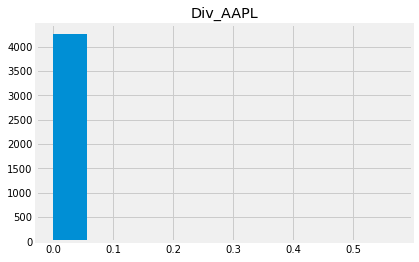

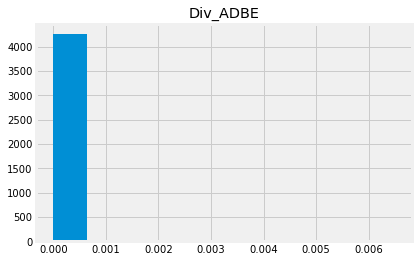

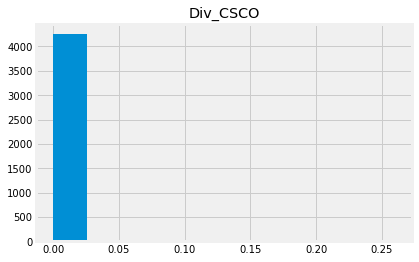

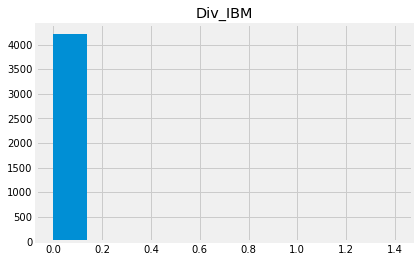

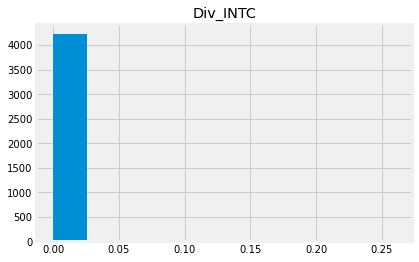

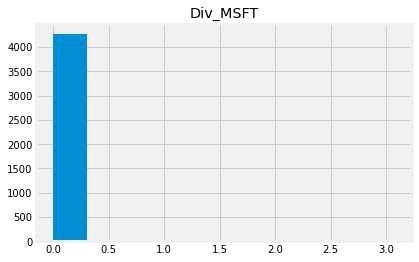

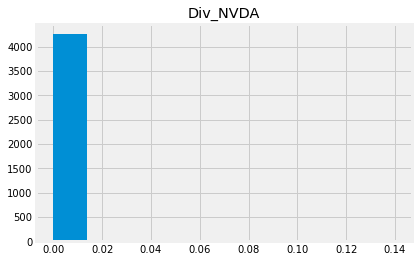

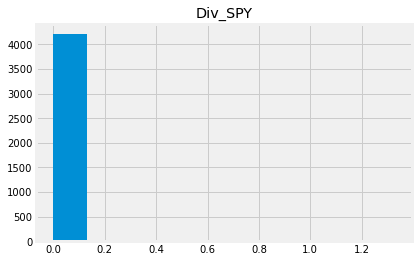

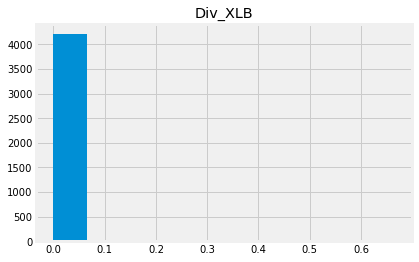

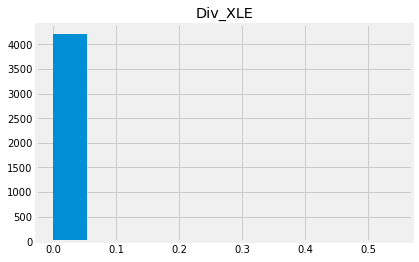

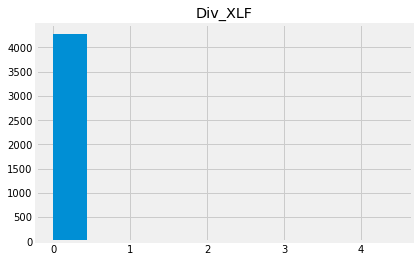

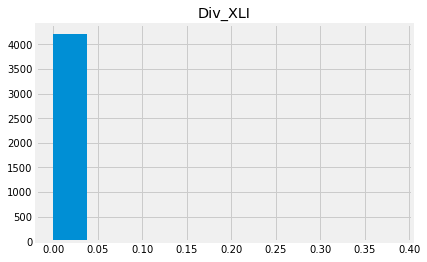

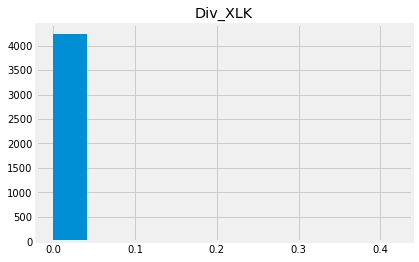

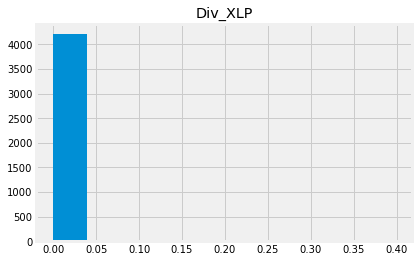

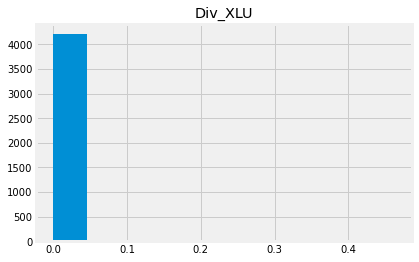

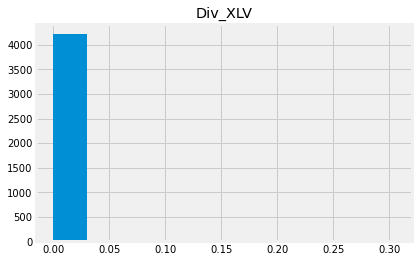

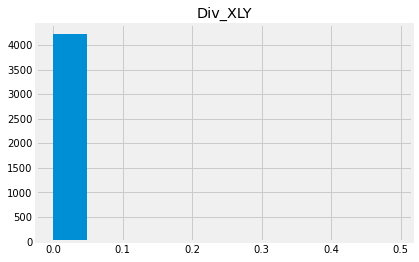

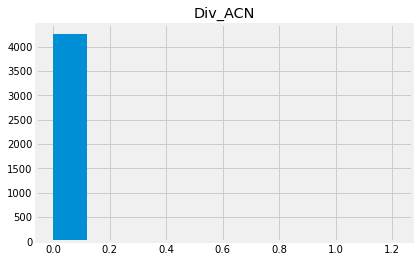

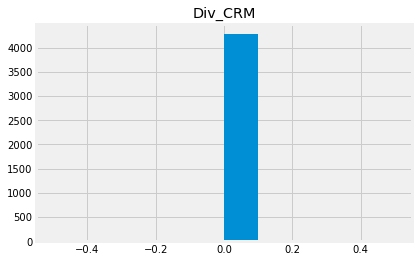

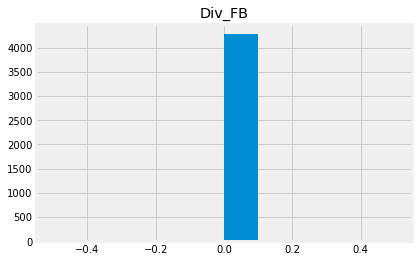

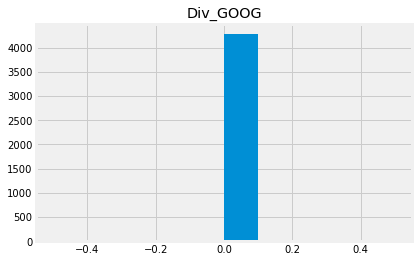

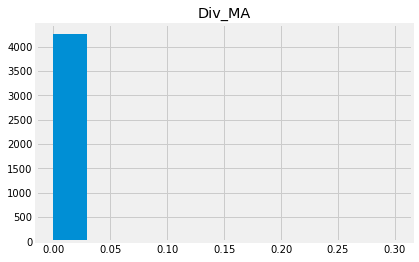

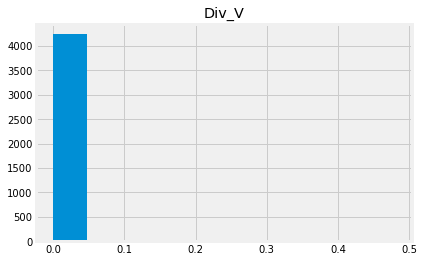

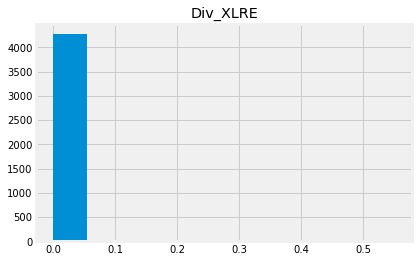

In [29]:
my_string = 'Div_'
Div_stocks_list = [my_string + str(x)  for x in stock_lists]


for i in Div_stocks_list:

    plt.figure()
    plt.title(i)
    plt.hist(X[i])

* Most value clustered around zero with a little number of nonzero value
    - We will kept these columns for now, since using the neural net they might give the improved prediction result

#### 4th we check the Spread for each stock

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_AAPL')

(array([3.321e+03, 7.360e+02, 1.530e+02, 4.600e+01, 1.400e+01, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.17 ,  6.053, 11.936, 17.819, 23.702, 29.585, 35.468, 41.351,
        47.234, 53.117, 59.   ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_ADBE')

(array([3.745e+03, 3.020e+02, 1.090e+02, 5.800e+01, 3.200e+01, 9.000e+00,
        1.000e+01, 7.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.16   ,  2.36879,  4.57758,  6.78637,  8.99516, 11.20395,
        13.41274, 15.62153, 17.83032, 20.03911, 22.2479 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_CSCO')

(array([3.895e+03, 1.620e+02, 1.120e+02, 5.300e+01, 2.800e+01, 1.100e+01,
        8.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0.06  ,  1.3227,  2.5854,  3.8481,  5.1108,  6.3735,  7.6362,
         8.8989, 10.1616, 11.4243, 12.687 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_IBM')

(array([1327., 1744.,  743.,  280.,   96.,   44.,   24.,   10.,    3.,
           4.]),
 array([ 0.35   ,  1.50885,  2.6677 ,  3.82655,  4.9854 ,  6.14425,
         7.3031 ,  8.46195,  9.6208 , 10.77965, 11.9385 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_INTC')

(array([3.283e+03, 6.240e+02, 1.950e+02, 9.400e+01, 4.700e+01, 1.700e+01,
        9.000e+00, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([0.1 , 0.84, 1.58, 2.32, 3.06, 3.8 , 4.54, 5.28, 6.02, 6.76, 7.5 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_MSFT')

(array([3.077e+03, 6.360e+02, 2.930e+02, 1.560e+02, 5.300e+01, 2.700e+01,
        2.100e+01, 6.000e+00, 5.000e+00, 1.000e+00]),
 array([0.13  , 0.9358, 1.7416, 2.5474, 3.3532, 4.159 , 4.9648, 5.7706,
        6.5764, 7.3822, 8.188 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_NVDA')

(array([3.976e+03, 2.230e+02, 5.100e+01, 1.200e+01, 6.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([ 0.1 ,  4.49,  8.88, 13.27, 17.66, 22.05, 26.44, 30.83, 35.22,
        39.61, 44.  ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_SPY')

(array([2.639e+03, 1.274e+03, 2.630e+02, 5.300e+01, 2.400e+01, 1.100e+01,
        6.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.3   ,  1.7777,  3.2554,  4.7331,  6.2108,  7.6885,  9.1662,
        10.6439, 12.1216, 13.5993, 15.077 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLB')

(array([3.129e+03, 9.450e+02, 1.450e+02, 3.600e+01, 1.200e+01, 7.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.09  , 0.6685, 1.247 , 1.8255, 2.404 , 2.9825, 3.561 , 4.1395,
        4.718 , 5.2965, 5.875 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLE')

(array([3.194e+03, 9.050e+02, 1.290e+02, 2.800e+01, 1.000e+01, 5.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.1284 ,  1.35806,  2.58772,  3.81738,  5.04704,  6.2767 ,
         7.50636,  8.73602,  9.96568, 11.19534, 12.425  ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLF')

(array([3.414e+03, 6.740e+02, 1.210e+02, 4.400e+01, 6.000e+00, 1.000e+01,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([0.0671 , 0.86929, 1.67148, 2.47367, 3.27586, 4.07805, 4.88024,
        5.68243, 6.48462, 7.28681, 8.089  ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLI')

(array([2.109e+03, 1.624e+03, 3.710e+02, 1.070e+02, 3.400e+01, 1.600e+01,
        7.000e+00, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([0.09   , 0.43002, 0.77004, 1.11006, 1.45008, 1.7901 , 2.13012,
        2.47014, 2.81016, 3.15018, 3.4902 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLK')

(array([3.805e+03, 3.390e+02, 9.700e+01, 2.600e+01, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.07   , 0.89179, 1.71358, 2.53537, 3.35716, 4.17895, 5.00074,
        5.82253, 6.64432, 7.46611, 8.2879 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLP')

(array([3.095e+03, 9.880e+02, 1.250e+02, 3.800e+01, 1.500e+01, 6.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([0.06   , 0.39193, 0.72386, 1.05579, 1.38772, 1.71965, 2.05158,
        2.38351, 2.71544, 3.04737, 3.3793 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLU')

(array([2.897e+03, 1.088e+03, 2.000e+02, 5.300e+01, 1.700e+01, 8.000e+00,
        7.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([0.12   , 0.53985, 0.9597 , 1.37955, 1.7994 , 2.21925, 2.6391 ,
        3.05895, 3.4788 , 3.89865, 4.3185 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLV')

(array([4.188e+03, 8.200e+01, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.08 ,  1.516,  2.952,  4.388,  5.824,  7.26 ,  8.696, 10.132,
        11.568, 13.004, 14.44 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLY')

(array([3.678e+03, 5.230e+02, 6.100e+01, 1.100e+01, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.1    , 0.87592, 1.65184, 2.42776, 3.20368, 3.9796 , 4.75552,
        5.53144, 6.30736, 7.08328, 7.8592 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_ACN')

(array([4.155e+03, 1.150e+02, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  2.456,  4.912,  7.368,  9.824, 12.28 , 14.736, 17.192,
        19.648, 22.104, 24.56 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_CRM')

(array([2.656e+03, 9.900e+02, 4.040e+02, 1.410e+02, 4.700e+01, 2.300e+01,
        9.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.  ,  1.62,  3.24,  4.86,  6.48,  8.1 ,  9.72, 11.34, 12.96,
        14.58, 16.2 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_FB')

(array([3.723e+03, 4.520e+02, 8.000e+01, 1.300e+01, 5.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  1.514,  3.028,  4.542,  6.056,  7.57 ,  9.084, 10.598,
        12.112, 13.626, 15.14 ]),
 <BarContainer object of 10 artists>)

<ipython-input-31-8a614d3ab4fc>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_GOOG')

(array([2.659e+03, 1.214e+03, 2.730e+02, 8.100e+01, 2.800e+01, 9.000e+00,
        6.000e+00, 3.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  5.4, 10.8, 16.2, 21.6, 27. , 32.4, 37.8, 43.2, 48.6, 54. ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_MA')

(array([3.195e+03, 8.250e+02, 1.960e+02, 3.800e+01, 1.300e+01, 6.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  5.921, 11.842, 17.763, 23.684, 29.605, 35.526, 41.447,
        47.368, 53.289, 59.21 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_V')

(array([3.506e+03, 6.570e+02, 8.200e+01, 1.700e+01, 8.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  2.391,  4.782,  7.173,  9.564, 11.955, 14.346, 16.737,
        19.128, 21.519, 23.91 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLRE')

(array([4.169e+03, 9.100e+01, 1.200e+01, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.60000e-03,  3.61260e-01,  7.26120e-01,  1.09098e+00,
         1.45584e+00,  1.82070e+00,  2.18556e+00,  2.55042e+00,
         2.91528e+00,  3.28014e+00,  3.64500e+00]),
 <BarContainer object of 10 artists>)

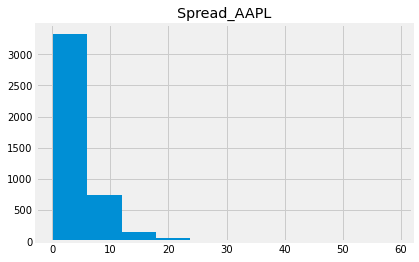

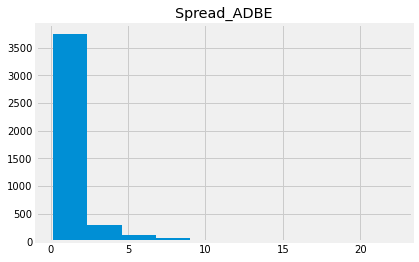

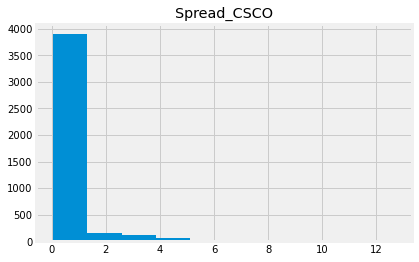

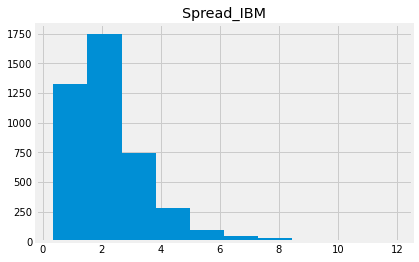

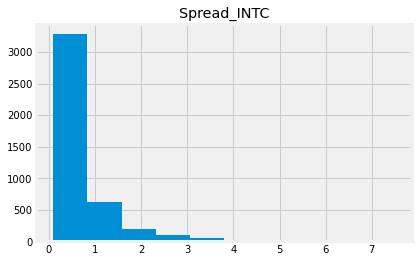

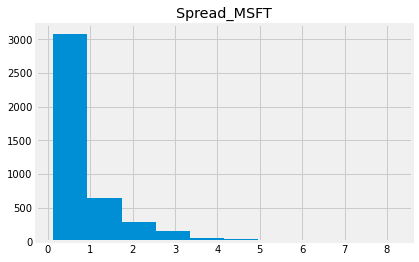

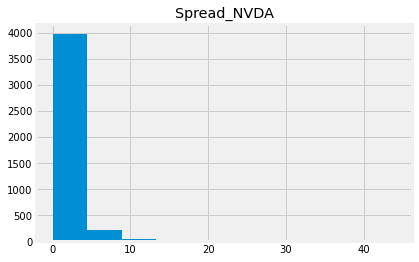

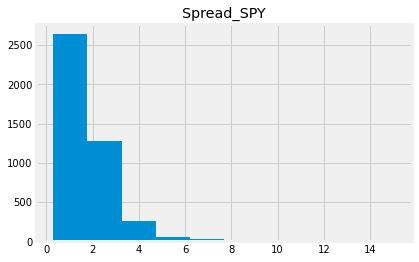

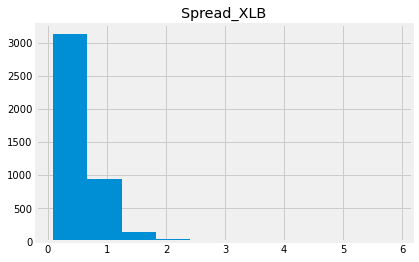

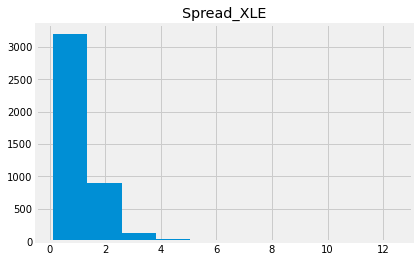

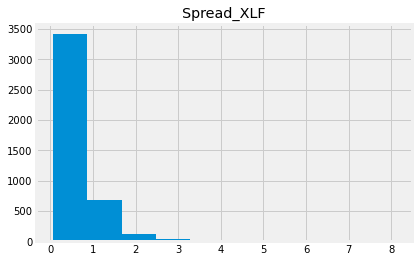

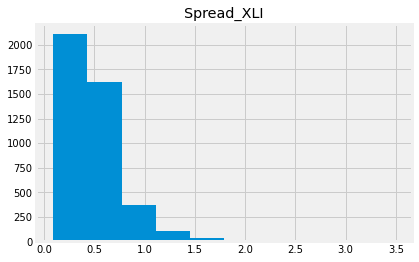

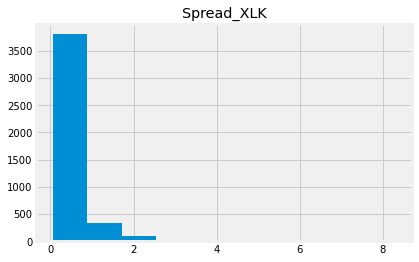

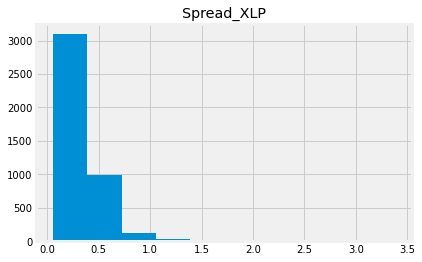

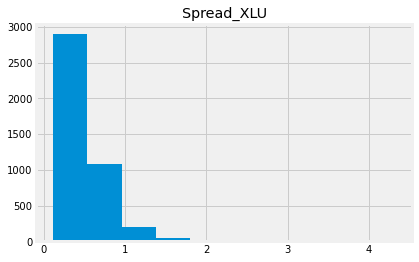

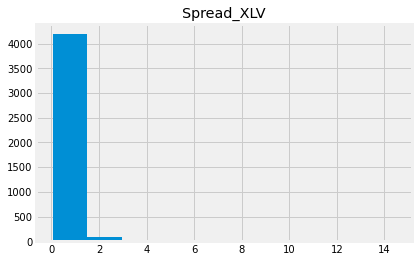

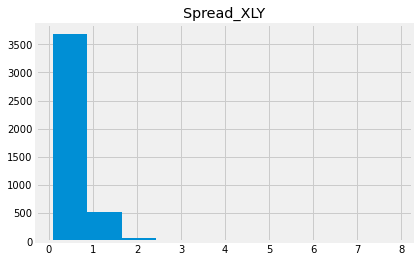

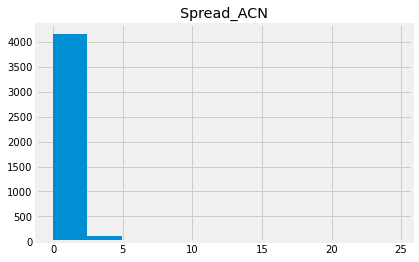

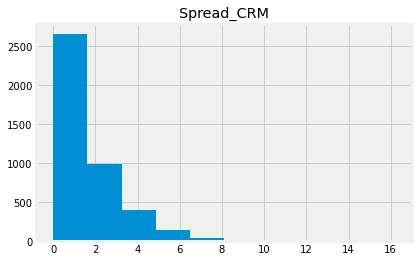

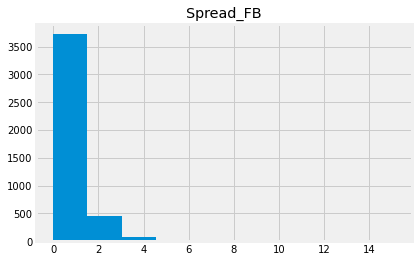

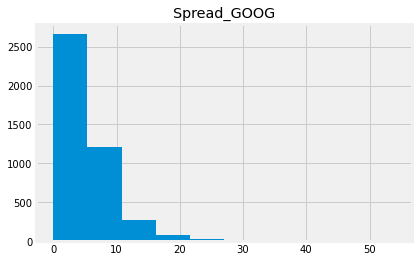

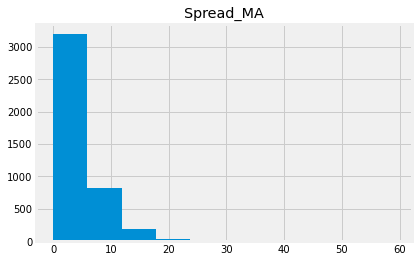

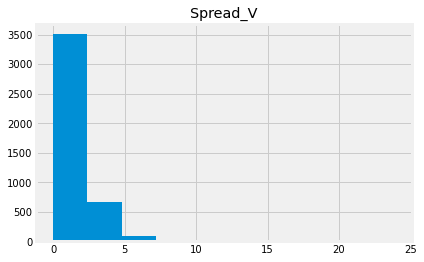

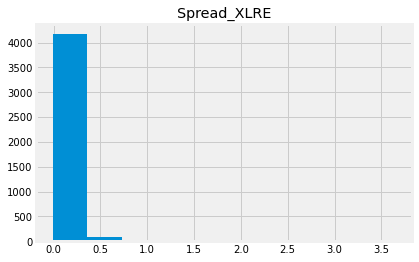

In [31]:
# normal spread
my_string = 'Spread_'
Spread_stocks_list = [my_string + str(x)  for x in stock_lists]

for i in Spread_stocks_list:

    plt.figure()
    plt.title(i)
    plt.hist(X[i])

* Most value heavy right skewed
* we check the log Volume for each stock

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_AAPL')

(array([ 24., 210., 617., 839., 785., 770., 675., 296.,  56.,   3.]),
 array([-1.76609172, -1.18172711, -0.5973625 , -0.01299789,  0.57136672,
         1.15573134,  1.74009595,  2.32446056,  2.90882517,  3.49318978,
         4.07755439]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_ADBE')

(array([   4.,  157.,  798., 1434., 1093.,  436.,  154.,  127.,   53.,
          19.]),
 array([-1.82635091, -1.33348657, -0.84062222, -0.34775787,  0.14510648,
         0.63797083,  1.13083518,  1.62369952,  2.11656387,  2.60942822,
         3.10229257]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_CSCO')

(array([   3.,   72.,  759., 1561., 1167.,  370.,  122.,  136.,   71.,
          14.]),
 array([-2.79688141, -2.26312761, -1.7293738 , -1.19561999, -0.66186618,
        -0.12811237,  0.40564143,  0.93939524,  1.47314905,  2.00690286,
         2.54065666]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_IBM')

(array([   8.,   93.,  357.,  738., 1118.,  971.,  643.,  243.,   87.,
          17.]),
 array([-1.04696906, -0.69428693, -0.3416048 ,  0.01107733,  0.36375946,
         0.71644159,  1.06912372,  1.42180585,  1.77448797,  2.1271701 ,
         2.47985223]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_INTC')

(array([  11.,  151.,  794., 1346., 1021.,  482.,  238.,  169.,   53.,
          10.]),
 array([-2.29263476, -1.86186765, -1.43110054, -1.00033343, -0.56956632,
        -0.13879921,  0.2919679 ,  0.72273501,  1.15350212,  1.58426923,
         2.01503634]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_MSFT')

(array([  51.,  382., 1003., 1063.,  720.,  387.,  355.,  221.,   69.,
          24.]),
 array([-2.03255796, -1.61902298, -1.20548801, -0.79195303, -0.37841806,
         0.03511692,  0.44865189,  0.86218687,  1.27572184,  1.68925682,
         2.10279179]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_NVDA')

(array([  45.,  504., 1223., 1251.,  568.,  321.,  233.,  103.,   21.,
           6.]),
 array([-2.29263476, -1.68495005, -1.07726534, -0.46958063,  0.13810409,
         0.7457888 ,  1.35347351,  1.96115822,  2.56884294,  3.17652765,
         3.78421236]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_SPY')

(array([  20.,  174.,  664., 1125., 1153.,  729.,  305.,   74.,   23.,
           8.]),
 array([-1.20064501, -0.80925684, -0.41786867, -0.02648049,  0.36490768,
         0.75629586,  1.14768403,  1.53907221,  1.93046038,  2.32184855,
         2.71323673]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLB')

(array([8.000e+00, 1.230e+02, 6.910e+02, 1.322e+03, 1.209e+03, 6.370e+02,
        2.150e+02, 5.300e+01, 1.600e+01, 1.000e+00]),
 array([-2.39689577, -1.98011857, -1.56334137, -1.14656416, -0.72978696,
        -0.31300976,  0.10376745,  0.52054465,  0.93732185,  1.35409906,
         1.77087626]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLE')

(array([  37.,  235.,  519.,  959., 1280.,  851.,  304.,   71.,   15.,
           4.]),
 array([-2.0448469 , -1.5883831 , -1.13191931, -0.67545551, -0.21899172,
         0.23747208,  0.69393587,  1.15039967,  1.60686346,  2.06332726,
         2.51979105]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLF')

(array([   7.,  109.,  592., 1280., 1111.,  737.,  308.,  102.,   23.,
           6.]),
 array([-2.68677807, -2.20903739, -1.73129671, -1.25355603, -0.77581535,
        -0.29807467,  0.17966601,  0.65740669,  1.13514737,  1.61288805,
         2.09062873]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLI')

(array([  21.,  116.,  536., 1078., 1208.,  861.,  313.,  108.,   27.,
           7.]),
 array([-2.39689577, -2.03218164, -1.66746751, -1.30275339, -0.93803926,
        -0.57332513, -0.208611  ,  0.15610313,  0.52081726,  0.88553139,
         1.25024552]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLK')

(array([  28.,  354., 1181., 1344.,  761.,  342.,  184.,   72.,    6.,
           3.]),
 array([-2.6450754 , -2.16907613, -1.69307687, -1.2170776 , -0.74107833,
        -0.26507907,  0.2109202 ,  0.68691947,  1.16291874,  1.638918  ,
         2.11491727]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLP')

(array([  21.,  211.,  841., 1226., 1145.,  584.,  174.,   50.,   17.,
           6.]),
 array([-2.79688141, -2.39539683, -1.99391224, -1.59242765, -1.19094306,
        -0.78945848, -0.38797389,  0.0135107 ,  0.41499529,  0.81647988,
         1.21796446]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLU')

(array([ 103.,  413., 1029., 1198.,  852.,  456.,  147.,   53.,   18.,
           6.]),
 array([-2.11196473, -1.75445429, -1.39694386, -1.03943342, -0.68192298,
        -0.32441254,  0.0330979 ,  0.39060834,  0.74811878,  1.10562922,
         1.46313965]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLV')

(array([3.500e+01, 4.530e+02, 1.499e+03, 1.397e+03, 6.350e+02, 2.090e+02,
        4.200e+01, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([-2.51330612, -1.99496837, -1.47663062, -0.95829287, -0.43995512,
         0.07838263,  0.59672038,  1.11505813,  1.63339588,  2.15173363,
         2.67007138]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLY')

(array([3.200e+01, 3.130e+02, 9.520e+02, 1.372e+03, 1.024e+03, 4.320e+02,
        1.200e+02, 2.800e+01, 1.000e+00, 1.000e+00]),
 array([-2.29263476, -1.85719008, -1.4217454 , -0.98630072, -0.55085604,
        -0.11541136,  0.32003333,  0.75547801,  1.19092269,  1.62636737,
         2.06181205]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_ACN')

(array([3.880e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 4.440e+02,
        2.395e+03, 1.011e+03, 3.300e+01, 1.000e+00]),
 array([-6.90775528, -5.89686377, -4.88597226, -3.87508075, -2.86418924,
        -1.85329773, -0.84240622,  0.16848529,  1.1793768 ,  2.19026831,
         3.20115982]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_CRM')

(array([1121.,    0.,    0.,    0.,    0.,   35.,  536., 1512.,  975.,
          96.]),
 array([-6.90775528, -5.93847245, -4.96918963, -3.9999068 , -3.03062398,
        -2.06134116, -1.09205833, -0.12277551,  0.84650732,  1.81579014,
         2.78507297]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_FB')

(array([3.113e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        1.930e+02, 7.070e+02, 2.520e+02, 7.000e+00]),
 array([-6.90775528, -5.94523912, -4.98272296, -4.02020681, -3.05769065,
        -2.09517449, -1.13265833, -0.17014218,  0.79237398,  1.75489014,
         2.7174063 ]),
 <BarContainer object of 10 artists>)

<ipython-input-34-e31ca152cfc7>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_GOOG')

(array([1161.,    0.,    0.,    0.,    0.,    0.,  142., 1612., 1263.,
          97.]),
 array([-6.90775528, -5.81807949, -4.72840371, -3.63872793, -2.54905214,
        -1.45937636, -0.36970057,  0.71997521,  1.809651  ,  2.89932678,
         3.98900256]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_MA')

(array([1606.,    0.,    0.,    0.,    0.,   64.,  722.,  941.,  905.,
          37.]),
 array([-6.90775528, -5.80886902, -4.70998276, -3.61109649, -2.51221023,
        -1.41332397, -0.31443771,  0.78444855,  1.88333481,  2.98222107,
         4.08110734]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_V')

(array([2062.,    0.,    0.,    0.,    0.,    0.,  429., 1351.,  416.,
          17.]),
 array([-6.90775528, -5.89954589, -4.8913365 , -3.88312711, -2.87491773,
        -1.86670834, -0.85849895,  0.14971044,  1.15791983,  2.16612922,
         3.1743386 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Spread_XLRE')

C:\Users\wann\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([3.98e+03, 2.00e+00, 0.00e+00, 3.00e+00, 6.00e+00, 3.00e+01,
        1.12e+02, 1.25e+02, 1.40e+01, 1.00e+00]),
 array([-6.90775528, -6.08761668, -5.26747809, -4.44733949, -3.6272009 ,
        -2.8070623 , -1.98692371, -1.16678511, -0.34664651,  0.47349208,
         1.29363068]),
 <BarContainer object of 10 artists>)

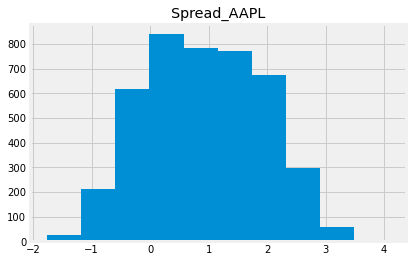

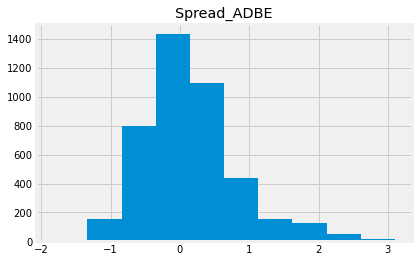

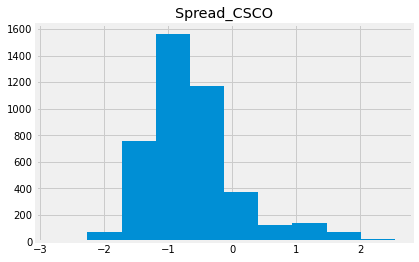

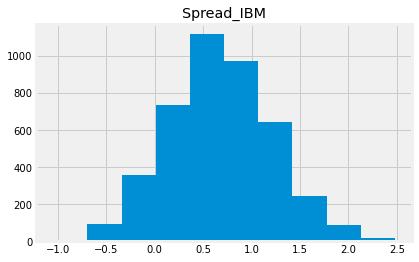

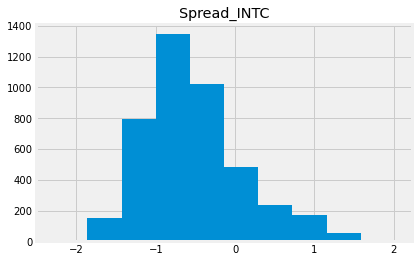

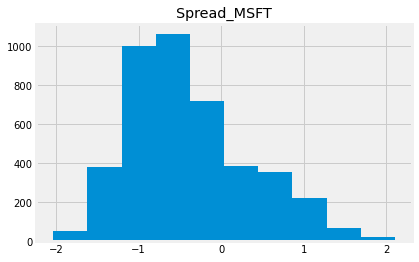

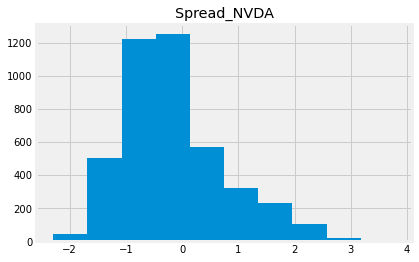

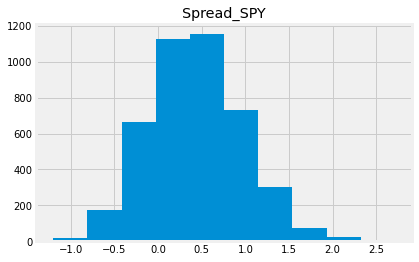

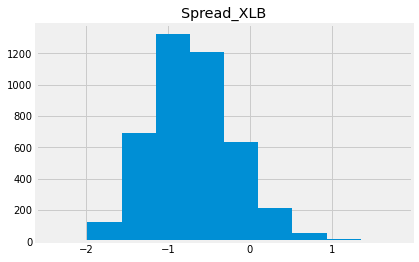

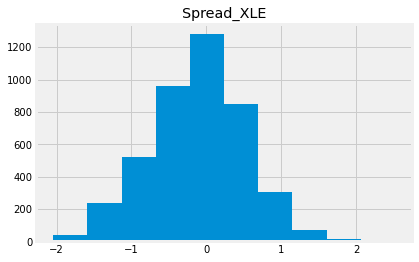

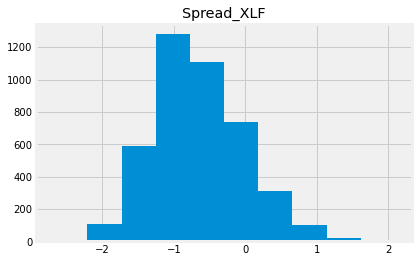

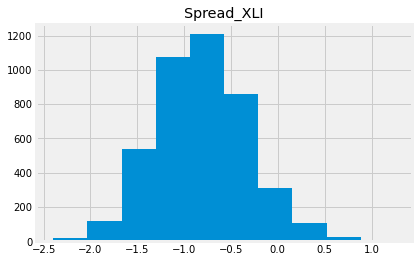

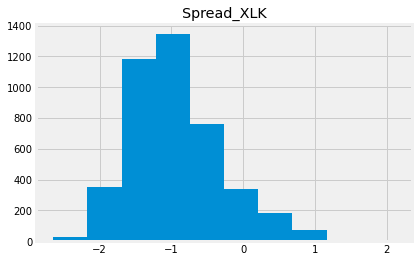

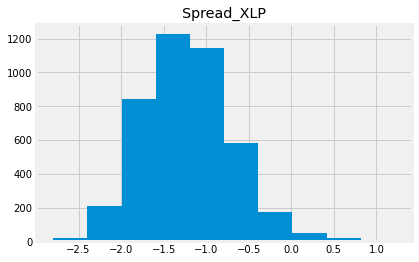

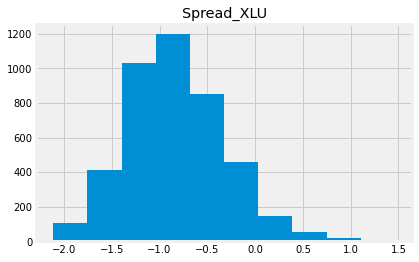

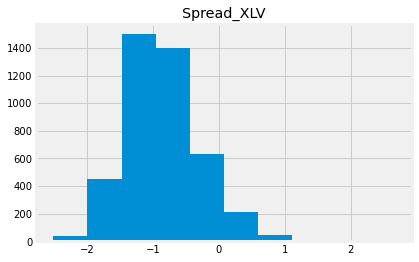

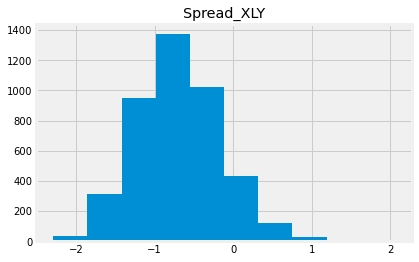

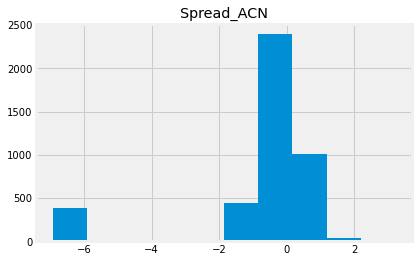

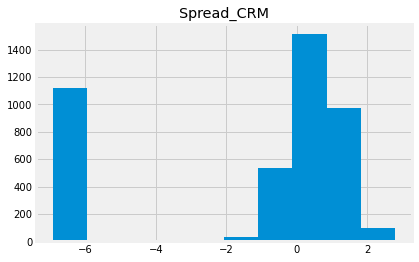

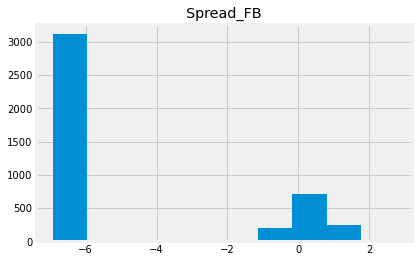

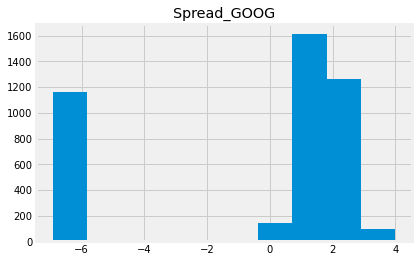

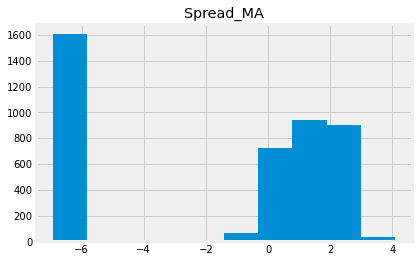

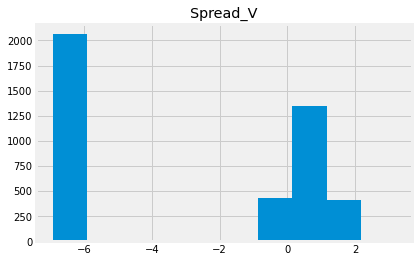

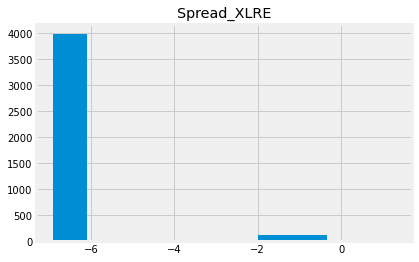

In [34]:
# log spread
my_string = 'Spread_'
Spread_stocks_list = [my_string + str(x)  for x in stock_lists]


for i in Spread_stocks_list:

    plt.figure()
    plt.title(i)
    plt.hist(np.log(X[i] +0.001))

### Conclusion From distribution check
    1. Return : Good shape
    2. Volume : right skewed (taking log)
    3. Div : Not idea shape but we kept it for now
    4. Spread : right skewed (taking log)

* Imputed NA for X columns

    * y we impute date 2000-09-28
    * X return appl we impute as date 2000-09-29
        - However , we also impute all other value as well, to be able to inline with the return appl imputation
    


In [22]:
X_filled = X.copy()
X_filled[X_filled.index == "2000-09-29"] = None
X_filled[X_filled.index == "2014-06-06"] = None
X_filled[X_filled.index == "2005-02-25"] = None
X_filled[X_filled.index == "2000-06-20"] = None


X_filled = X_filled.fillna(X_filled.rolling(10, min_periods = 1).mean())



In [23]:
X_filled[X_filled.index == "2000-09-29"]

,Adj_Close_AAPL,Return_AAPL,Volume_AAPL,Div_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Spread_AAPL,Adj_Close_ADBE,Return_ADBE,...,Low_V,Close_V,Adj_Close_XLRE,Return_XLRE,Volume_XLRE,Div_XLRE,Spread_XLRE,High_XLRE,Low_XLRE,Close_XLRE
Dt,,,,,,,,,,,,,,,,,,,,,
2000-09-29,3.438211,-0.001638,1.185822e+08,0.0,56.840589,53.104556,55.321444,3.736033,37.721167,0.022374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create Train test split
 
* y = y_filled
* X = X_filled


* Perform the train test split
    - To get the index of the datetime first 
    - Then after the data preperation we will join the data that already preperation with the datetime index

* Split data into train , test and validation set
    * stored in X_train_0 , y_train_0
    * stored in X_validation_0 , y_validation_0
    * stored in X_test_0 , y_test_0
    * The reason that stored name is _0 is because this data need preperation before putting in the model 
    
    * Ratios of train and test split is 90% 
    * Ratios of train and validation split further is 90%

## Try simple model 1st
    * Linear regression with 1 variable : lag 1 of return
    * Measure the performance and perform the error analysis

In [24]:
interest_col = "Return_AAPL"
y_filled2 = y_filled
X_filled2 = X_filled[interest_col]

In [25]:
from sklearn.model_selection import train_test_split
X_test_0, X_train_bf_0, y_test_0, y_train_bf_0 = train_test_split(X_filled2, y_filled, test_size=0.90, random_state=999)

In [26]:
X_validation_0, X_train_0, y_validation_0, y_train_0 = train_test_split(X_train_bf_0, y_train_bf_0, test_size=0.90, random_state=999)

In [27]:
# print the data shape
print("X_train_0" ,X_train_0.shape)
print("y_train_0" ,y_train_0.shape)
print("X_validation_0" ,X_validation_0.shape)
print("y_validation_0" ,y_validation_0.shape)
print("X_test_0" ,X_test_0.shape)
print("y_test_0" ,y_test_0.shape)

X_train_0 (3464,)
y_train_0 (3464,)
X_validation_0 (384,)
y_validation_0 (384,)
X_test_0 (427,)
y_test_0 (427,)


In [28]:
# create simple linear regression with lag of return as the feature
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr_model = Lr.fit(np.array(X_train_0).reshape(-1,1), y_train_0)



In [29]:
y_train_simple_predict = Lr_model.predict(np.array(X_train_0).reshape(-1,1) )
y_validation_simple_predict = Lr_model.predict(np.array(X_validation_0).reshape(-1,1) )
y_test_simple_predict = Lr_model.predict(np.array(X_test_0).reshape(-1,1))

* Measure preformance

In [30]:
# Train RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train_0 , y_train_simple_predict))

0.02562025593440017

In [31]:
# Validation RMSE
math.sqrt(mean_squared_error(y_validation_0 , y_validation_simple_predict))

0.02362630101432852

In [32]:
# TEST RMSE
math.sqrt(mean_squared_error(y_test_0 , y_test_simple_predict))

0.025875972259689465

* PLot the graph predict vs acutal

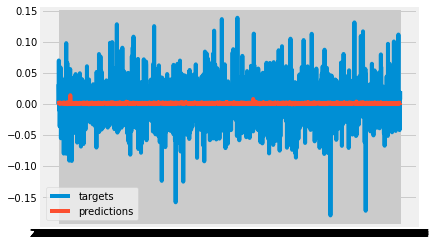

In [33]:
plt.plot(y_train_0, label = 'targets')
plt.plot(y_train_simple_predict , label="predictions")
plt.legend()
plt.show()

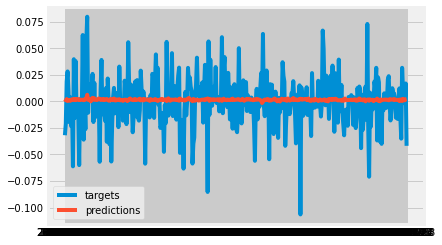

In [131]:
plt.plot(y_validation_0, label = 'targets')
plt.plot(y_validation_simple_predict , label="predictions")
plt.legend()
plt.show()

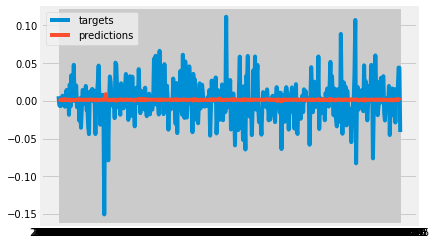

In [34]:
plt.plot(y_test_0, label = 'targets')
plt.plot(y_test_simple_predict , label="predictions")
plt.legend()
plt.show()

### Conclusion on simple model and error analysis
    * The prediction is around the mean : the model mostly predict return closed to zero
    * Average RMSE is about 0.025 2.5%
    * RMSE is pointless is the model is just predicting to the mean 
    * CLEARLY "UNDERFITTED!!!"
        - To improve the model
               - More feature is needed
               - More complex model is need

# DONE for PART 1 

## Part 2 LSTM Model with Lagged Variable
* Try more complex model with more lag of feature
        - There might be the signal accoss the long lagged
        - Try to use RNN (LSTM) model to predict the return according to the long lagged of return

* Create the scaler object for scaling the data
    - If we create the scaler model for "Y" future return AAPL
    - We also need to used that same scaler  for scaling entire dataset 
        - We cannot use the different scaler model which will result in the different transformation value
        

* Use y_train_0 : as the y for training dataset to create the standard scaler model

In [35]:
X_col = "Return_AAPL"
scaler_y = StandardScaler()
scaler_y.fit(np.array(y_train_0).reshape(-1,1))


y_scaled = pd.DataFrame( scaler_y.transform(np.array(y_filled).reshape(-1,1)) , columns = [y_col] , index = y_filled.index)
X_scaled_ret = pd.DataFrame( scaler_y.transform(np.array(X_filled[X_col]).reshape(-1,1)) , columns = [X_col] , index = X_filled.index)

print("y_scaled_shape" , y_scaled.shape)
print("X_scaled_shape" , X_scaled_ret.shape)

StandardScaler()

y_scaled_shape (4275, 1)
X_scaled_shape (4275, 1)


* Create lag column of the return AAPL
    - First we use lag = 100

In [36]:

number_of_lag = 100
col_spec = X_col


x_scaled_lagged = X_scaled_ret.copy()


for i in range(number_of_lag):
    i = i+1
    x_scaled_lagged["{z}_lag_{lg}".format(z = col_spec , lg =i)] = x_scaled_lagged[col_spec].shift(i)
    
x_scaled_lagged = x_scaled_lagged.iloc[number_of_lag:,]

In [37]:
x_scaled_lagged.head()

,Return_AAPL,Return_AAPL_lag_1,Return_AAPL_lag_2,Return_AAPL_lag_3,Return_AAPL_lag_4,Return_AAPL_lag_5,Return_AAPL_lag_6,Return_AAPL_lag_7,Return_AAPL_lag_8,Return_AAPL_lag_9,...,Return_AAPL_lag_91,Return_AAPL_lag_92,Return_AAPL_lag_93,Return_AAPL_lag_94,Return_AAPL_lag_95,Return_AAPL_lag_96,Return_AAPL_lag_97,Return_AAPL_lag_98,Return_AAPL_lag_99,Return_AAPL_lag_100
Dt,,,,,,,,,,,,,,,,,,,,,
2000-05-26,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,-2.674633,-0.300627,-1.652607,1.751371,-2.462289,...,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403,1.788546,-3.437227,0.511077,-3.350437
2000-05-30,0.476728,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,-2.674633,-0.300627,-1.652607,1.751371,...,0.925578,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403,1.788546,-3.437227,0.511077
2000-05-31,-1.647999,0.476728,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,-2.674633,-0.300627,-1.652607,...,2.480437,0.925578,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403,1.788546,-3.437227
2000-06-01,2.320989,-1.647999,0.476728,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,-2.674633,-0.300627,...,-0.811997,2.480437,0.925578,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403,1.788546
2000-06-02,1.445381,2.320989,-1.647999,0.476728,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,-2.674633,...,-1.835073,-0.811997,2.480437,0.925578,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403


* Explored the correlation between lag

In [38]:
full_scaled_lagged = y_scaled.join(x_scaled_lagged, on=None, how='inner', sort=False )

In [39]:
full_scaled_lagged.head()

,Future_Return_AAPL,Return_AAPL,Return_AAPL_lag_1,Return_AAPL_lag_2,Return_AAPL_lag_3,Return_AAPL_lag_4,Return_AAPL_lag_5,Return_AAPL_lag_6,Return_AAPL_lag_7,Return_AAPL_lag_8,...,Return_AAPL_lag_91,Return_AAPL_lag_92,Return_AAPL_lag_93,Return_AAPL_lag_94,Return_AAPL_lag_95,Return_AAPL_lag_96,Return_AAPL_lag_97,Return_AAPL_lag_98,Return_AAPL_lag_99,Return_AAPL_lag_100
Dt,,,,,,,,,,,,,,,,,,,,,
2000-05-26,0.476728,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,-2.674633,-0.300627,-1.652607,1.751371,...,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403,1.788546,-3.437227,0.511077,-3.350437
2000-05-30,-1.647999,0.476728,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,-2.674633,-0.300627,-1.652607,...,0.925578,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403,1.788546,-3.437227,0.511077
2000-05-31,2.320989,-1.647999,0.476728,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,-2.674633,-0.300627,...,2.480437,0.925578,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403,1.788546,-3.437227
2000-06-01,1.445381,2.320989,-1.647999,0.476728,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,-2.674633,...,-0.811997,2.480437,0.925578,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403,1.788546
2000-06-02,-0.587038,1.445381,2.320989,-1.647999,0.476728,-0.458483,-0.247837,0.792673,-1.849925,-1.746423,...,-1.835073,-0.811997,2.480437,0.925578,1.299907,1.427578,4.219933,-2.400290,-2.056212,-0.746403


In [40]:
full_scaled_lagged.corr()["Future_Return_AAPL"].sort_values().head(10)

Return_AAPL_lag_1    -0.032375
Return_AAPL_lag_87   -0.032338
Return_AAPL_lag_92   -0.029468
Return_AAPL_lag_41   -0.028450
Return_AAPL_lag_7    -0.025798
Return_AAPL_lag_94   -0.024872
Return_AAPL_lag_56   -0.024713
Return_AAPL_lag_98   -0.024687
Return_AAPL_lag_93   -0.024133
Return_AAPL_lag_62   -0.023507
Name: Future_Return_AAPL, dtype: float64

In [41]:
full_scaled_lagged.corr()["Future_Return_AAPL"].sort_values().tail(10)

Return_AAPL_lag_55    0.022177
Return_AAPL_lag_5     0.022743
Return_AAPL_lag_35    0.023367
Return_AAPL_lag_54    0.024343
Return_AAPL_lag_31    0.024791
Return_AAPL_lag_97    0.030798
Return_AAPL_lag_25    0.035177
Return_AAPL_lag_77    0.035394
Return_AAPL_lag_3     0.039831
Future_Return_AAPL    1.000000
Name: Future_Return_AAPL, dtype: float64

* The correlation analysis present some little correlation between each lag and the future return
    - Although this correlation might be small 
    - This machine learning model might be able to capture the extraordinary effect

### Create 1st lstm model
    * With all lagged variable as the feature
    * we need the new dataset of dataframe before putting in lstm model : X_total

In [42]:
X_scaled_ret.head()

,Return_AAPL
Dt,
2000-01-04,-3.350437
2000-01-05,0.511077
2000-01-06,-3.437227
2000-01-07,1.788546
2000-01-10,-0.746403


In [43]:
X_scaled_ret.shape

(4275, 1)

In [44]:
x_npscaled = np.array(X_scaled_ret)

n_past = 100
X_total = []

for i in range(n_past, len(x_npscaled) +1):
    X_total.append(x_npscaled[i-n_past:i , 0:x_npscaled.shape[1]])
    
X_total = np.array(X_total)


In [45]:
X_total.shape

(4176, 100, 1)

In [46]:
X_total

array([[[-3.35043728],
        [ 0.51107722],
        [-3.43722711],
        ...,
        [-1.8499251 ],
        [ 0.79267261],
        [-0.24783715]],

       [[ 0.51107722],
        [-3.43722711],
        [ 1.7885463 ],
        ...,
        [ 0.79267261],
        [-0.24783715],
        [-0.45848255]],

       [[-3.43722711],
        [ 1.7885463 ],
        [-0.74640348],
        ...,
        [-0.24783715],
        [-0.45848255],
        [ 0.47672834]],

       ...,

       [[ 0.53344595],
        [ 0.26312776],
        [ 0.09842304],
        ...,
        [-0.31672898],
        [ 0.01715844],
        [ 0.18781769]],

       [[ 0.26312776],
        [ 0.09842304],
        [-0.35053848],
        ...,
        [ 0.01715844],
        [ 0.18781769],
        [-0.22643215]],

       [[ 0.09842304],
        [-0.35053848],
        [-0.08532086],
        ...,
        [ 0.18781769],
        [-0.22643215],
        [-0.07005369]]])

In [47]:
index_list_train = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_train_0.index]
index_list_validation = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_validation_0.index]
index_list_test = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_test_0.index]

In [48]:
y_train =  y_scaled[n_past-1:].iloc[index_list_train,:]
y_validation =  y_scaled[n_past-1:].iloc[index_list_validation,:]
y_test =  y_scaled[n_past-1:].iloc[index_list_test,:]

X_train = X_total[index_list_train,]
X_validation = X_total[index_list_validation,]
X_test = X_total[index_list_test,]

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

model1 = None
model1 = Sequential()
model1.add(LSTM(128, return_sequences= True , input_shape = (n_past,X_train.shape[2])))
model1.add(Flatten())
model1.add(Dense(1,  activation = "linear"))
model1.compile(loss= 'mse' , optimizer = 'adam')

In [50]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 128)          66560     
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 12801     
Total params: 79,361
Trainable params: 79,361
Non-trainable params: 0
_________________________________________________________________


In [51]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='auto')


In [52]:
history1 = model1.fit(X_train, y_train , validation_data = (X_validation, y_validation) ,epochs = 100, batch_size = 256,verbose = 1, callbacks = early_stopping)

Epoch 1/100
14/14 [==============================] - 3s 196ms/step - loss: 0.9491 - val_loss: 0.9338
Epoch 2/100
14/14 [==============================] - 2s 168ms/step - loss: 0.9288 - val_loss: 0.9382
Epoch 3/100
14/14 [==============================] - 2s 164ms/step - loss: 0.9195 - val_loss: 0.9570
Epoch 4/100
14/14 [==============================] - 2s 170ms/step - loss: 0.9140 - val_loss: 0.9730
Epoch 5/100
14/14 [==============================] - 2s 162ms/step - loss: 0.9078 - val_loss: 0.9749
Epoch 6/100
14/14 [==============================] - 2s 157ms/step - loss: 0.9030 - val_loss: 0.9845
Epoch 7/100
14/14 [==============================] - 2s 165ms/step - loss: 0.9003 - val_loss: 0.9941
Epoch 8/100
14/14 [==============================] - 2s 167ms/step - loss: 0.8958 - val_loss: 0.9946
Epoch 9/100
14/14 [==============================] - 2s 160ms/step - loss: 0.8909 - val_loss: 0.9972
Epoch 10/100
14/14 [==============================] - 2s 164ms/step - loss: 0.8871 - val_lo

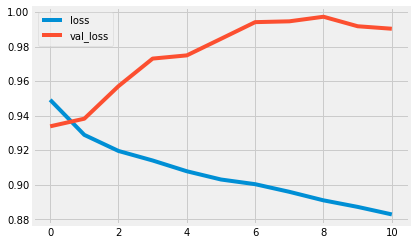

In [53]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'], label = 'loss')
plt.plot(history1.history['val_loss'], label ='val_loss')
plt.legend()


In [54]:
y_train_model1_predict = model1.predict(X_train )
y_validation_model1_predict = model1.predict(X_validation )
y_test_model1_predict = model1.predict(X_test)

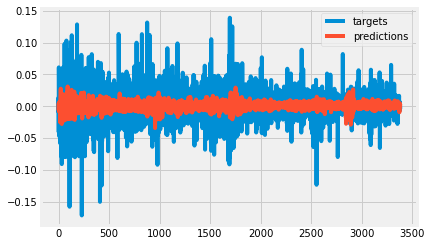

In [55]:
plt.plot(scaler_y.inverse_transform(y_train), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_train_model1_predict) , label="predictions")
plt.legend()
plt.show()

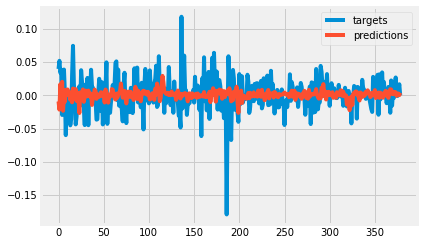

In [56]:
plt.plot(scaler_y.inverse_transform(y_validation), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_validation_model1_predict) , label="predictions")
plt.legend()
plt.show()

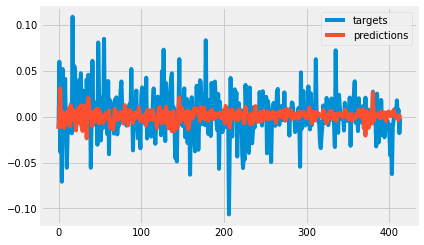

In [57]:
plt.plot(scaler_y.inverse_transform(y_test), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_test_model1_predict) , label="predictions")
plt.legend()
plt.show()

In [58]:
# Train RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_train) , scaler_y.inverse_transform(y_train_model1_predict)))

0.02393408610904813

In [59]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_validation) , scaler_y.inverse_transform(y_validation_model1_predict)))

0.025499531647388152

In [60]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_test_model1_predict)))

0.02473214772393806

#### From the simple lstm model

        - The prediction is better : more fluctuation in return prediction
        - The The average RMSE decrease by little bit => 0.024% 
        - Incerasing the number of lag with the complexity of model improve the result 
        - Next step try to tune the lstm model with different number of lag

* Create function for create lstm with different lag and node
    - Give number_of_lag function will generate lagged numpy array  
    - node : number of node in LSTM unit
    - Return the Validation RMSE

In [61]:
def create_lstm_each_lag( number_of_lag = 14 , node = 14 , verbose_lstm = 0):

    import tensorflow as tf
    from tensorflow.keras.layers import Input, LSTM , GRU , SimpleRNN , Dense , GlobalMaxPool1D , Dense
    from tensorflow.keras.models import Model , Sequential
    from tensorflow.keras.optimizers import SGD , Adam
    from tensorflow.keras.callbacks import EarlyStopping
    import math
    from sklearn.metrics import mean_squared_error
    
    x_npscaled = np.array(X_scaled_ret)

    n_past = number_of_lag
    X_total = []

    for i in range(n_past, len(x_npscaled) +1):
        X_total.append(x_npscaled[i-n_past:i , 0:x_npscaled.shape[1]])
    
    X_total = np.array(X_total)

    
    
    index_list_train = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_train_0.index]
    index_list_validation = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_validation_0.index]
    index_list_test = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_test_0.index]



    y_train =  y_scaled[n_past-1:].iloc[index_list_train,:]
    y_validation =  y_scaled[n_past-1:].iloc[index_list_validation,:]
    y_test =  y_scaled[n_past-1:].iloc[index_list_test,:]

    X_train = X_total[index_list_train,]
    X_validation = X_total[index_list_validation,]
    X_test = X_total[index_list_test,]
    
    model1 = None
    model1 = Sequential()
    model1.add(LSTM(node ,return_sequences= True , input_shape = (X_train.shape[1],1)))
    model1.add(Flatten())
    model1.add(Dense(1,activation = "linear"))
    model1.compile(loss= 'mean_squared_error' , optimizer = 'adam')


    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        min_delta=0.001, 
        mode='auto')
    

    
    
    history1 = model1.fit(X_train, y_train , validation_data = (X_validation, y_validation) ,epochs = 100, batch_size = 64,verbose = verbose_lstm, callbacks = early_stopping)
    
    
    y_validation_model1_predict = model1.predict(X_validation )

    RMSE_val = math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_validation) , scaler_y.inverse_transform(y_validation_model1_predict)))
    
    return RMSE_val

In [62]:
lag_list = [14,30,60,90,100,120,150]
node_list = [8,16,32,64,128,256]

rmse_list = []

for i in lag_list:
    for j in node_list:
        RMSE_val = create_lstm_each_lag( number_of_lag = i , node = j)
        rmse_list.append(RMSE_val)
        print("lag ",i," node ",j, " min_val_loss ",RMSE_val  )
        
print("min_val_loss_is " , np.min(np.array(rmse_list)) )

lag  14  node  8  min_val_loss  0.025019565973876123
lag  14  node  16  min_val_loss  0.02505436423407984
lag  14  node  32  min_val_loss  0.02501345606631759
lag  14  node  64  min_val_loss  0.025118865976938017
lag  14  node  128  min_val_loss  0.025288556597425703
lag  14  node  256  min_val_loss  0.02498070859787557
lag  30  node  8  min_val_loss  0.024991788314954765
lag  30  node  16  min_val_loss  0.025108364264151476
lag  30  node  32  min_val_loss  0.025185163149412014
lag  30  node  64  min_val_loss  0.025311939370962707
lag  30  node  128  min_val_loss  0.02521765225087343
lag  30  node  256  min_val_loss  0.02535654936948171
lag  60  node  8  min_val_loss  0.02513157351253858
lag  60  node  16  min_val_loss  0.025324231283564896
lag  60  node  32  min_val_loss  0.025330449933029575
lag  60  node  64  min_val_loss  0.025502131396254697
lag  60  node  128  min_val_loss  0.025722405061849776
lag  60  node  256  min_val_loss  0.025454083091055943
lag  90  node  8  min_val_loss 

* lag  150  node  8 is the best one
     - use the paramet above the create the final model for part2
     - use function create_lstm_each_lag_returnmodel( number_of_lag = 150 , node = 8 , verbose_lstm = 0)

In [63]:
def create_lstm_each_lag_returnmodel( number_of_lag = 14 , node = 14 , verbose_lstm = 0):

    import tensorflow as tf
    from tensorflow.keras.layers import Input, LSTM , GRU , SimpleRNN , Dense , GlobalMaxPool1D , Dense
    from tensorflow.keras.models import Model , Sequential
    from tensorflow.keras.optimizers import SGD , Adam
    from tensorflow.keras.callbacks import EarlyStopping
    import math
    from sklearn.metrics import mean_squared_error
    x_npscaled = np.array(X_scaled_ret)

    n_past = number_of_lag
    X_total = []

    for i in range(n_past, len(x_npscaled) +1):
        X_total.append(x_npscaled[i-n_past:i , 0:x_npscaled.shape[1]])
    
    X_total = np.array(X_total)

    
    
    index_list_train = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_train_0.index]
    index_list_validation = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_validation_0.index]
    index_list_test = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_test_0.index]



    y_train =  y_scaled[n_past-1:].iloc[index_list_train,:]
    y_validation =  y_scaled[n_past-1:].iloc[index_list_validation,:]
    y_test =  y_scaled[n_past-1:].iloc[index_list_test,:]

    X_train = X_total[index_list_train,]
    X_validation = X_total[index_list_validation,]
    X_test = X_total[index_list_test,]
    
    model1 = None
    model1 = Sequential()
    model1.add(LSTM(node ,return_sequences= True , input_shape = (X_train.shape[1],1)))
    model1.add(Flatten())
    model1.add(Dense(1,activation = "linear"))
    model1.compile(loss= 'mean_squared_error' , optimizer = 'adam')


    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        min_delta=0.001, 
        mode='auto')
    

    
    
    history1 = model1.fit(X_train, y_train , validation_data = (X_validation, y_validation) ,epochs = 100, batch_size = 64,verbose = verbose_lstm, callbacks = early_stopping)
    
    return model1 , history1 , X_train , X_validation , X_test , y_train ,  y_validation , y_test


In [64]:
model1 , history1, X_train , X_validation , X_test , y_train ,  y_validation , y_test = create_lstm_each_lag_returnmodel( number_of_lag = 150 , node = 8 , verbose_lstm = 1)

Epoch 1/100
53/53 [==============================] - 2s 35ms/step - loss: 0.9388 - val_loss: 0.9166
Epoch 2/100
53/53 [==============================] - 2s 29ms/step - loss: 0.9189 - val_loss: 0.9111
Epoch 3/100
53/53 [==============================] - 2s 28ms/step - loss: 0.9101 - val_loss: 0.9061
Epoch 4/100
53/53 [==============================] - 2s 29ms/step - loss: 0.9034 - val_loss: 0.9108
Epoch 5/100
53/53 [==============================] - 2s 28ms/step - loss: 0.8983 - val_loss: 0.9109
Epoch 6/100
53/53 [==============================] - 2s 29ms/step - loss: 0.8919 - val_loss: 0.9102
Epoch 7/100
53/53 [==============================] - 2s 29ms/step - loss: 0.8859 - val_loss: 0.9120
Epoch 8/100
53/53 [==============================] - 1s 28ms/step - loss: 0.8795 - val_loss: 0.9154
Epoch 9/100
53/53 [==============================] - 1s 26ms/step - loss: 0.8725 - val_loss: 0.9186
Epoch 10/100
53/53 [==============================] - 1s 27ms/step - loss: 0.8686 - val_loss: 0.9207

In [65]:
model1.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 150, 8)            320       
_________________________________________________________________
flatten_43 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 1201      
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [66]:
y_train_model1_predict = model1.predict(X_train )
y_validation_model1_predict = model1.predict(X_validation )
y_test_model1_predict = model1.predict(X_test)

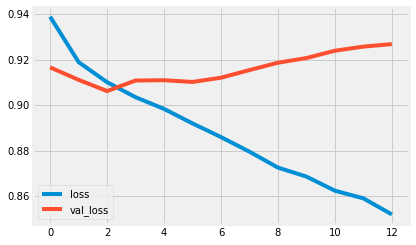

In [67]:

import matplotlib.pyplot as plt
plt.plot(history1.history['loss'], label = 'loss')
plt.plot(history1.history['val_loss'], label ='val_loss')
plt.legend()





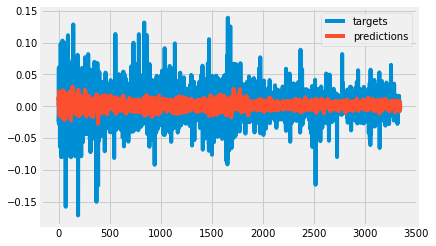

In [68]:

plt.plot(scaler_y.inverse_transform(y_train), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_train_model1_predict) , label="predictions")
plt.legend()
plt.show()

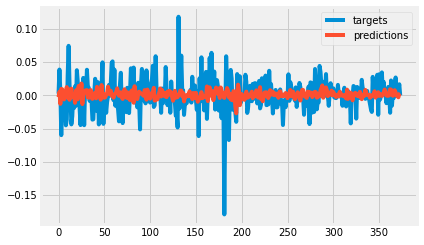

In [69]:

plt.plot(scaler_y.inverse_transform(y_validation), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_validation_model1_predict) , label="predictions")
plt.legend()
plt.show()

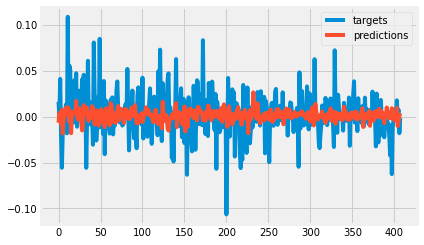

In [70]:
plt.plot(scaler_y.inverse_transform(y_test), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_test_model1_predict) , label="predictions")
plt.legend()
plt.show()

* RMSE

In [71]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_train) , scaler_y.inverse_transform(y_train_model1_predict)))

0.02344958746693633

In [72]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_validation) , scaler_y.inverse_transform(y_validation_model1_predict)))

0.02466875018987352

In [73]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test) , scaler_y.inverse_transform(y_test_model1_predict)))

0.02415756053368459

* Save model as model1_lstm_return

In [74]:
model1.save("model1_lstm_return")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model1_lstm_return\assets


## Conclusion for part 2 
    * Increase the feature (increase lag) improve the rmse
    * Increase the complexity of model by using lstm : improve rmse
    * The tuned LSTM model give Average RMSE about 0.024
        - However the RMSE not improve by much
    * We have step to the right direction however the model still cannot capture variation
    * We will increase the features by
        - Introduce other stock return
        - Introduce other stock information such as volume , Div , Spread
        - Introduce the technical analysis feature 

## DONE part 2

## PART 3 Complex model with complex feature
* In this part we will introduce more features 
    - Introduce other stock return
    - Introduce other stock information such as volume , Div , Spread
    - Introduce the technical analysis feature 

* We come back to X_filled all information

In [75]:
y_filled

Dt
2000-01-04    0.014634
2000-01-05   -0.086538
2000-01-06    0.047368
2000-01-07   -0.017588
2000-01-10   -0.051151
                ...   
2016-12-22    0.001978
2016-12-23    0.006351
2016-12-27   -0.004264
2016-12-28   -0.000257
2016-12-29   -0.007796
Name: Future_Return_AAPL, Length: 4275, dtype: float64

In [76]:
X_filled.head()

,Adj_Close_AAPL,Return_AAPL,Volume_AAPL,Div_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Spread_AAPL,Adj_Close_ADBE,Return_ADBE,...,Low_V,Close_V,Adj_Close_XLRE,Return_XLRE,Volume_XLRE,Div_XLRE,Spread_XLRE,High_XLRE,Low_XLRE,Close_XLRE
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.1852,-0.084315,128094400.0,0.0,110.625,101.188,102.50,9.437,14.9094,-0.083889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,3.2318,0.014634,194580400.0,0.0,110.563,103.000,104.00,7.563,15.2042,0.019763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,2.9521,-0.086538,191993200.0,0.0,107.000,95.000,95.00,12.000,15.3283,0.008163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,3.0920,0.047368,115183600.0,0.0,101.000,95.500,99.50,5.500,16.0730,0.048583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-10,3.0376,-0.017588,126266000.0,0.0,102.250,94.750,97.75,7.500,16.6936,0.038610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* From part 1 exploratory anaylsis : we need to take log to column volume spread

In [77]:
volume_col = [s for s in X_filled.columns if "Volume_" in s ]
Div_col = [s for s in X_filled.columns if "Div_" in s ]
Return_col = [s for s in X_filled.columns if "Return_" in s]
Spread_col = [s for s in X_filled.columns if "Spread_" in s and s ]


* Log volume

In [78]:
X_filled2 = X_filled.copy()
for i in volume_col:
    X_filled2[i] = np.log(X_filled2[i]+0.01)

* Log spread

In [79]:
X_filled3 = X_filled2.copy()
for i in Spread_col:
    X_filled3[i] = np.log(X_filled3[i]+0.01)

* Compure the correlation between Future_Return_AAPL and the Return , Volume , Spread and Div

In [80]:
volume_col.append("Future_Return_AAPL")
Div_col.append("Future_Return_AAPL")
Return_col.append("Future_Return_AAPL")
Spread_col.append("Future_Return_AAPL")

In [81]:
pd.DataFrame(y_filled).join(X_filled)[volume_col].corr()["Future_Return_AAPL"].sort_values()

Volume_XLI           -0.014981
Volume_XLV           -0.014834
Volume_XLY           -0.012882
Volume_XLE           -0.010129
Volume_XLU           -0.009467
Volume_XLP           -0.009396
Volume_XLB           -0.006910
Volume_CSCO          -0.005779
Volume_MA            -0.004919
Volume_XLK           -0.004429
Volume_XLF           -0.001507
Volume_XLRE          -0.000519
Volume_SPY            0.001763
Volume_CRM            0.001840
Volume_ACN            0.003009
Volume_FB             0.005544
Volume_NVDA           0.006030
Volume_MSFT           0.006876
Volume_ADBE           0.010236
Volume_INTC           0.011895
Volume_V              0.014746
Volume_AAPL           0.021133
Volume_IBM            0.024512
Volume_GOOG           0.027503
Future_Return_AAPL    1.000000
Name: Future_Return_AAPL, dtype: float64

In [82]:
pd.DataFrame(y_filled).join(X_filled)[Div_col].corr()["Future_Return_AAPL"].sort_values()

Div_INTC             -0.020969
Div_MA               -0.012320
Div_CSCO             -0.010258
Div_AAPL             -0.010086
Div_MSFT             -0.009186
Div_IBM              -0.007044
Div_ACN              -0.002640
Div_XLRE             -0.000063
Div_XLF               0.002752
Div_NVDA              0.003349
Div_V                 0.005398
Div_XLK               0.007014
Div_XLB               0.018748
Div_XLV               0.020499
Div_XLI               0.022773
Div_XLY               0.022920
Div_XLP               0.023966
Div_SPY               0.025762
Div_XLU               0.028117
Div_XLE               0.029067
Div_ADBE              0.042674
Future_Return_AAPL    1.000000
Div_CRM                    NaN
Div_FB                     NaN
Div_GOOG                   NaN
Name: Future_Return_AAPL, dtype: float64

In [83]:
pd.DataFrame(y_filled).join(X_filled)[Return_col].corr()["Future_Return_AAPL"].sort_values()

Return_XLV           -0.059967
Return_XLI           -0.048679
Return_XLU           -0.048003
Return_SPY           -0.043226
Return_ACN           -0.040470
Return_XLP           -0.039411
Return_XLF           -0.037482
Return_XLB           -0.037007
Return_MA            -0.027535
Return_XLE           -0.023098
Return_XLK           -0.019333
Return_CRM           -0.019296
Return_AAPL          -0.019262
Return_MSFT          -0.018645
Return_ADBE          -0.014562
Return_XLY           -0.013852
Return_CSCO          -0.010758
Return_NVDA          -0.009090
Return_XLRE          -0.005179
Return_GOOG          -0.004380
Return_FB            -0.003596
Return_INTC          -0.001555
Return_V             -0.000442
Return_IBM            0.007105
Future_Return_AAPL    1.000000
Name: Future_Return_AAPL, dtype: float64

In [84]:
pd.DataFrame(y_filled).join(X_filled)[Spread_col].corr()["Future_Return_AAPL"].sort_values()

Spread_XLP           -0.022517
Spread_ACN           -0.020607
Spread_ADBE          -0.020390
Spread_CRM           -0.014823
Spread_MA            -0.013675
Spread_XLE           -0.013117
Spread_FB            -0.010669
Spread_GOOG          -0.009857
Spread_XLU           -0.009273
Spread_NVDA          -0.007265
Spread_AAPL          -0.006331
Spread_XLV           -0.005443
Spread_V             -0.003688
Spread_XLF           -0.002432
Spread_INTC          -0.002073
Spread_MSFT          -0.001283
Spread_XLRE          -0.000503
Spread_XLY            0.000857
Spread_XLI            0.001316
Spread_IBM            0.002872
Spread_SPY            0.004235
Spread_CSCO           0.005452
Spread_XLB            0.007183
Spread_XLK            0.009707
Future_Return_AAPL    1.000000
Name: Future_Return_AAPL, dtype: float64

* The signal of these features still have very low correlation but we will work with them

### Create techincal analysis feature
* ASSUMPTION: Investor make the decision based on technical indicator 
    - These indicator might give us some signal
    - We create 
            * SMA : simple moving average (for trend and support/resistance indicator) 
            * EMA : Exponential weighted moving average (for trend and support/resistance indicator) 
            * MACD : Moving Average convergence Divergence (for trend indicator) 
            * RSI : Relative strength index (for reversion indicator) 
            * BBANDS : Bollinger Band (for reversion and support/resistance indicator) 
            * CCI : commodity channel index (for reversion indicator) 
            * Force Index
     - Note that we will used the X_filled dataframe for creating technical indicator
             - Since X_filled3 come with log volume which is not the real input of these indicator
             - X_filled (not transfrom the log yet) 
     - These indicator we will create for every individual stock that we have 

In [85]:
df_for_technical = X_filled.copy()

In [86]:
def SMA(data, period=30 , column= "Adj_Close_AAPL"):
    return data[column].rolling(window=period).mean()

# ema
def EMA(data,period = 20, column="Adj_Close_AAPL"):
    return data[column].ewm(span = period, adjust = False ).mean()



# create macd 
def MACD(data ,period_long = 26, period_short = 12, period_signal = 9 , column = "Adj_Close_AAPL"):
    # short term ema 
    Short_EMA = EMA(data, period_short,column = column)
    # long ema
    LongEMA = EMA(data, period_long,column=column)
    # calculate the macd
    data['MACD'] = Short_EMA - LongEMA
    # calculate signal line
    data['Signal_Line'] = EMA(data , period_signal,column = 'MACD')
    
    return data



# create rsi 
def RSI(data, period = 14 , column = "Adj_Close_AAPL"):
    delta = data[column].diff(1)
    delta = delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up <0 ] = 0
    down[down>0] = 0
    data['up'] = up
    data['down'] = down
    AVG_Gain = SMA(data , period,column="up")
    AVG_Loss = abs(SMA(data, period,column = "down"))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0-(100.0/1.0+ RS)
    
    data['RSI'] = RSI
    
    return data

In [87]:

# Compute the Bollinger Bands 
def BBANDS(data, n=14 , column = "Adj_Close_AAPL"):
    MA = data[column].rolling(window=n).mean()
    SD = data[column].rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data



def CCI(data, ndays= 14, close_col = "Close_AAPL"   , high_col = 'High_AAPL', low_col =  'Low_AAPL'): 
    TP = (data[high_col] + data[low_col] + data[close_col]) / 3 
    CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std()),
                    name = 'CCI') 
    data = data.join(CCI) 
    return data


def ROC(data,n=14 , Close_col = "Adj_Close_AAPL" ):
 N = data[Close_col].diff(n)
 D = data[Close_col].shift(n)
 ROC = pd.Series(N/D,name='Rate_of_Change')
 data = data.join(ROC)
 return data 

def ForceIndex(data, ndays=14 , Close_col = "Adj_Close_AAPL" , Volume_col = "Volume_AAPL"): 
    FI = pd.Series(data[Close_col].diff(ndays) * data[Volume_col], name = 'ForceIndex') 
    data = data.join(FI) 
    return data

* For each technical analysis feature 
    * we will create for day = 5,14,21,50,100


In [88]:
for i in stock_lists:
    adj_close_name = "Adj_Close_{qa}".format(qa = i)
    close_name = "Close_{qa}".format(qa = i)
    high_name = "High_{qa}".format(qa = i)
    low_name = "Adj_Close_{qa}".format(qa = i)
    volume_name = "Volume_{qa}".format(qa = i)
    
    df_for_technical["MACD_{qa}".format(qa = i)] = MACD(df_for_technical, column= adj_close_name)["MACD"]
    df_for_technical["Signal_line_{qa}".format(qa = i)] = MACD(df_for_technical, column= adj_close_name)["Signal_Line"]
    
    df_for_technical["EMA_5_{qa}".format(qa = i)] = EMA(df_for_technical, column= adj_close_name, period=5)
    df_for_technical["EMA_14_{qa}".format(qa = i)] = EMA(df_for_technical, column= adj_close_name , period=14)
    df_for_technical["EMA_21_{qa}".format(qa = i)] = EMA(df_for_technical, column= adj_close_name , period=21)
    df_for_technical["EMA_50_{qa}".format(qa = i)] = EMA(df_for_technical, column= adj_close_name , period=50)
    df_for_technical["EMA_100_{qa}".format(qa = i)] = EMA(df_for_technical, column= adj_close_name , period=100)

    
    df_for_technical["UpperBB_5_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 5)["UpperBB"]
    df_for_technical["LowerBB_5_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 5)["LowerBB"]
    df_for_technical["CCI_5_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 5)["CCI"]
    df_for_technical["ForceIndex_5_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  adj_close_name, Volume_col =volume_name , ndays = 5)["ForceIndex"]
    df_for_technical["RSI_5_{qa}".format(qa = i)] = RSI(df_for_technical, column =  adj_close_name,  period = 5)["RSI"]
    
    df_for_technical["UpperBB_14_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 14)["UpperBB"]
    df_for_technical["LowerBB_14_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 14)["LowerBB"]
    df_for_technical["CCI_14_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 14)["CCI"]
    df_for_technical["ForceIndex_14_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  adj_close_name, Volume_col =volume_name , ndays = 14)["ForceIndex"]
    df_for_technical["RSI_14_{qa}".format(qa = i)] = RSI(df_for_technical, column =  adj_close_name,  period = 14)["RSI"]

    df_for_technical["UpperBB_21_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 21)["UpperBB"]
    df_for_technical["LowerBB_21_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 21)["LowerBB"]
    df_for_technical["CCI_21_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 21)["CCI"]
    df_for_technical["ForceIndex_21_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  adj_close_name, Volume_col =volume_name , ndays = 21)["ForceIndex"]
    df_for_technical["RSI_21_{qa}".format(qa = i)] = RSI(df_for_technical, column =  adj_close_name,  period = 21)["RSI"]

    df_for_technical["UpperBB_50_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 50)["UpperBB"]
    df_for_technical["LowerBB_50_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 50)["LowerBB"]
    df_for_technical["CCI_50_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 50)["CCI"]
    df_for_technical["ForceIndex_50_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  adj_close_name, Volume_col =volume_name , ndays = 50)["ForceIndex"]
    df_for_technical["RSI_50_{qa}".format(qa = i)] = RSI(df_for_technical, column =  adj_close_name,  period = 50)["RSI"]

    df_for_technical["UpperBB_100_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 100)["UpperBB"]
    df_for_technical["LowerBB_100_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 100)["LowerBB"]
    df_for_technical["CCI_100_{qa}".format(qa = i)] = CCI(df_for_technical ,close_col = close_name   , high_col = high_name, low_col =  low_name, ndays = 100)["CCI"]
    df_for_technical["ForceIndex_100_{qa}".format(qa = i)] = ForceIndex(df_for_technical,Close_col =  adj_close_name, Volume_col =volume_name , ndays = 100)["ForceIndex"]
    df_for_technical["RSI_100_{qa}".format(qa = i)] = RSI(df_for_technical, column =  adj_close_name,  period = 100)["RSI"]


In [89]:
df_for_technical.head()

,Adj_Close_AAPL,Return_AAPL,Volume_AAPL,Div_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Spread_AAPL,Adj_Close_ADBE,Return_ADBE,...,UpperBB_50_XLRE,LowerBB_50_XLRE,CCI_50_XLRE,ForceIndex_50_XLRE,RSI_50_XLRE,UpperBB_100_XLRE,LowerBB_100_XLRE,CCI_100_XLRE,ForceIndex_100_XLRE,RSI_100_XLRE
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.1852,-0.084315,128094400.0,0.0,110.625,101.188,102.50,9.437,14.9094,-0.083889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3.2318,0.014634,194580400.0,0.0,110.563,103.000,104.00,7.563,15.2042,0.019763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,2.9521,-0.086538,191993200.0,0.0,107.000,95.000,95.00,12.000,15.3283,0.008163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3.0920,0.047368,115183600.0,0.0,101.000,95.500,99.50,5.500,16.0730,0.048583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,3.0376,-0.017588,126266000.0,0.0,102.250,94.750,97.75,7.500,16.6936,0.038610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We get dataframe with 967 columns

* The data transfromation is not finish yet
    * There are some nans and -inf from late IPO stocks 
    * The volume and spread columns are not in log form yet
 
    
    TRANSFROM THEM!!

In [90]:
df_for_technical2 =  df_for_technical.fillna(0).replace([np.inf, -np.inf], 0)
X_filled_tech = df_for_technical2.copy()

volume_col = [s for s in X_filled.columns if "Volume_" in s ]
Div_col = [s for s in X_filled.columns if "Div_" in s ]
Return_col = [s for s in X_filled.columns if "Return_" in s]
Spread_col = [s for s in X_filled.columns if "Spread_" in s and s ]



for i in volume_col:
    X_filled_tech.loc[:,i] =  np.log(X_filled_tech.loc[:,i]+ 0.01)
    
for i in Spread_col:
    X_filled_tech.loc[:,i] =  np.log(X_filled_tech.loc[:,i]+ 0.01)

* Delete Unnessecary columns
* These columns will not be putting in the model
    - save as no_used_col

In [91]:
AAPL_col = ['Adj_Close_AAPL','Return_AAPL','Volume_AAPL','Div_AAPL','High_AAPL','Low_AAPL','Close_AAPL']

High_col = [s for s in X_filled.columns if "High_" in s not in AAPL_col]
Adj_close_col = [s for s in X_filled.columns if "Adj_Close_" in s not in AAPL_col]
Low_col = [s for s in X_filled.columns if "Low_" in s and s not in AAPL_col]
Close_col = [s for s in X_filled.columns if "Close_" in s and s not in AAPL_col]

no_used_col = High_col+ Adj_close_col+ Low_col+ Close_col
used_col = [i for i in X_filled_tech.columns if i not in no_used_col]

In [92]:
no_used_col

['High_ADBE',
 'High_CSCO',
 'High_IBM',
 'High_INTC',
 'High_MSFT',
 'High_NVDA',
 'High_SPY',
 'High_XLB',
 'High_XLE',
 'High_XLF',
 'High_XLI',
 'High_XLK',
 'High_XLP',
 'High_XLU',
 'High_XLV',
 'High_XLY',
 'High_ACN',
 'High_CRM',
 'High_FB',
 'High_GOOG',
 'High_MA',
 'High_V',
 'High_XLRE',
 'Adj_Close_ADBE',
 'Adj_Close_CSCO',
 'Adj_Close_IBM',
 'Adj_Close_INTC',
 'Adj_Close_MSFT',
 'Adj_Close_NVDA',
 'Adj_Close_SPY',
 'Adj_Close_XLB',
 'Adj_Close_XLE',
 'Adj_Close_XLF',
 'Adj_Close_XLI',
 'Adj_Close_XLK',
 'Adj_Close_XLP',
 'Adj_Close_XLU',
 'Adj_Close_XLV',
 'Adj_Close_XLY',
 'Adj_Close_ACN',
 'Adj_Close_CRM',
 'Adj_Close_FB',
 'Adj_Close_GOOG',
 'Adj_Close_MA',
 'Adj_Close_V',
 'Adj_Close_XLRE',
 'Low_ADBE',
 'Low_CSCO',
 'Low_IBM',
 'Low_INTC',
 'Low_MSFT',
 'Low_NVDA',
 'Low_SPY',
 'Low_XLB',
 'Low_XLE',
 'Low_XLF',
 'Low_XLI',
 'Low_XLK',
 'Low_XLP',
 'Low_XLU',
 'Low_XLV',
 'Low_XLY',
 'Low_ACN',
 'Low_CRM',
 'Low_FB',
 'Low_GOOG',
 'Low_MA',
 'Low_V',
 'Low_XLRE',
 '

In [93]:
used_col 

['Adj_Close_AAPL',
 'Return_AAPL',
 'Volume_AAPL',
 'Div_AAPL',
 'High_AAPL',
 'Low_AAPL',
 'Close_AAPL',
 'Spread_AAPL',
 'Return_ADBE',
 'Volume_ADBE',
 'Div_ADBE',
 'Spread_ADBE',
 'Return_CSCO',
 'Volume_CSCO',
 'Div_CSCO',
 'Spread_CSCO',
 'Return_IBM',
 'Volume_IBM',
 'Div_IBM',
 'Spread_IBM',
 'Return_INTC',
 'Volume_INTC',
 'Div_INTC',
 'Spread_INTC',
 'Return_MSFT',
 'Volume_MSFT',
 'Div_MSFT',
 'Spread_MSFT',
 'Return_NVDA',
 'Volume_NVDA',
 'Div_NVDA',
 'Spread_NVDA',
 'Return_SPY',
 'Volume_SPY',
 'Div_SPY',
 'Spread_SPY',
 'Return_XLB',
 'Volume_XLB',
 'Div_XLB',
 'Spread_XLB',
 'Return_XLE',
 'Volume_XLE',
 'Div_XLE',
 'Spread_XLE',
 'Return_XLF',
 'Volume_XLF',
 'Div_XLF',
 'Spread_XLF',
 'Return_XLI',
 'Volume_XLI',
 'Div_XLI',
 'Spread_XLI',
 'Return_XLK',
 'Volume_XLK',
 'Div_XLK',
 'Spread_XLK',
 'Return_XLP',
 'Volume_XLP',
 'Div_XLP',
 'Spread_XLP',
 'Return_XLU',
 'Volume_XLU',
 'Div_XLU',
 'Spread_XLU',
 'Return_XLV',
 'Volume_XLV',
 'Div_XLV',
 'Spread_XLV',
 'R

In [94]:
X_filled_tech2 = X_filled_tech[used_col]
X_filled_tech2.head()

,Adj_Close_AAPL,Return_AAPL,Volume_AAPL,Div_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Spread_AAPL,Return_ADBE,Volume_ADBE,...,UpperBB_50_XLRE,LowerBB_50_XLRE,CCI_50_XLRE,ForceIndex_50_XLRE,RSI_50_XLRE,UpperBB_100_XLRE,LowerBB_100_XLRE,CCI_100_XLRE,ForceIndex_100_XLRE,RSI_100_XLRE
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.1852,-0.084315,18.668278,0.0,110.625,101.188,102.50,2.245697,-0.083889,15.871325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,3.2318,0.014634,19.086356,0.0,110.563,103.000,104.00,2.024589,0.019763,16.518696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,2.9521,-0.086538,19.072971,0.0,107.000,95.000,95.00,2.485740,0.008163,16.139975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,3.0920,0.047368,18.562038,0.0,101.000,95.500,99.50,1.706565,0.048583,15.926112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-10,3.0376,-0.017588,18.653901,0.0,102.250,94.750,97.75,2.016235,0.038610,16.212242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Scaling the data
    - The return AAPL colum use the same scaler as y
    - The other columns used thier own scaler
    - save the scaled data as "X_allcol_scaled"

In [95]:
X_col = "Return_AAPL"
y_scaled = pd.DataFrame( scaler_y.transform(np.array(y_filled).reshape(-1,1)) , columns = [y_col] , index = y_filled.index)
x_scaled_ret = pd.DataFrame( scaler_y.transform(np.array(X_filled_tech2[X_col]).reshape(-1,1)) , columns = [X_col] , index = X_filled_tech2.index)

col_no_ret = [i for i in X_filled_tech2.columns if i not in [X_col]]

X_noscaled_noret = X_filled_tech2.loc[:,col_no_ret]

In [96]:
X_train_no_scaled_no_ret = X_noscaled_noret.join(X_train_0, on=None, how='inner', sort=False ,rsuffix='_ori')[X_noscaled_noret.columns]

scaler_x = StandardScaler()
scaler_x.fit(np.array(X_train_no_scaled_no_ret))

x_noret_scaled = pd.DataFrame( scaler_x.transform(np.array(X_noscaled_noret)) , columns = X_noscaled_noret.columns , index = X_noscaled_noret.index)

X_allcol_scaled = x_scaled_ret.join(x_noret_scaled, on=None, how='inner', sort=False ).fillna(0)



StandardScaler()

In [97]:
X_allcol_scaled.head()

,Return_AAPL,Adj_Close_AAPL,Volume_AAPL,Div_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Spread_AAPL,Return_ADBE,Volume_ADBE,...,UpperBB_50_XLRE,LowerBB_50_XLRE,CCI_50_XLRE,ForceIndex_50_XLRE,RSI_50_XLRE,UpperBB_100_XLRE,LowerBB_100_XLRE,CCI_100_XLRE,ForceIndex_100_XLRE,RSI_100_XLRE
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-3.350437,-0.847046,0.327985,-0.060884,-0.352652,-0.390674,-0.391312,1.354022,-2.709582,0.725085,...,-0.284782,-0.244134,-0.033712,0.098131,0.049148,-0.282733,-0.19178,-0.116166,0.03891,0.051782
2000-01-05,0.511077,-0.845785,0.937925,-0.060884,-0.353008,-0.380102,-0.382638,1.127212,0.606606,1.823377,...,-0.284782,-0.244134,-0.033712,0.098131,0.049148,-0.282733,-0.19178,-0.116166,0.03891,0.051782
2000-01-06,-3.437227,-0.853355,0.918396,-0.060884,-0.373440,-0.426779,-0.434682,1.600254,0.235501,1.180860,...,-0.284782,-0.244134,-0.033712,0.098131,0.049148,-0.282733,-0.19178,-0.116166,0.03891,0.051782
2000-01-07,1.788546,-0.849569,0.172989,-0.060884,-0.407847,-0.423861,-0.408660,0.800987,1.528677,0.818032,...,-0.284782,-0.244134,-0.033712,0.098131,0.049148,-0.282733,-0.19178,-0.116166,0.03891,0.051782
2000-01-10,-0.746403,-0.851041,0.307010,-0.060884,-0.400678,-0.428237,-0.418780,1.118643,1.209606,1.303464,...,-0.284782,-0.244134,-0.033712,0.098131,0.049148,-0.282733,-0.19178,-0.116166,0.03891,0.051782


* Create the lagged feature for every variable
    - this is the format for putting in the lstm model
    - we also create lag feature for technical indicator as well
            - since there might be able to capture the divergent/convergent effect 
                    *which is important for trading decision
    - we will create the lag of 100 period

In [98]:

x_npscaled = np.array(X_allcol_scaled)

n_past = 100
X_total = []

for i in range(n_past, len(x_npscaled) +1):
    X_total.append(x_npscaled[i-n_past:i , 0:x_npscaled.shape[1]])
    
X_total = np.array(X_total)


In [99]:
X_total.shape

(4176, 100, 875)

* We perform the train test split

In [100]:
index_list_train = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_train_0.index]
index_list_validation = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_validation_0.index]
index_list_test = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_test_0.index]


In [101]:
y_train

,Future_Return_AAPL
Dt,
2000-08-07,-1.027155
2000-08-11,-0.571495
2000-08-14,-0.370983
2000-08-16,2.304029
2000-08-17,-1.151021
...,...
2016-12-21,-0.316729
2016-12-22,0.017158
2016-12-23,0.187818


In [102]:
y_train =  y_scaled[n_past-1:].iloc[index_list_train,:]
y_validation =  y_scaled[n_past-1:].iloc[index_list_validation,:]
y_test =  y_scaled[n_past-1:].iloc[index_list_test,:]

X_train = X_total[index_list_train,]
X_validation = X_total[index_list_validation,]
X_test = X_total[index_list_test,]


In [103]:
y_train

,Future_Return_AAPL
Dt,
2000-05-25,-0.458483
2000-05-26,0.476728
2000-05-30,-1.647999
2000-05-31,2.320989
2000-06-01,1.445381
...,...
2016-12-21,-0.316729
2016-12-22,0.017158
2016-12-23,0.187818


In [104]:
print("X_train" ,X_train.shape)
print("y_train" ,y_train.shape)
print("X_validation" ,X_validation.shape)
print("y_validation" ,y_validation.shape)
print("X_test" ,X_test.shape)
print("y_test" ,y_test.shape)

X_train (3382, 100, 875)
y_train (3382, 1)
X_validation (379, 100, 875)
y_validation (379, 1)
X_test (414, 100, 875)
y_test (414, 1)


* begin create lstm + dense model 

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [106]:


model2 = None
model2 = Sequential()
model2.add(LSTM(875, return_sequences= True , input_shape = (n_past,X_train.shape[2])))
model2.add(Flatten())
model2.add(Dense(1,  activation = "linear"))
model2.compile(loss= 'mse' , optimizer = 'adam')

In [107]:
model2.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 100, 875)          6128500   
_________________________________________________________________
flatten_44 (Flatten)         (None, 87500)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 87501     
Total params: 6,216,001
Trainable params: 6,216,001
Non-trainable params: 0
_________________________________________________________________


* Eventhough we has kind off shallow structure
    - The parameter are 6.2 Millions

In [108]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='auto')

In [109]:
history2 = model2.fit(X_train, y_train , validation_data = (X_validation, y_validation) ,epochs = 100, batch_size = 256,verbose = 1, callbacks = early_stopping)


Epoch 1/100
14/14 [==============================] - 71s 5s/step - loss: 27.0255 - val_loss: 5.6131
Epoch 2/100
14/14 [==============================] - 75s 5s/step - loss: 3.7279 - val_loss: 1.8590
Epoch 3/100
14/14 [==============================] - 76s 5s/step - loss: 1.9998 - val_loss: 1.5682
Epoch 4/100
14/14 [==============================] - 77s 6s/step - loss: 1.2266 - val_loss: 1.3033
Epoch 5/100
14/14 [==============================] - 78s 6s/step - loss: 1.0046 - val_loss: 1.2353
Epoch 6/100
14/14 [==============================] - 79s 6s/step - loss: 0.8398 - val_loss: 1.0978
Epoch 7/100
14/14 [==============================] - 80s 6s/step - loss: 0.7758 - val_loss: 1.1173
Epoch 8/100
14/14 [==============================] - 79s 6s/step - loss: 0.7286 - val_loss: 1.1663
Epoch 9/100
14/14 [==============================] - 78s 6s/step - loss: 0.7118 - val_loss: 1.1723
Epoch 10/100
14/14 [==============================] - 81s 6s/step - loss: 0.6928 - val_loss: 1.1839
Epoch 11

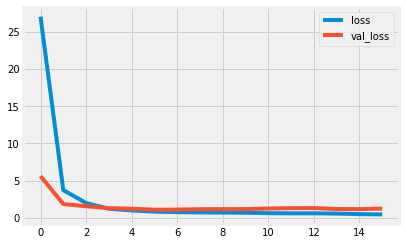

In [118]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label ='val_loss')
plt.legend()

In [119]:
y_train_model2_predict = model2.predict(X_train )
y_validation_model2_predict = model2.predict(X_validation )
y_test_model2_predict = model2.predict(X_test)


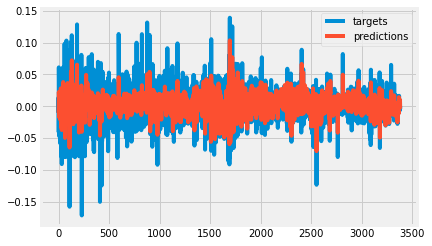

In [120]:
plt.plot(scaler_y.inverse_transform(y_train), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_train_model2_predict) , label="predictions")
plt.legend()
plt.show()

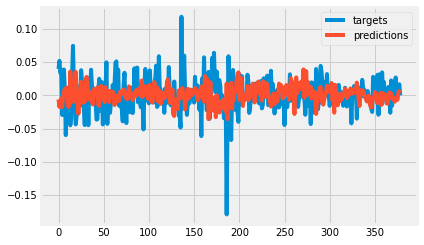

In [121]:
plt.plot(scaler_y.inverse_transform(y_validation), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_validation_model2_predict) , label="predictions")
plt.legend()
plt.show()

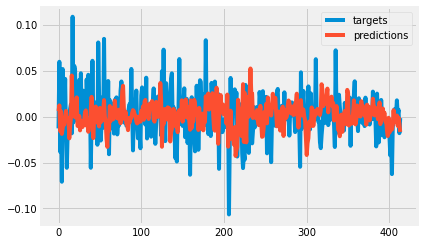

In [122]:
plt.plot(scaler_y.inverse_transform(y_test), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_test_model2_predict) , label="predictions")
plt.legend()
plt.show()

In [123]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_train) , scaler_y.inverse_transform(y_train_model2_predict)))

0.016692226835705395

In [124]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_validation) , scaler_y.inverse_transform(y_validation_model2_predict)))

0.028653498464988027

In [117]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test) , scaler_y.inverse_transform(y_test_model2_predict)))

0.027587575918049032

* We can see that the newer model has higher validation rmse, higher test rmse

        - eventhough much lower train rmse
        - this might caused by overfitting problem
        - since the orignal dataset has 875 * 100 = 87,500 feature 
        - Which much more than 3k training example

* We create the pipeline for tuning
    * create_lstm_dense_model is the function that create both dense and lstm model
    *  With respective parameter
    * We then tune to find the best setting (lowest validation rmse)

In [125]:
def create_lstm_dense_model(lstm_node = 64 , lstm_layers =2, dense_node=64 , dense_layer=3 , verbose_l = 0):

    import math
    from sklearn.metrics import mean_squared_error
    
    model5 = None
    model5 = Sequential()
    for i in range(lstm_layers):
        lstm_node_i = np.int(np.round(lstm_node/(2**i)))
        model5.add(LSTM(lstm_node_i, return_sequences= True , input_shape = (n_past,X_train.shape[2])))
    model5.add(Flatten())
    for i in range(dense_layer):
        dense_node_i = np.int(dense_node/(2**i))
        model5.add(Dense(dense_node_i,  activation = "relu"))
        model5.add(Dropout(0.2))
    model5.add(Dense(1,  activation = "linear"))
    model5.compile(loss= 'mse' , optimizer = 'adam')
    
    early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    min_delta=0.001, 
    mode='auto')

    history5 = model5.fit(X_train, y_train , validation_data = (X_validation, y_validation) ,epochs = 100, batch_size = 256,verbose = verbose_l, callbacks = early_stopping)
    
    y_train_model5_predict = model5.predict(X_train )
    y_validation_model5_predict = model5.predict(X_validation )
    y_test_model5_predict = model5.predict(X_test)
    
    rmse1 = math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_train) , scaler_y.inverse_transform(y_train_model5_predict)))
    rmse2 = math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_validation) , scaler_y.inverse_transform(y_validation_model5_predict)))
    rmse3 = math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test) , scaler_y.inverse_transform(y_test_model5_predict)))
    
    rmse =  (rmse1 + rmse2 + rmse3)/3
    return rmse


In [128]:
rmse_list = []
lstm_node_list = [32,256,512]
lstm_layers_list = [1]
dense_node_list = [64]
dense_layer_list = [1]
for i in lstm_node_list:
    for j in lstm_layers_list:
        for v in dense_node_list:
            for k in dense_layer_list:
                rmse_mod = create_lstm_dense_model(lstm_node = i , lstm_layers =j, dense_node=v , dense_layer=k , verbose_l = 0)
                rmse_list.append(rmse_mod)
                print("lstm_node_",i,"lstm_layers_",j,"dense_node_",v,"dense_layer_",k,"rmse_",rmse_mod)
print("minrmse_avg_is", np.min(np.array(rmse_list)))

lstm_node_ 32 lstm_layers_ 1 dense_node_ 64 dense_layer_ 1 rmse_ 0.024634396177223215
lstm_node_ 256 lstm_layers_ 1 dense_node_ 64 dense_layer_ 1 rmse_ 0.024561697675071447
lstm_node_ 512 lstm_layers_ 1 dense_node_ 64 dense_layer_ 1 rmse_ 0.02452897097177309
minrmse_avg_is 0.02452897097177309


* Best tuning hyperparemeter: lstm_node_ 512 lstm_layers_ 2 dense_node_ 64 dense_layer_ 1
    - RMSE : 0.02452897097177309

In [129]:
lstm_node = 512 
lstm_layers =1
dense_node=64
dense_layer=1



model3 = None
model3 = Sequential()
for i in range(lstm_layers):
    lstm_node_i = np.int(np.round(lstm_node/(2**i)))
    model3.add(LSTM(lstm_node_i, return_sequences= True , input_shape = (n_past,X_train.shape[2])))
model3.add(Flatten())
for i in range(dense_layer):
    dense_node_i = np.int(dense_node/(2**i))
    model3.add(Dense(dense_node_i,  activation = "relu"))
    model3.add(Dropout(0.2))
model3.add(Dense(1,  activation = "linear"))
model3.compile(loss= 'mse' , optimizer = 'adam')

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='auto')

In [130]:
history3 = model3.fit(X_train, y_train , validation_data = (X_validation, y_validation) ,epochs = 100, batch_size = 256,verbose = 1, callbacks = early_stopping)

Epoch 1/100
14/14 [==============================] - 45s 3s/step - loss: 72.1191 - val_loss: 0.9309
Epoch 2/100
14/14 [==============================] - 42s 3s/step - loss: 0.9441 - val_loss: 0.9313
Epoch 3/100
14/14 [==============================] - 42s 3s/step - loss: 0.9430 - val_loss: 0.9308
Epoch 4/100
14/14 [==============================] - 42s 3s/step - loss: 0.9430 - val_loss: 0.9308
Epoch 5/100
14/14 [==============================] - 42s 3s/step - loss: 0.9430 - val_loss: 0.9308
Epoch 6/100
14/14 [==============================] - 41s 3s/step - loss: 0.9430 - val_loss: 0.9307
Epoch 7/100
14/14 [==============================] - 41s 3s/step - loss: 0.9429 - val_loss: 0.9307
Epoch 8/100
14/14 [==============================] - 41s 3s/step - loss: 0.9429 - val_loss: 0.9307
Epoch 9/100
14/14 [==============================] - 42s 3s/step - loss: 0.9429 - val_loss: 0.9307
Epoch 10/100
14/14 [==============================] - 41s 3s/step - loss: 0.9429 - val_loss: 0.9307
Epoch 11

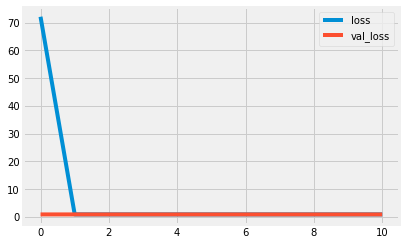

In [136]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label = 'loss')
plt.plot(history3.history['val_loss'], label ='val_loss')
plt.legend()

In [137]:
y_train_model3_predict = model3.predict(X_train )
y_validation_model3_predict = model3.predict(X_validation )
y_test_model3_predict = model3.predict(X_test)


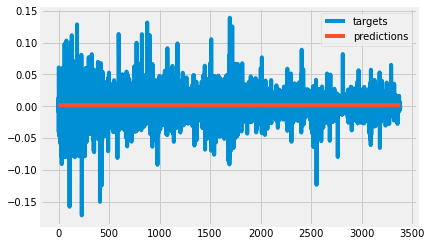

In [138]:

plt.plot(scaler_y.inverse_transform(y_train), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_train_model3_predict) , label="predictions")
plt.legend()
plt.show()

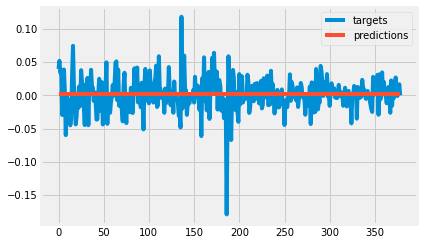

In [139]:

plt.plot(scaler_y.inverse_transform(y_validation), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_validation_model3_predict) , label="predictions")
plt.legend()
plt.show()

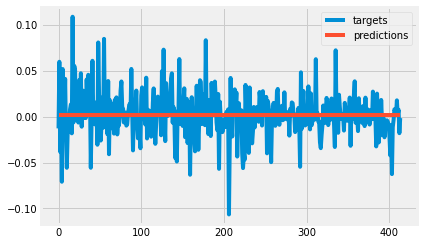

In [140]:

plt.plot(scaler_y.inverse_transform(y_test), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_test_model3_predict) , label="predictions")
plt.legend()
plt.show()

* When adding the Droping layer into tuned model
    - Model becoming underfit
    - we will used different method for reduce overfitting

### Dimension reduction 
    * Before putting into final model
    * we would like to know if the 875 columns is too much?
    * we might delete some of the columns like DIV 
    * Or PCA dimension reduction 

* Before performing dimension reduction 
    - We need to scaled the data
    - used the need to scaled only on train data : perform joining 
    - use the scaler to scaled all data
    - and perform pca

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 150)

X_train_for_pca= X_allcol_scaled.join(X_train_0, on=None, how='inner', sort=False ,rsuffix='_ori')[X_allcol_scaled.columns]

pca.fit(X_train_for_pca)
pca_X = pca.transform(X_allcol_scaled)

PCA(n_components=150)

In [148]:
pca.explained_variance_ratio_[:10].sum()

0.6303290565796187

In [149]:
pca.explained_variance_ratio_[:50].sum()

0.8331875716504451

In [150]:
pca.explained_variance_ratio_[:100].sum()

0.90817247938385

In [151]:
pca.explained_variance_ratio_[:150].sum()

0.9498312764275254

In [152]:
pca.explained_variance_ratio_.sum()

0.9714372965517262

* PCA Explained variance
- 10 PCA component : give 63% captured variation
- 50 PCA component : give 83% captured variation
- 150 PCA component : give 95% captured variation
- 100 PCA component : give 90% captured variation
- 200 PCA component : give 97% captured variation



* We will used 150 PCA component which reduce the dimension from 875 Columns -> 150 columns

In [154]:
pca_X.shape

(4275, 150)

* Create Lag variable for PCA

In [155]:

x_npscaled = pca_X

n_past = 100
X_total = []

for i in range(n_past, len(x_npscaled) +1):
    X_total.append(x_npscaled[i-n_past:i , 0:x_npscaled.shape[1]])
    
X_total = np.array(X_total)


In [156]:
X_total.shape

(4176, 100, 150)

In [157]:

index_list_train = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_train_0.index]
index_list_validation = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_validation_0.index]
index_list_test = [i for i,x  in enumerate(X_scaled_ret.index[n_past:]) if x in X_test_0.index]


y_train =  y_scaled[n_past-1:].iloc[index_list_train,:]
y_validation =  y_scaled[n_past-1:].iloc[index_list_validation,:]
y_test =  y_scaled[n_past-1:].iloc[index_list_test,:]

X_train = X_total[index_list_train,]
X_validation = X_total[index_list_validation,]
X_test = X_total[index_list_test,]


In [158]:
print("X_train" ,X_train.shape)
print("y_train" ,y_train.shape)
print("X_validation" ,X_validation.shape)
print("y_validation" ,y_validation.shape)
print("X_test" ,X_test.shape)
print("y_test" ,y_test.shape)

X_train (3382, 100, 150)
y_train (3382, 1)
X_validation (379, 100, 150)
y_validation (379, 1)
X_test (414, 100, 150)
y_test (414, 1)


In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [160]:
model4 = None
model4 = Sequential()
model4.add(LSTM(450, return_sequences= True , input_shape = (n_past,X_train.shape[2])))
model4.add(LSTM(150,return_sequences= True ))
model4.add(Flatten())
model4.add(Dense(1,  activation = "linear"))
model4.add(Dropout(0.1))
model4.compile(loss= 'mse' , optimizer = 'adam')


In [161]:
model4.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 100, 450)          1081800   
_________________________________________________________________
lstm_52 (LSTM)               (None, 100, 150)          360600    
_________________________________________________________________
flatten_51 (Flatten)         (None, 15000)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 15001     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1)                 0         
Total params: 1,457,401
Trainable params: 1,457,401
Non-trainable params: 0
_________________________________________________________________


In [162]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='auto')

In [163]:
history4 = model4.fit(X_train, y_train , validation_data = (X_validation, y_validation) ,epochs = 100, batch_size = 256,verbose = 1, callbacks = early_stopping)


Epoch 1/100
14/14 [==============================] - 26s 2s/step - loss: 1.7074 - val_loss: 0.9990
Epoch 2/100
14/14 [==============================] - 26s 2s/step - loss: 1.0781 - val_loss: 1.0542
Epoch 3/100
14/14 [==============================] - 25s 2s/step - loss: 0.9870 - val_loss: 1.1471
Epoch 4/100
14/14 [==============================] - 25s 2s/step - loss: 0.9062 - val_loss: 1.0753
Epoch 5/100
14/14 [==============================] - 25s 2s/step - loss: 0.8711 - val_loss: 1.0609
Epoch 6/100
14/14 [==============================] - 25s 2s/step - loss: 0.8393 - val_loss: 1.0824
Epoch 7/100
14/14 [==============================] - 25s 2s/step - loss: 0.8101 - val_loss: 1.0943
Epoch 8/100
14/14 [==============================] - 25s 2s/step - loss: 0.8094 - val_loss: 1.0878
Epoch 9/100
14/14 [==============================] - 25s 2s/step - loss: 0.7869 - val_loss: 1.1207
Epoch 10/100
14/14 [==============================] - 25s 2s/step - loss: 0.7675 - val_loss: 1.0997
Epoch 11/

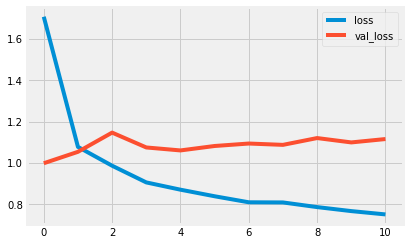

In [172]:
import matplotlib.pyplot as plt
plt.plot(history4.history['loss'], label = 'loss')
plt.plot(history4.history['val_loss'], label ='val_loss')
plt.legend()

In [173]:
y_train_model4_predict = model4.predict(X_train )
y_validation_model4_predict = model4.predict(X_validation )
y_test_model4_predict = model4.predict(X_test)

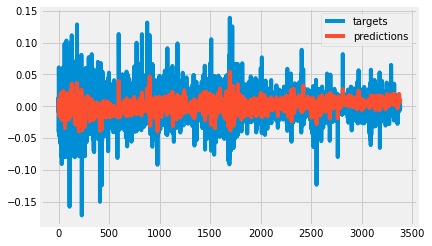

In [174]:

plt.plot(scaler_y.inverse_transform(y_train), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_train_model4_predict) , label="predictions")
plt.legend()
plt.show()

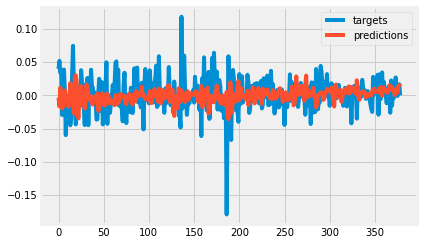

In [175]:

plt.plot(scaler_y.inverse_transform(y_validation), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_validation_model4_predict) , label="predictions")
plt.legend()
plt.show()

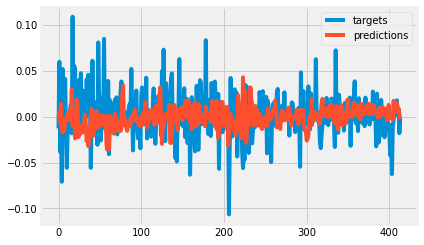

In [176]:

plt.plot(scaler_y.inverse_transform(y_test), label = 'targets')
plt.plot(scaler_y.inverse_transform(y_test_model4_predict) , label="predictions")
plt.legend()
plt.show()

In [177]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_train) , scaler_y.inverse_transform(y_train_model4_predict)))


0.02146184158774248

In [178]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_validation) , scaler_y.inverse_transform(y_validation_model4_predict)))


0.027069735637366903

In [179]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test) , scaler_y.inverse_transform(y_test_model4_predict)))

0.02781330531897125

In [181]:
# avg rmse 
(0.02146184158774248 + 0.027069735637366903 + 0.02781330531897125)/3

0.02544829418136021

* Average RMSE is about 0.025 or 2.5%
* Eventhough the RMSE is not improve 
* The fluctuation for prediction is much better than simple model
* The prediction is not just predict on the mean
* We will used this model as the final model

In [182]:
import os
from tensorflow.keras.models import load_model

modelName = "dimension_reduce_lstm_model"
model_path = os.path.join(".", modelName)

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
my_model = model4 # CHANGE None to your model !

saveModel(my_model, model_path)

Directory .\dimension_reduce_lstm_model already exists, files will be over-written.


## DONE part 3

### Conclusion 
    *We have Engineering more feature 
            - Load all stocks feature in the data path
            - Also load the Volume , Spread (high- low) , Return , and Div of every stocks
            - Create additional features : techincal analysis
                * MACD CCI RSI EMA etc
                * Each techincal indicator (asided from MACD) where created for different period parameter
                * 5 day , 14 day , 21 day , 50 day , 100 day were used
            - All of these feature we has create the lagged variable for all of them
            - Since it might capture the divergent effect of the techincal indicator (EX divergent in CCI)
            - This indicator effect were used by many traders
    * We then create the complex model using lst(875)
            - And we get the great fluctuation in prediction
            - However, the out of sample rmse is a bit higher
            - We try the tuning model by also adding dropout layers
            - The new tuned model give us underfitting result
            
    * We find the better way for reduce overfitting
            - Use the dimension reduction
            - PCA for 150 component give us 95% variation captured
            - Create PCA lagged feature
            - Putting into the model LSTM : model4
            - The rmse average is about 2.5% 
            - We will use this model for final prediction
          

#  CONCLUSION of steps

For the methodology we have done the following step


#### recipe in 4 part

#### Part 1 : First Glance exploratory analysis
    * We will create the 1st glance analysis
            -We load all stock data 1st
            -Discard the value that cause the AAPL return to distribution wrongly
            -Performing the mean rolling imputation for that value
            -Some of the columns such as volume : are heavyly right skewed (need to take the log)
            -Try simple linear regression 
                    - with only 1 feature "current return AAPL" trying to predict Y "Future return AAPL"
            * The prediction is around the mean : the model mostly predict return closed to zero
            * Average RMSE is about 0.02564 or 2.564%
            * RMSE is pointless is the model is just predicting to the mean 
            * CLEARLY "UNDERFITTED!!!"
                   - To improve the model
           - More feature is needed
           - More complex model is need
  
    * Loading stock and analysing
    * Create simple model and perform error analysis
#### Part 2 : LSTM Model with Lagged Variable
    * We create more lagged return 
            - At first we create 100 lag of return AAPL
            - And create the suitable model LSTM
            - And the model prediction more fluctuation in return and not just stick to the mean
            
            * We then Tuned the LSTM model node and the number of lagged
            * The tuned LSTM model give Average RMSE about 0.024      
            * However the RMSE not improve by much
            * We have step to the right direction however the model still cannot capture variation

#### Part 3 : Complex model with complex feature
    *We have Engineering more feature 
            - Load all stocks feature in the data path
            - Also load the Volume , Spread (high- low) , Return , and Div of every stocks
            - Create additional features : techincal analysis
                * MACD CCI RSI EMA etc
                * Each techincal indicator (asided from MACD) where created for different period parameter
                * 5 day , 14 day , 21 day , 50 day , 100 day were used
            - All of these feature we has create the lagged variable for all of them
            - Since it might capture the divergent effect of the techincal indicator (EX divergent in CCI)
            - This indicator effect were used by many traders
    * We then create the complex model using lst(875)
            - And we get the great fluctuation in prediction
            - However, the out of sample rmse is a bit higher
            - We try the tuning model by also adding dropout layers
            - The new tuned model give us underfitting result
            
    * We find the better way for reduce overfitting
            - Use the dimension reduction
            - PCA for 150 component give us 95% variation captured
            - Create PCA lagged feature
            - Putting into the model LSTM : model4
            - The rmse average is about 2.5% 
            - We will use this model for final prediction

#### Part 4 Save the best model and conclusion

    * Conclusion 
        
            - It is difficult to create the model for stock prediction
            - Even used lagged variable , technical indicator ,other stock variable and complex deep learning model
            - The model is not have the big improvment other predicting the mean
            
            - further improvment 
                * Aggreagate timeframe do the model for different timeframe 
                     5min , 15min , H1 , H4 , Dayly , weekly , monthly
                * Using fundamental variable
                    P/E , D/E , Current ratio , ROE , Turnover
                * News variable 
                    Create the feature related to the news 

    - This excercise is good for practicing recipe for machine learning which involve data exploration , error analysis,  feature engineering , modeling and tuning and surely this recipe will be valuable asset for machine learning field in the future
    

## Thank you so much for this course

In [183]:
print("Done")

Done
